# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [1]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import zscore
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [3]:
data = pd.read_excel("DM2425_ABCDEats_DATASET.xlsx", sheet_name="DM2425_ABCDEats_DATASET")

# 1. Exploration of the Dataset
[⬆️ Back to Top](#top)

**Initial Analysis**

To kick off our deep exploration, we’ll use the `data.info()` command to get an overview of the dataset. This command provides essential information, including the number of entries, column names, non-null counts, and data types for each variable. This quick summary will allow us to identify any missing values, spot potential data type issues, and gain a high-level understanding of the dataset's structure, setting the stage for further analysis.



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

**Check data types of our variables**

In this step, we’ll use the `data.dtypes` command to examine the data types of each variable in our dataset. This overview will confirm if the variables are appropriately typed (e.g., integers, floats, objects) and will help us spot any inconsistencies or unexpected types that might require adjustment. Understanding the data types at this stage is crucial, as it guides us in selecting suitable preprocessing and analysis techniques for each variable.

In [5]:
data.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

**Summary Stats and Missing Values Check**

In [6]:
data.describe(include='all').transpose()

count unique         top    freq       mean  \
customer_id                 31888  31875  742ca068fc       2        NaN   
customer_region           31888.0    9.0      8670.0  9761.0        NaN   
customer_age              31161.0    NaN         NaN     NaN  27.506499   
vendor_count              31888.0    NaN         NaN     NaN   3.102609   
product_count             31888.0    NaN         NaN     NaN   5.668245   
is_chain                  31888.0    NaN         NaN     NaN   2.818866   
first_order               31782.0    NaN         NaN     NaN  28.478604   
last_order                31888.0    NaN         NaN     NaN  63.675521   
last_promo                  31888      4           -   16748        NaN   
payment_method              31888      3        CARD   20161        NaN   
CUI_American              31888.0    NaN         NaN     NaN   4.880438   
CUI_Asian                 31888.0    NaN         NaN     NaN   9.960451   
CUI_Beverages             31888.0    NaN         NaN     NaN   2.300633   
CUI_Cafe                  31888.0    NaN         NaN     NaN   0.801163   
CUI_Chicken Dishes        31888.0    NaN         NaN     NaN   0.768096   
CUI_Chinese               31888.0    NaN         NaN     NaN   1.431218   
CUI_Desserts              31888.0    NaN         NaN     NaN   0.884359   
CUI_Healthy               31888.0    NaN         NaN     NaN   0.950203   
CUI_Indian                31888.0    NaN         NaN     NaN   1.631153   
CUI_Italian               31888.0    NaN         NaN     NaN   3.233411   
CUI_Japanese              31888.0    NaN         NaN     NaN   2.995379   
CUI_Noodle Dishes         31888.0    NaN         NaN     NaN   0.711676   
CUI_OTHER                 31888.0    NaN         NaN     NaN   2.999913   
CUI_Street Food / Snacks  31888.0    NaN         NaN     NaN   3.913253   
CUI_Thai                  31888.0    NaN         NaN     NaN   0.841697   
DOW_0                     31888.0    NaN         NaN     NaN   0.555914   
DOW_1                     31888.0    NaN         NaN     NaN   0.567486   
DOW_2                     31888.0    NaN         NaN     NaN   0.591006   
DOW_3                     31888.0    NaN         NaN     NaN   0.619449   
DOW_4                     31888.0    NaN         NaN     NaN   0.677747   
DOW_5                     31888.0    NaN         NaN     NaN   0.652973   
DOW_6                     31888.0    NaN         NaN     NaN   0.704246   
HR_0                      30723.0    NaN         NaN     NaN        0.0   
HR_1                      31888.0    NaN         NaN     NaN   0.053845   
HR_2                      31888.0    NaN         NaN     NaN    0.06319   
HR_3                      31888.0    NaN         NaN     NaN   0.118759   
HR_4                      31888.0    NaN         NaN     NaN     0.1017   
HR_5                      31888.0    NaN         NaN     NaN   0.081943   
HR_6                      31888.0    NaN         NaN     NaN   0.069681   
HR_7                      31888.0    NaN         NaN     NaN     0.0768   
HR_8                      31888.0    NaN         NaN     NaN   0.131899   
HR_9                      31888.0    NaN         NaN     NaN   0.233912   
HR_10                     31888.0    NaN         NaN     NaN    0.32956   
HR_11                     31888.0    NaN         NaN     NaN   0.378167   
HR_12                     31888.0    NaN         NaN     NaN   0.314162   
HR_13                     31888.0    NaN         NaN     NaN   0.236453   
HR_14                     31888.0    NaN         NaN     NaN    0.21563   
HR_15                     31888.0    NaN         NaN     NaN   0.277032   
HR_16                     31888.0    NaN         NaN     NaN   0.356435   
HR_17                     31888.0    NaN         NaN     NaN   0.390962   
HR_18                     31888.0    NaN         NaN     NaN   0.336961   
HR_19                     31888.0    NaN         NaN     NaN    0.24561   
HR_20                     31888.0    NaN         NaN 

In [7]:
data.isnull().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

Since we don't agree with the fact that the variables in question (last_promo, payment_method and customer_region) are of type object we will change them to category in order to facilitate future analysis:

In [8]:
data['last_promo'] = data['last_promo'].astype('category')
data['payment_method'] = data['payment_method'].astype('category')
data['customer_region'] = data['customer_region'].astype('category')
data['customer_age'] = data['customer_age'].fillna(0).astype('int64')

In [9]:
# Number of rows before dropping missing values
rows_before = data.shape[0]

# Drop missing values and calculate the number of rows after
data_clean = data.dropna()
rows_after = data_clean.shape[0]

# Calculate and print the number of rows deleted
rows_deleted = rows_before - rows_after
print(f"Rows deleted: {rows_deleted}")

Rows deleted: 1270


In [10]:
proportion_deleted = rows_deleted / rows_before * 100
print(f"Proportion of rows deleted: {proportion_deleted:.2f}%")

Proportion of rows deleted: 3.98%


We will divide the variables into lists for categorical and numerical variables to facilitate future interactions:

In [11]:
category_var = ['customer_region', 'last_promo', 'payment_method']

In [12]:
number_var = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 
              'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 
              'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
              'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 
              'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
              'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 
              'HR_21', 'HR_22', 'HR_23']

In [13]:
# Verify data types of variables
print("Categorical Variable Types:")
print(data[category_var].dtypes)

print("\nNumerical Variable Types:")
print(data[number_var].dtypes)

Categorical Variable Types:
customer_region    category
last_promo         category
payment_method     category
dtype: object

Numerical Variable Types:
customer_age                  int64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2              

# 2. Identify Trends, Patterns, or Anomalies

In this chapter, our objective is to uncover underlying trends, patterns, and anomalies within the data. By systematically analyzing these elements, we can detect recurring behaviors, identify correlations, and highlight unusual values or outliers that might impact our analysis. Understanding these factors is essential in a data mining project, as they often reveal deeper insights and influence the accuracy of predictive models. This analysis will inform our feature engineering choices and guide us toward meaningful data transformations, ultimately enhancing the value and interpretability of our results.

[⬆️ Back to Top](#top)

### 2.1 Descriptive Statistics

In [14]:
data[number_var].describe()

customer_age  vendor_count  product_count      is_chain   first_order  \
count  31888.000000  31888.000000   31888.000000  31888.000000  31782.000000   
mean      26.879390      3.102609       5.668245      2.818866     28.478604   
std        8.183286      2.771587       6.957287      3.977529     24.109086   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%       22.000000      1.000000       2.000000      1.000000      7.000000   
50%       26.000000      2.000000       3.000000      2.000000     22.000000   
75%       31.000000      4.000000       7.000000      3.000000     45.000000   
max       80.000000     41.000000     269.000000     83.000000     90.000000   

         last_order  CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31888.000000  31888.000000  31888.000000   31888.000000  31888.000000   
mean      63.675521      4.880438      9.960451       2.300633      0.801163   
std       23.226123     11.654018     23.564351       8.479734      6.427132   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       49.000000      0.000000      0.000000       0.000000      0.000000   
50%       70.000000      0.000000      0.000000       0.000000      0.000000   
75%       83.000000      5.660000     11.830000       0.000000      0.000000   
max       90.000000    280.210000    896.710000     229.220000    326.100000   

       ...         HR_14         HR_15         HR_16         HR_17  \
count  ...  31888.000000  31888.000000  31888.000000  31888.000000   
mean   ...      0.215630      0.277032      0.356435      0.390962   
std    ...      0.599006      0.738162      0.874449      0.943721   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     13.000000     23.000000     22.000000     20.000000   

              HR_18         HR_19         HR_20         HR_21         HR_22  \
count  31888.000000  31888.000000  31888.000000  31888.000000  31888.000000   
mean       0.336961      0.245610      0.142812      0.071155      0.048263   
std        0.893949      0.795296      0.586529      0.348536      0.298265   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       24.000000     35.000000     36.000000     11.000000     15.000000   

              HR_23  
count  31888.000000  
mean       0.045189  
std        0.282006  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       13.000000  

[8 rows x 52 columns]

In [15]:
for var in category_var:
    print(f"Distribution for {var}:")
    print(data[var].value_counts(normalize=True) * 100)
    print("\n")

Distribution for customer_region:
customer_region
8670    30.610261
4660    29.948570
2360    27.687531
2440     4.650652
4140     2.687531
8370     1.552308
2490     1.395509
-        1.386101
8550     0.081535
Name: proportion, dtype: float64


Distribution for last_promo:
last_promo
-           52.521325
DELIVERY    19.712745
DISCOUNT    14.099348
FREEBIE     13.666583
Name: proportion, dtype: float64


Distribution for payment_method:
payment_method
CARD    63.224410
DIGI    19.132589
CASH    17.643001
Name: proportion, dtype: float64




### 2.1 Visualization

array([[<Axes: title={'center': 'customer_age'}>,
        <Axes: title={'center': 'vendor_count'}>,
        <Axes: title={'center': 'product_count'}>,
        <Axes: title={'center': 'is_chain'}>,
        <Axes: title={'center': 'first_order'}>,
        <Axes: title={'center': 'last_order'}>,
        <Axes: title={'center': 'CUI_American'}>],
       [<Axes: title={'center': 'CUI_Asian'}>,
        <Axes: title={'center': 'CUI_Beverages'}>,
        <Axes: title={'center': 'CUI_Cafe'}>,
        <Axes: title={'center': 'CUI_Chicken Dishes'}>,
        <Axes: title={'center': 'CUI_Chinese'}>,
        <Axes: title={'center': 'CUI_Desserts'}>,
        <Axes: title={'center': 'CUI_Healthy'}>],
       [<Axes: title={'center': 'CUI_Indian'}>,
        <Axes: title={'center': 'CUI_Italian'}>,
        <Axes: title={'center': 'CUI_Japanese'}>,
        <Axes: title={'center': 'CUI_Noodle Dishes'}>,
        <Axes: title={'center': 'CUI_OTHER'}>,
        <Axes: title={'center': 'CUI_Street Food / Snacks

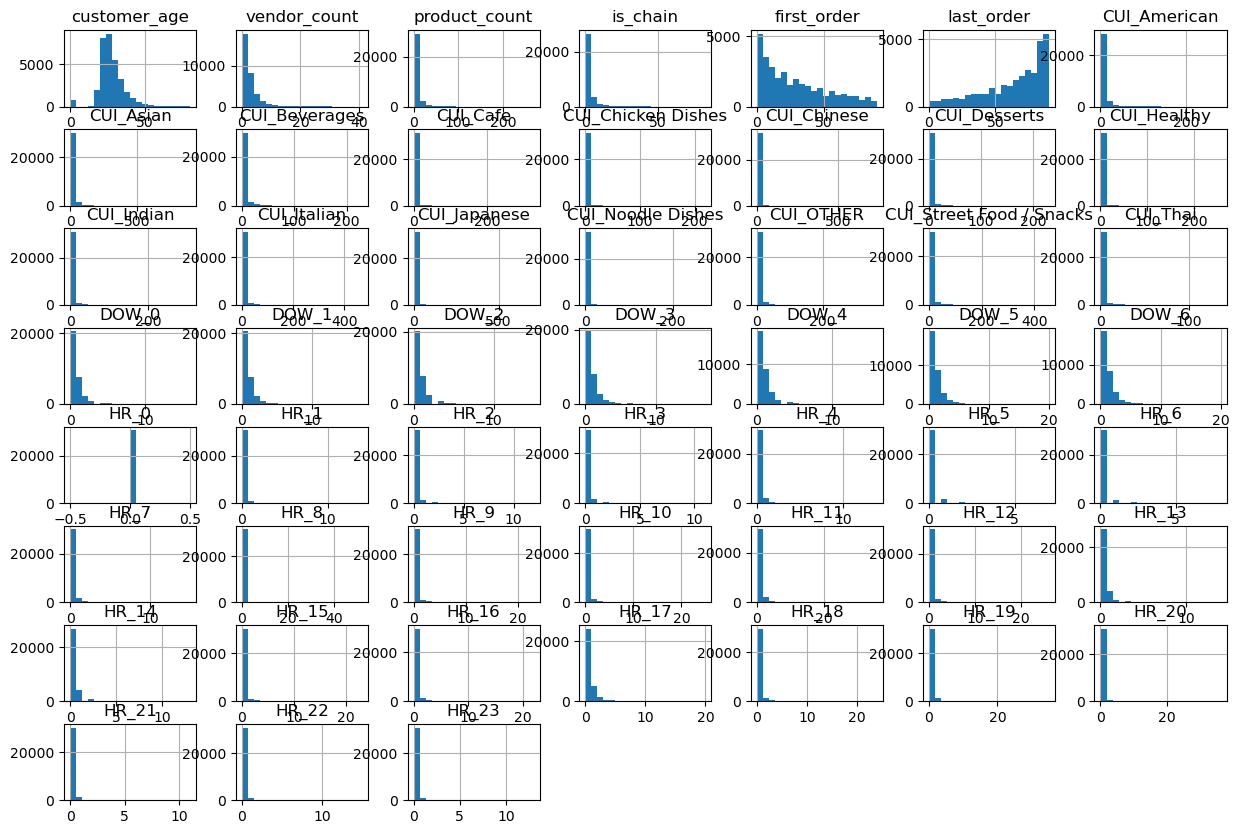

In [16]:
data[number_var].hist(figsize=(15, 10), bins=20)

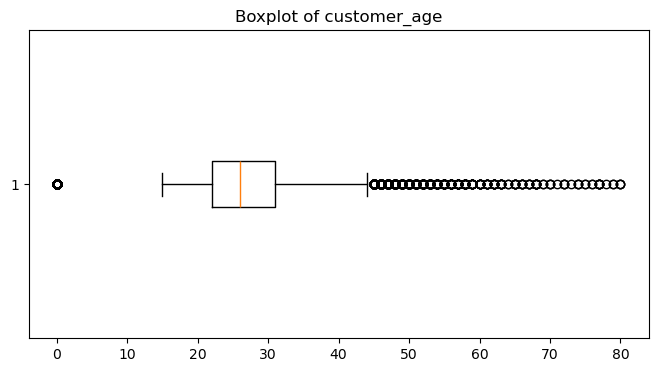

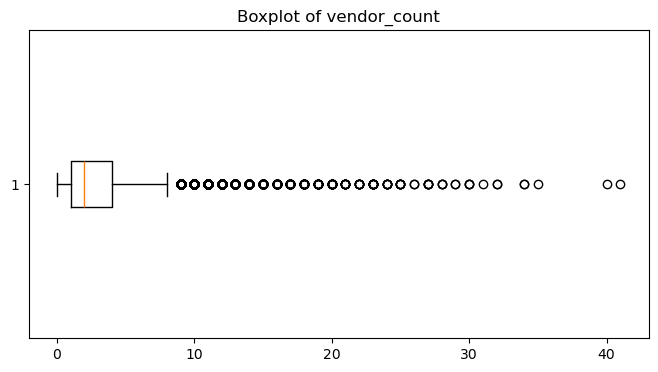

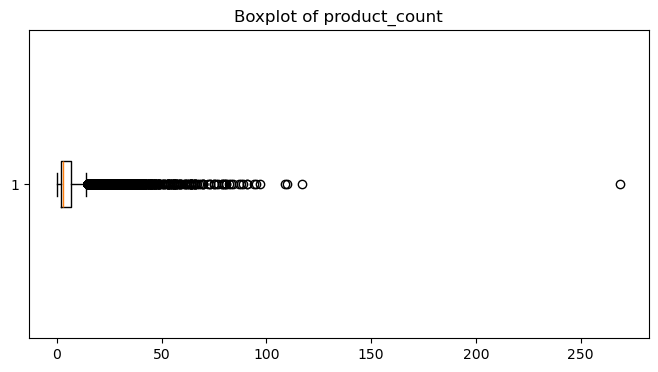

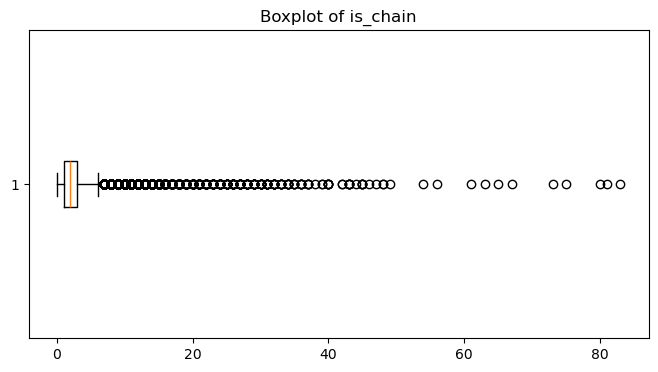

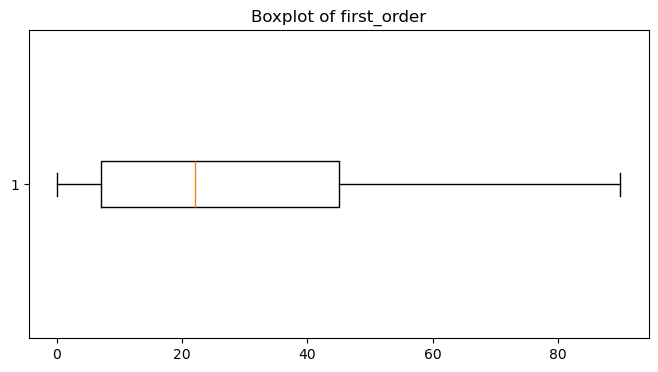

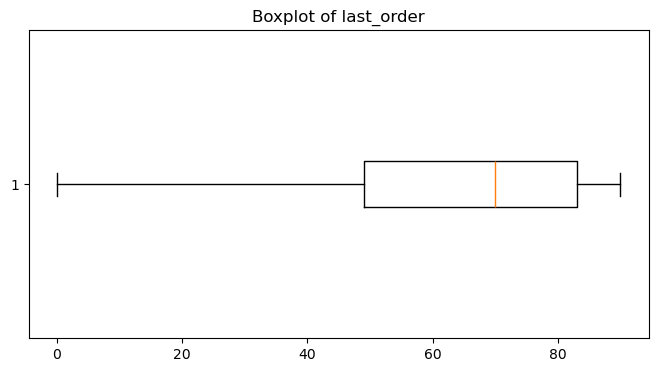

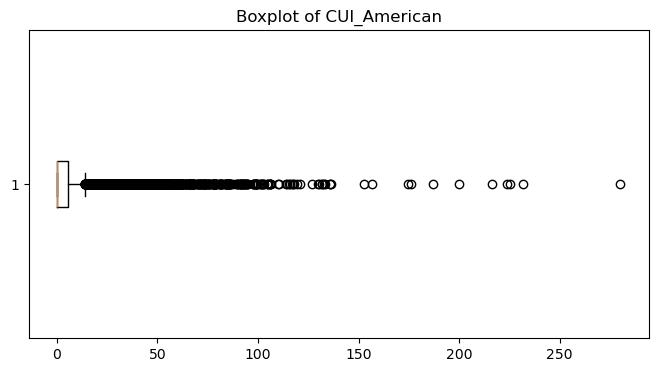

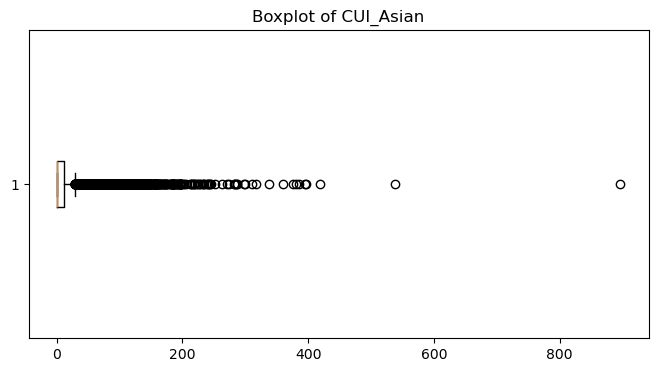

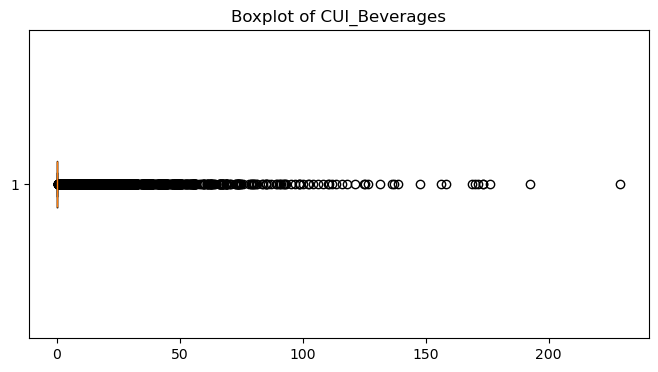

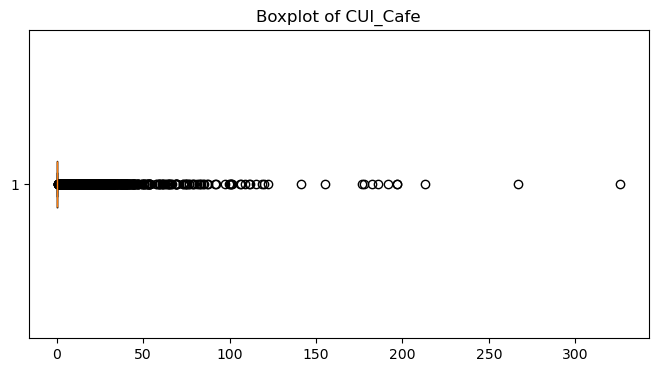

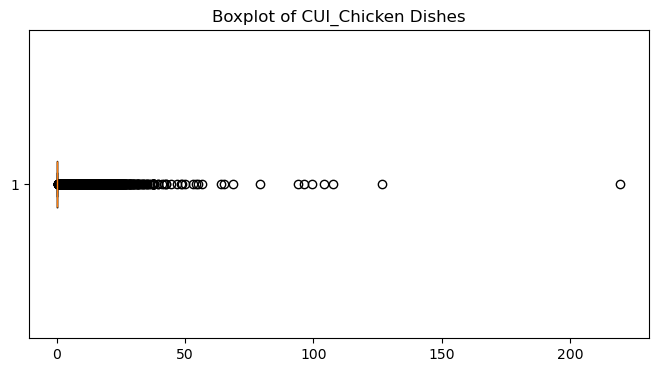

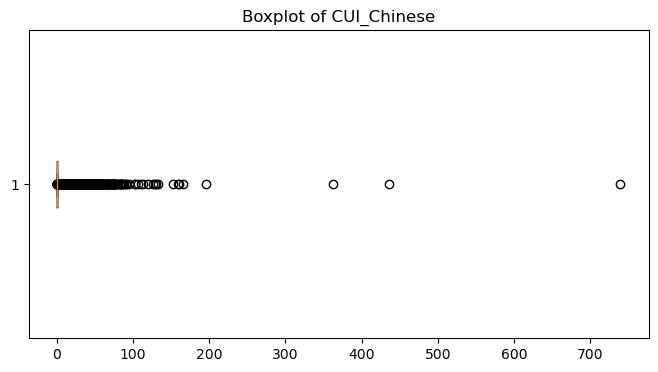

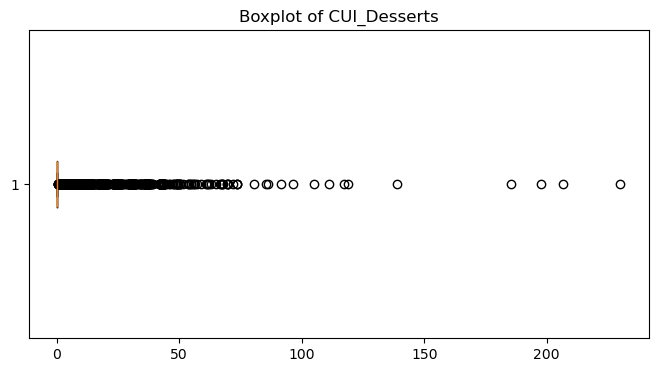

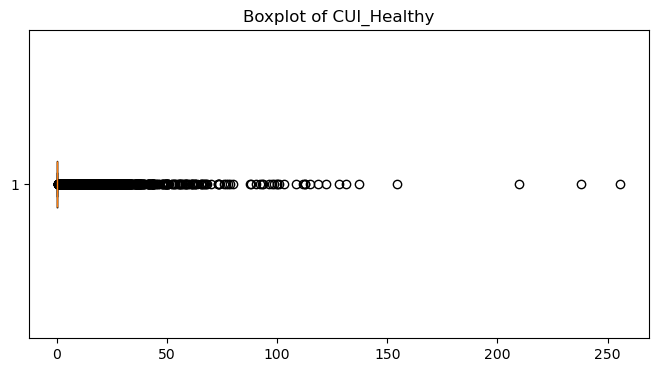

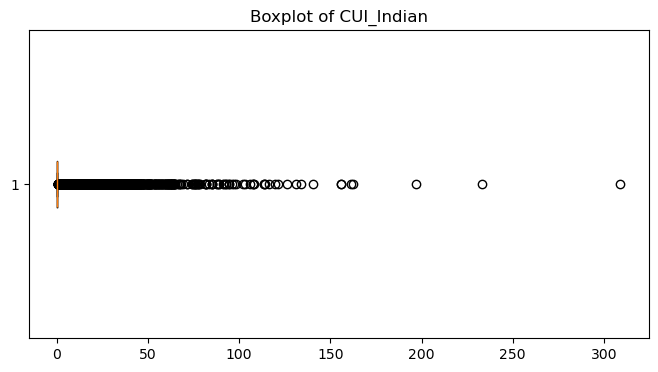

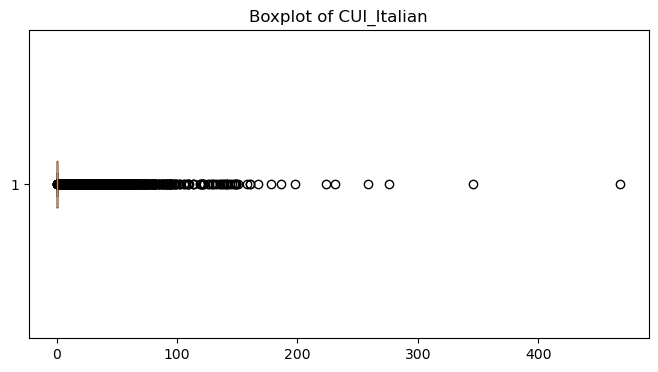

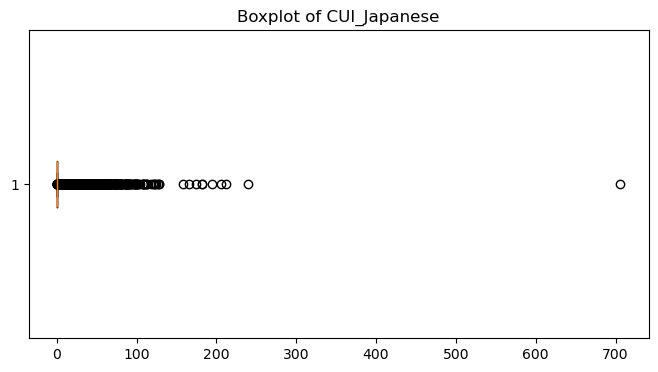

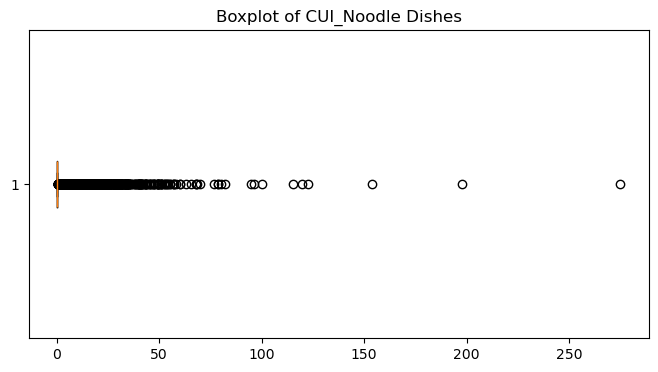

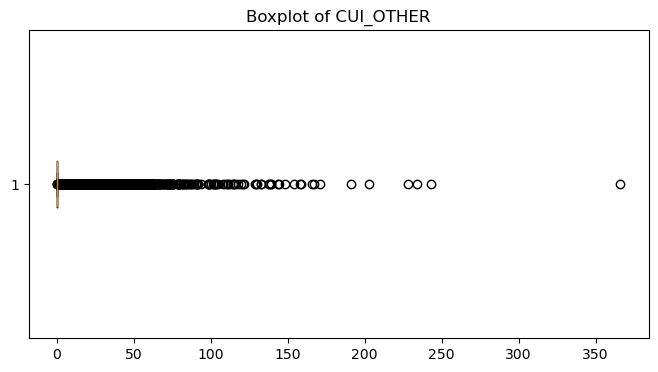

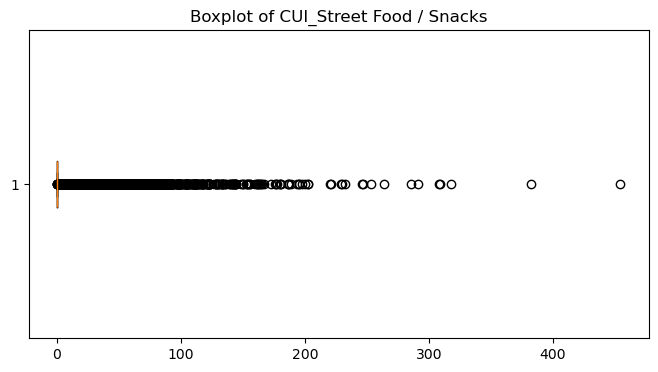

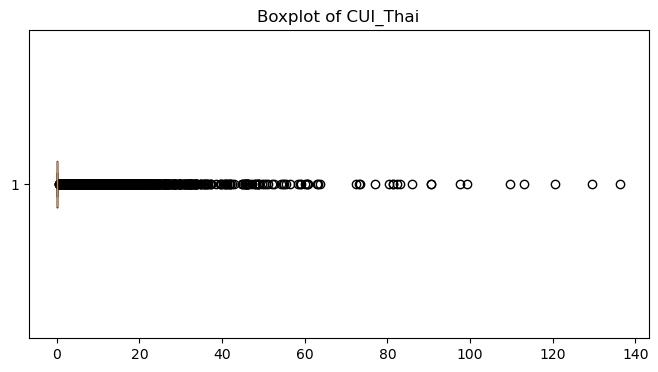

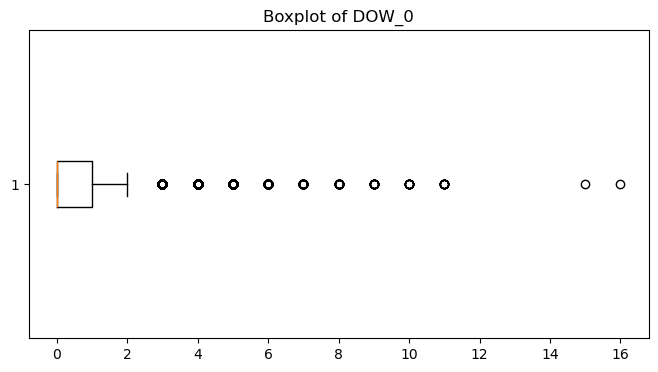

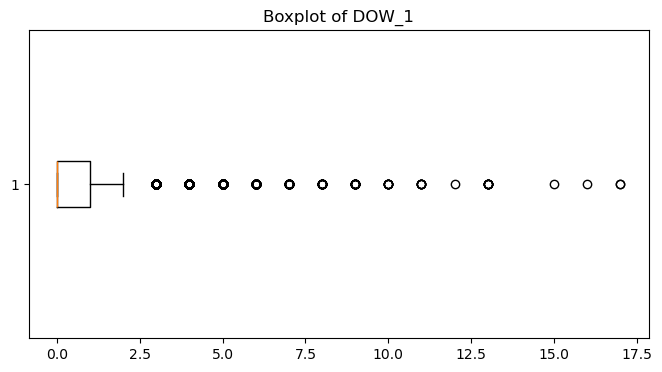

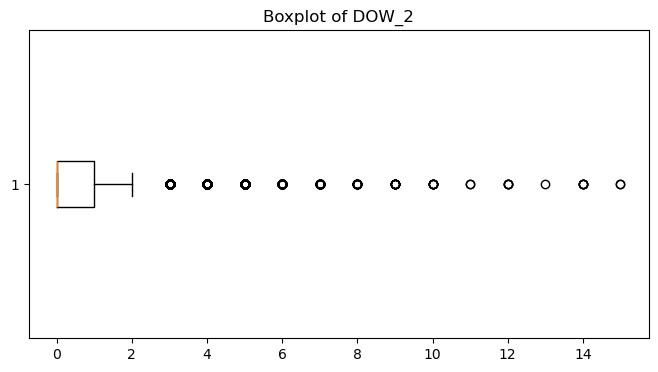

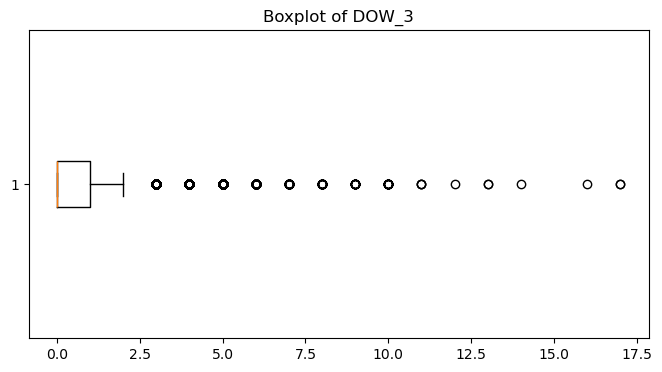

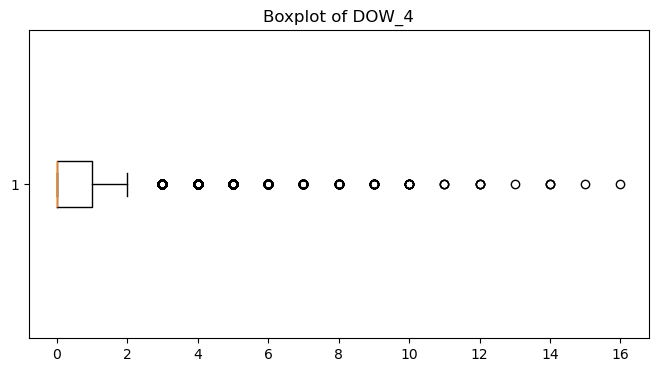

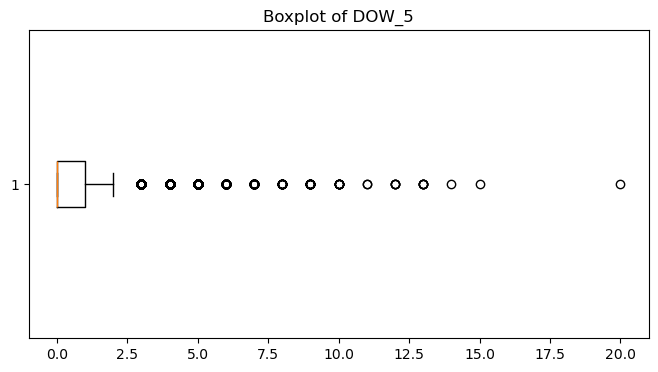

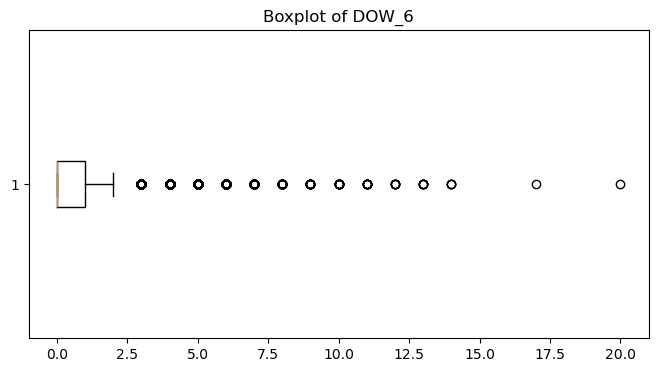

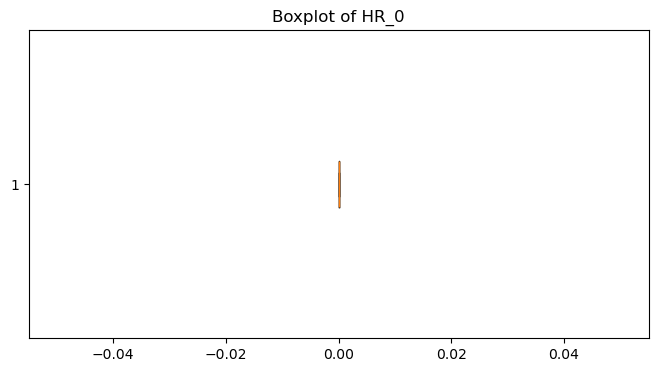

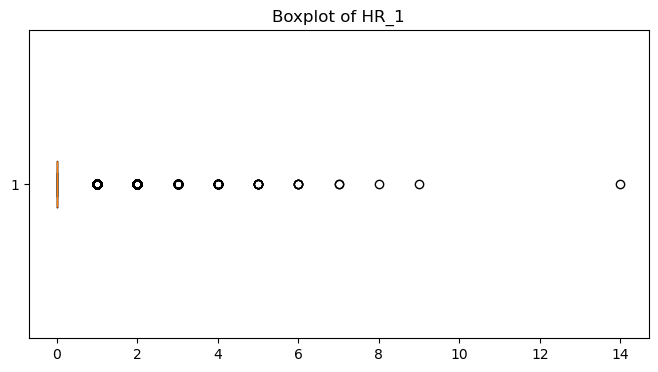

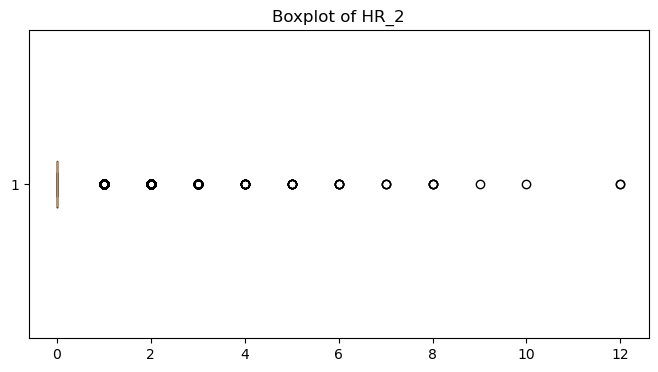

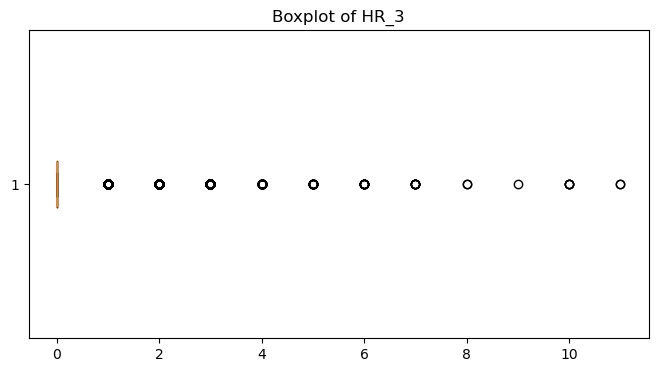

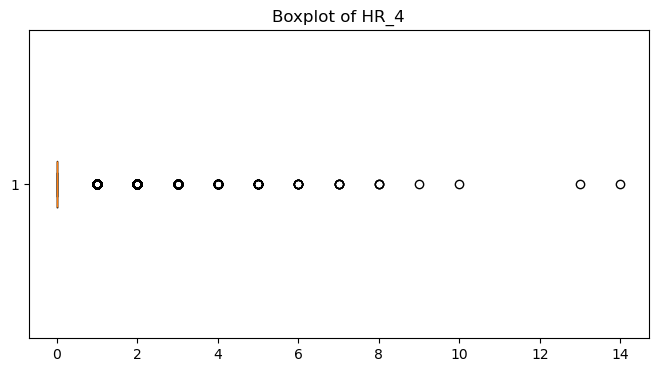

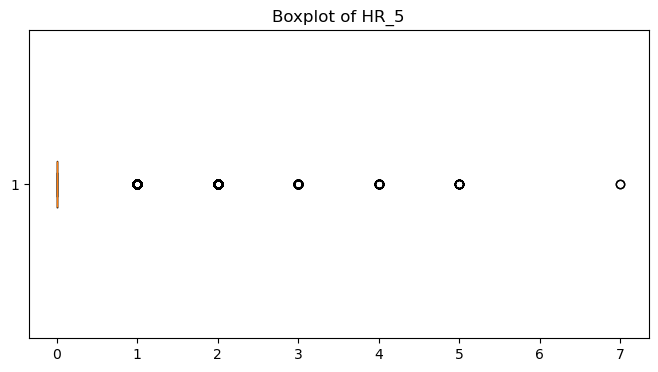

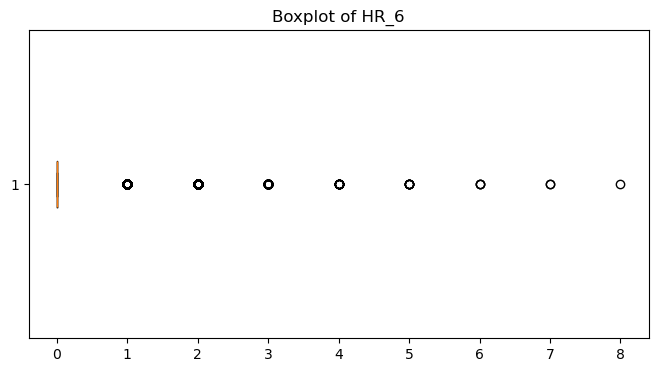

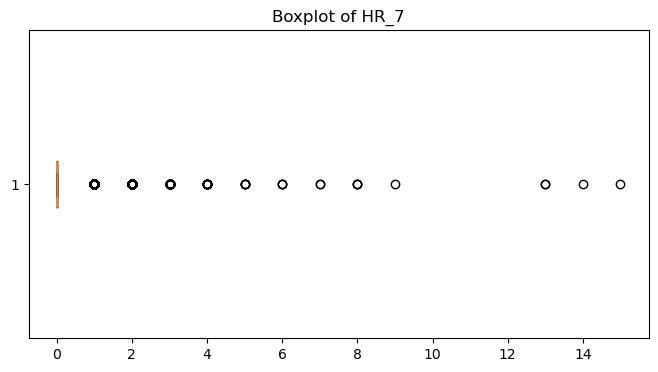

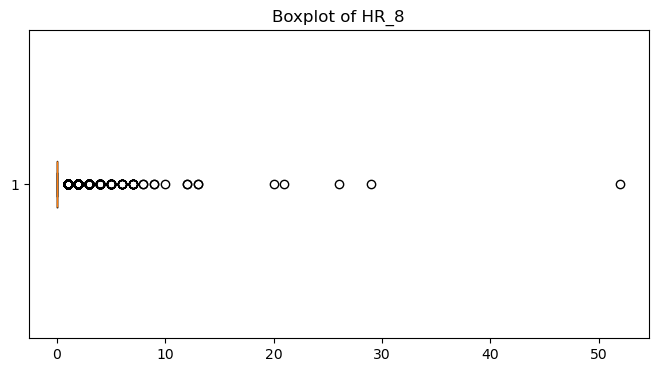

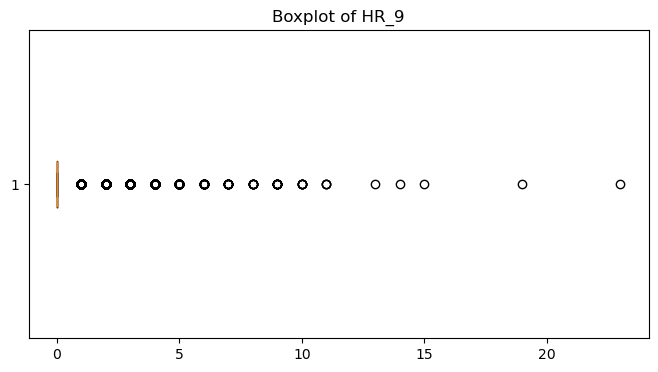

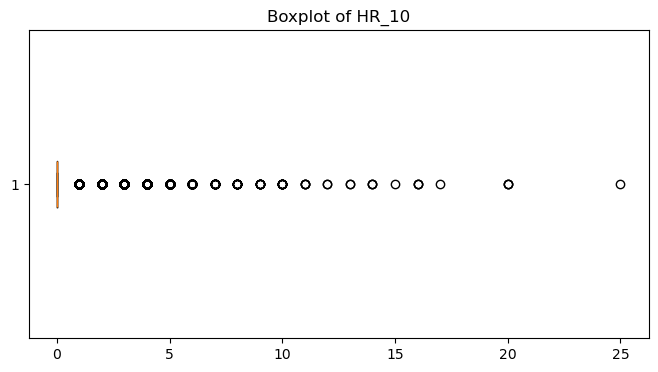

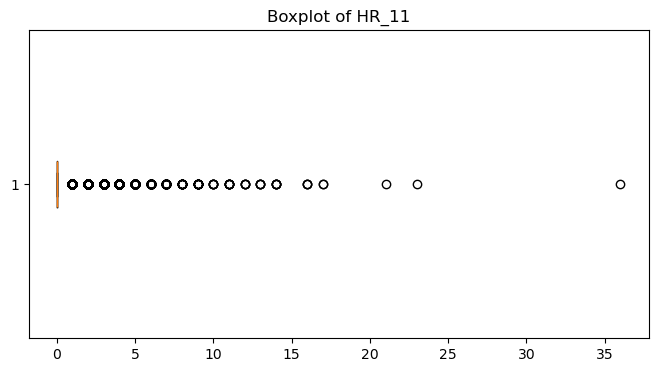

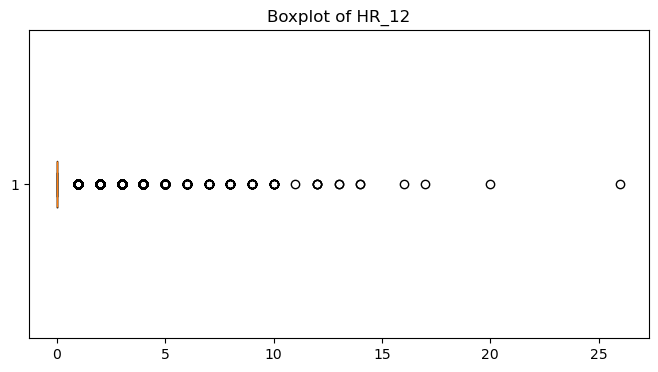

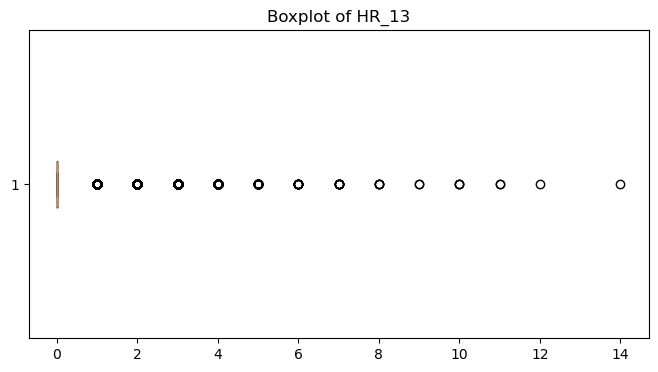

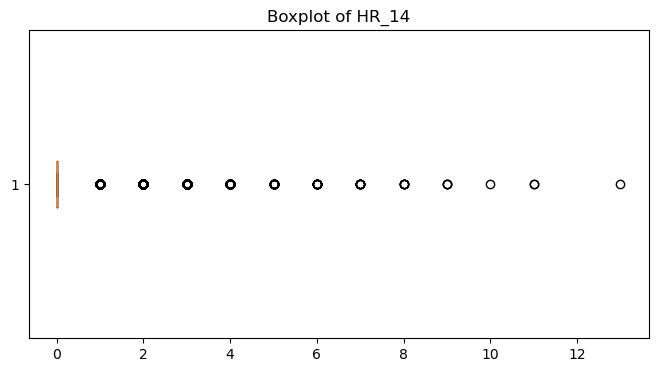

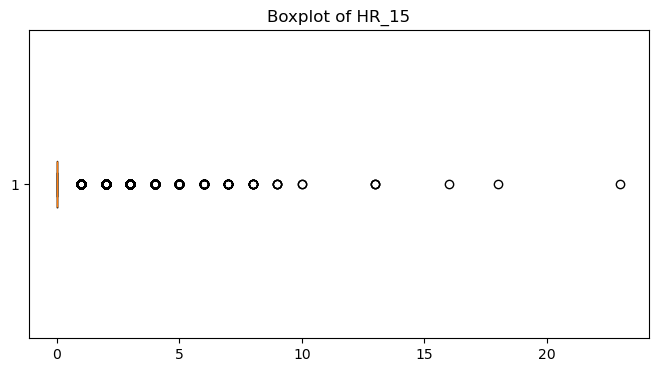

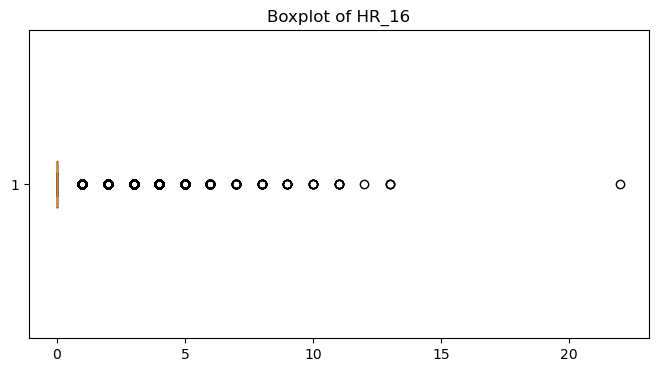

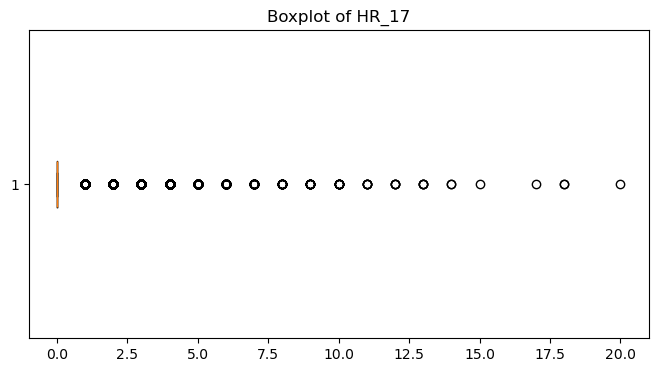

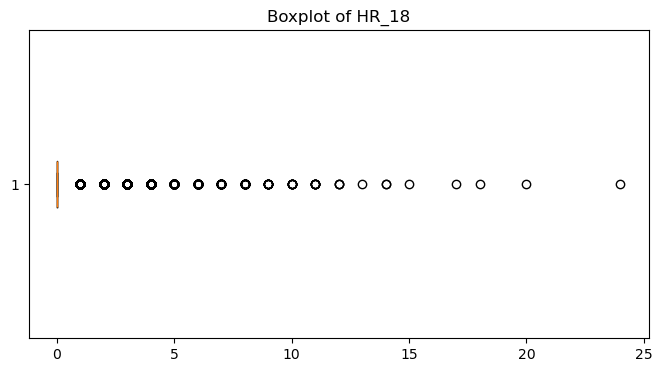

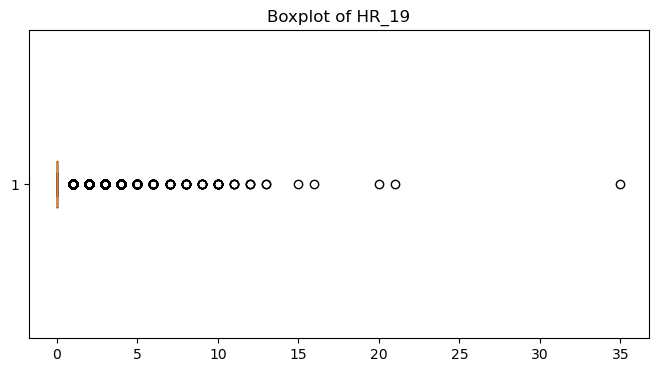

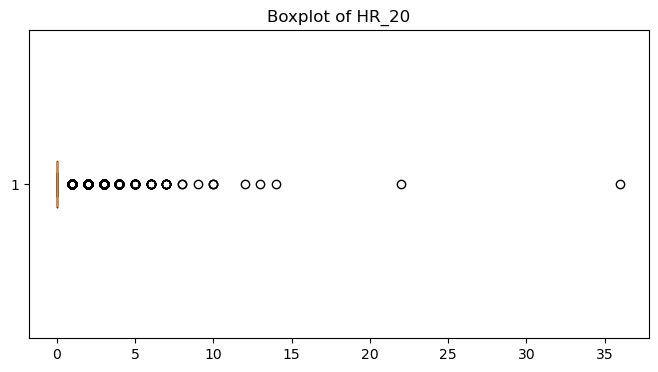

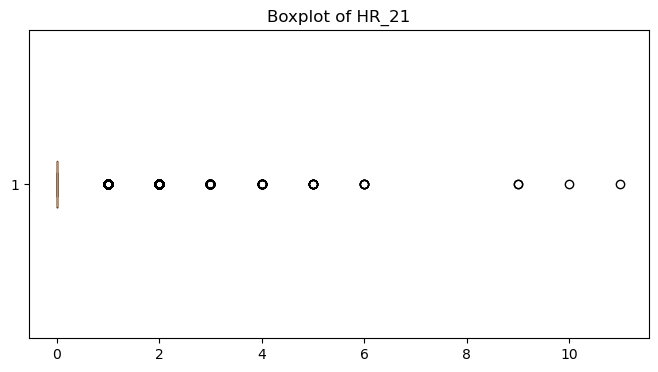

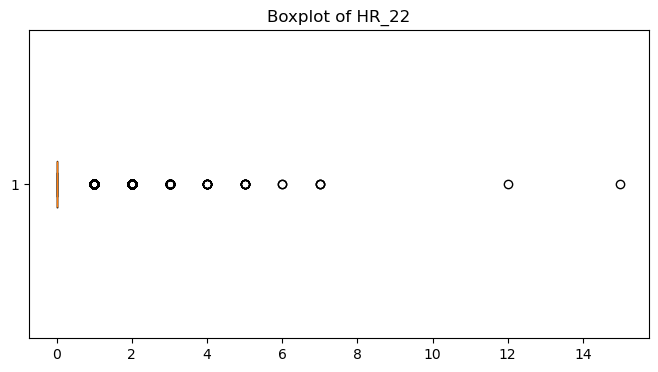

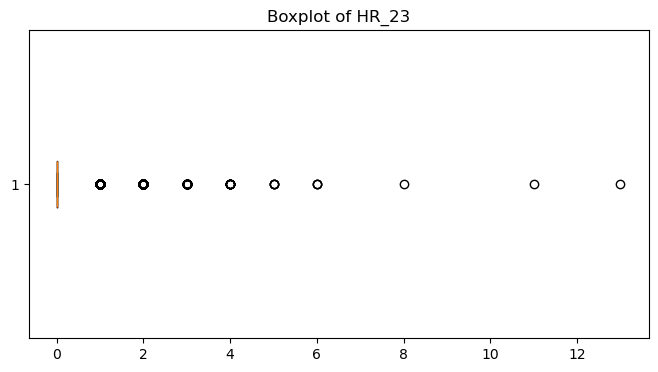

In [17]:
for var in number_var:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[var].dropna(), vert=False)
    plt.title(f"Boxplot of {var}")
    plt.show()

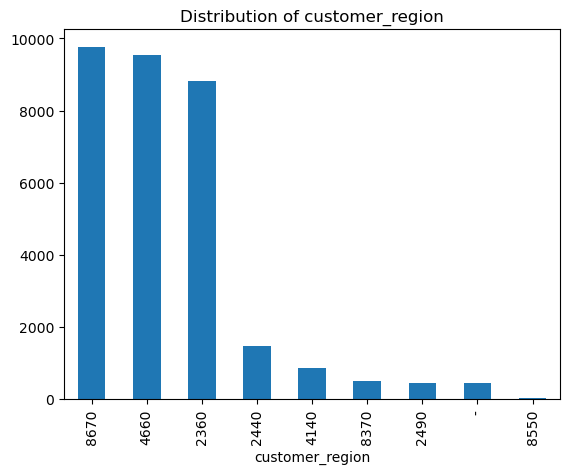

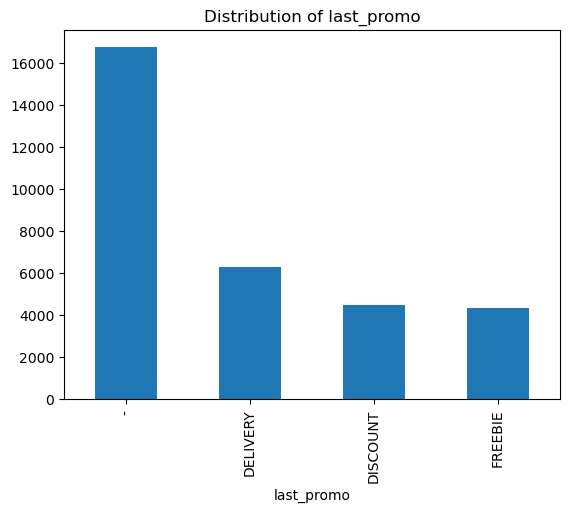

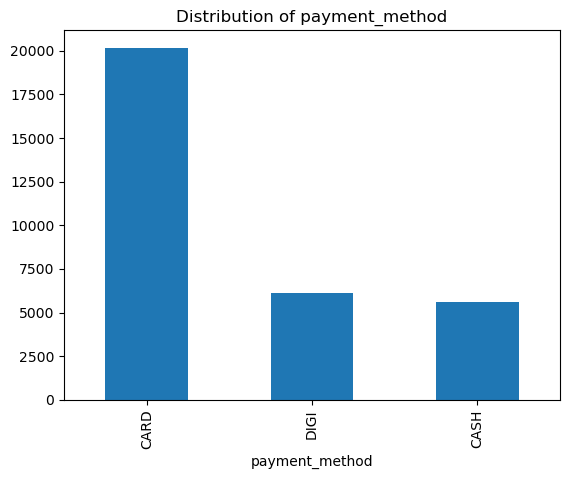

In [18]:
for var in category_var:
    data[var].value_counts().plot(kind='bar', title=f"Distribution of {var}")
    plt.show()

### 2.3 Correlation Analysis

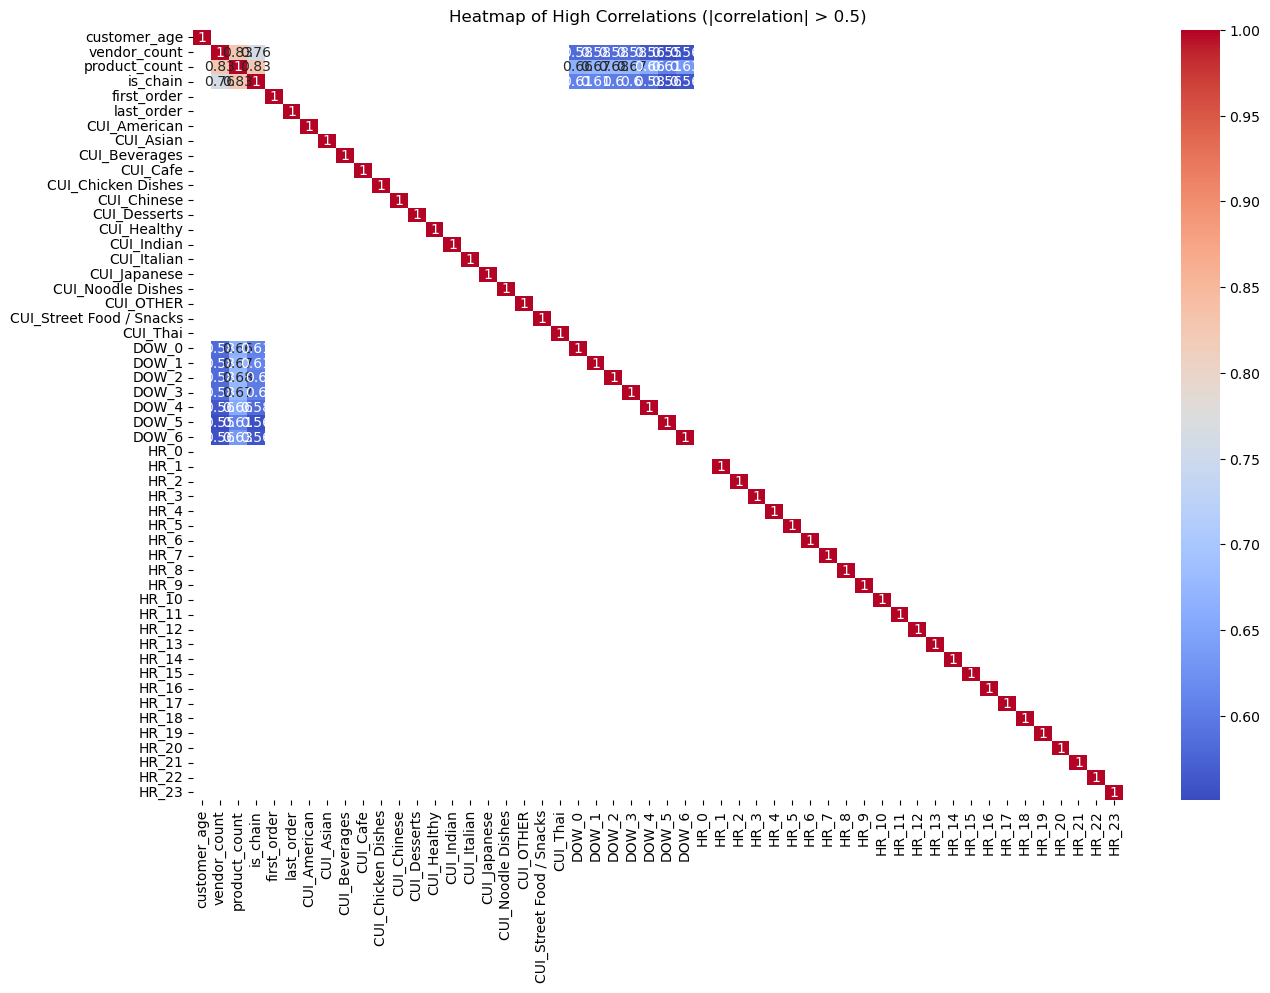

In [19]:
plt.figure(figsize=(15, 10))
corr = data[number_var].corr()
sns.heatmap(corr[(corr > 0.5) | (corr < -0.5)], annot=True, cmap='coolwarm', mask=(corr <= 0.5) & (corr >= -0.5))
plt.title("Heatmap of High Correlations (|correlation| > 0.5)")
plt.show()

### 2.4 Anomaly Detection

In [20]:
z_scores = data[number_var].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Outliers per variable:")
print(outliers)

Outliers per variable:
customer_age                1048
vendor_count                 623
product_count                624
is_chain                     604
first_order                    0
last_order                     0
CUI_American                 636
CUI_Asian                    618
CUI_Beverages                591
CUI_Cafe                     344
CUI_Chicken Dishes           549
CUI_Chinese                  374
CUI_Desserts                 617
CUI_Healthy                  462
CUI_Indian                   527
CUI_Italian                  559
CUI_Japanese                 545
CUI_Noodle Dishes            433
CUI_OTHER                    556
CUI_Street Food / Snacks     642
CUI_Thai                     562
DOW_0                        657
DOW_1                        685
DOW_2                        694
DOW_3                        744
DOW_4                        777
DOW_5                        728
DOW_6                        486
HR_0                           0
HR_1                

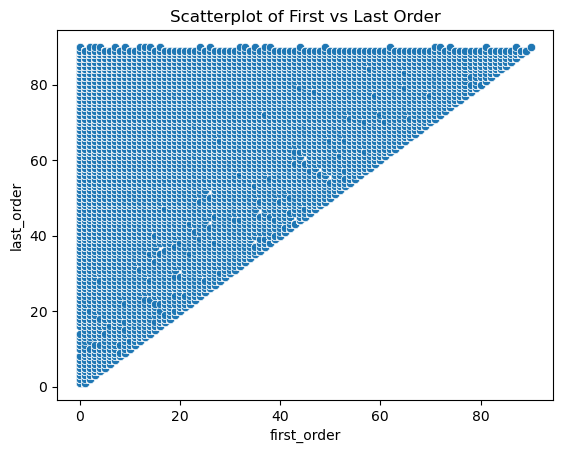

In [21]:
sns.scatterplot(x='first_order', y='last_order', data=data)
plt.title("Scatterplot of First vs Last Order")
plt.show()

### 2.5 Trend Analysis

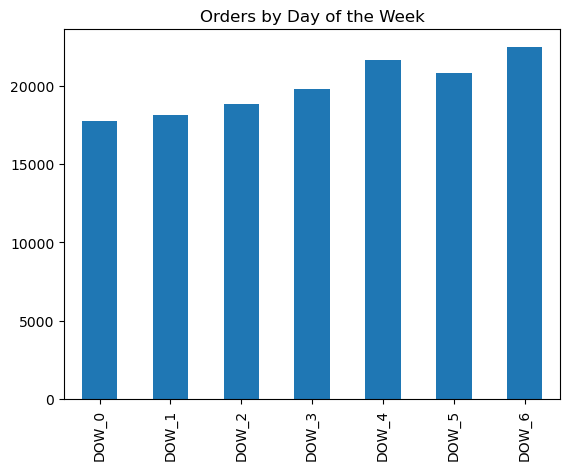

In [22]:
dow_data = data[[f'DOW_{i}' for i in range(7)]].sum()
dow_data.plot(kind='bar', title="Orders by Day of the Week")
plt.show()

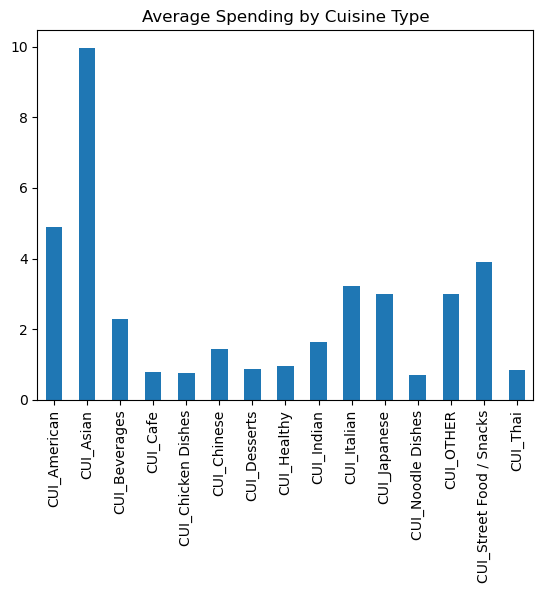

In [23]:
data[[col for col in number_var if 'CUI_' in col]].mean().plot(kind='bar')
plt.title("Average Spending by Cuisine Type")
plt.show()

# Create New Features

In [24]:
data['total_spending'] = data[[col for col in number_var if col.startswith('CUI_')]].sum(axis=1)

In [25]:
data['avg_spending_per_cuisine'] = data['total_spending'] / data['vendor_count'].replace(0, 1)

In [26]:
data['order_activity_duration'] = data['last_order'] - data['first_order']

In [27]:
data['order_frequency'] = data['product_count'] / (data['order_activity_duration'].replace(0, 1))

In [28]:
data['high_spender'] = data['total_spending'] > data['total_spending'].median()

In [29]:
data['loyal_customer'] = data['vendor_count'] < data['product_count']

In [30]:
data['cuisine_diversity'] = (data[[col for col in number_var if col.startswith('CUI_')]] > 0).sum(axis=1)

In [31]:
data['favorite_cuisine'] = data[[col for col in number_var if col.startswith('CUI_')]].idxmax(axis=1)

In [32]:
data['peak_order_hour'] = data[[f'HR_{i}' for i in range(24)]].idxmax(axis=1).str.extract(r'(\d+)', expand=False).astype(int)

In [33]:
data['peak_order_day'] = data[[f'DOW_{i}' for i in range(7)]].idxmax(axis=1).str.extract(r'(\d+)', expand=False).astype(int)

In [34]:
for col in [col for col in number_var if col.startswith('CUI_')]:
    data[f'{col}_ratio'] = data[col] / data['total_spending'].replace(0, 1)

In [35]:
data['frequent_order_flag'] = data['product_count'] > data['product_count'].mean()

In [36]:
data['inactive_customer'] = data['product_count'] == 0

In [37]:
data['highest_spending_hour'] = data[[f'HR_{i}' for i in range(24)]].idxmax(axis=1).str.extract(r'(\d+)', expand=False).astype(int)

In [38]:
data['spending_per_order'] = data['total_spending'] / data['product_count'].replace(0, 1)

In [39]:
data['spending_std'] = data[[col for col in number_var if col.startswith('CUI_')]].std(axis=1)

In [40]:
data['max_cuisine_spending_ratio'] = data[[col for col in number_var if col.startswith('CUI_')]].max(axis=1) / data['total_spending'].replace(0, 1)

In [41]:
data['inactive_days'] = 90 - data['last_order']  # Assuming 90 is the maximum order duration

In [42]:
data['regular_customer'] = data['order_frequency'] > data['order_frequency'].mean()

In [43]:
data['top_cuisine_ratio'] = data[[col for col in number_var if col.startswith('CUI_')]].max(axis=1) / data['total_spending'].replace(0, 1)

In [44]:
data['cuisine_loyalty'] = data['cuisine_diversity'] == 1

In [45]:
data['weekend_spending'] = data['DOW_5'] + data['DOW_6']
data['weekday_spending'] = data[[f'DOW_{i}' for i in range(5)]].sum(axis=1)

data['weekend_spending_ratio'] = data['weekend_spending'] / (data['total_spending'].replace(0, 1))

In [46]:
data['products_per_vendor'] = data['product_count'] / data['vendor_count'].replace(0, 1)

In [47]:
data['vendor_loyalty'] = data['vendor_count'] == 1

In [48]:
region_avg_spending = data.groupby('customer_region')['total_spending'].mean()
data['region_avg_spending'] = data['customer_region'].map(region_avg_spending)

C:\Users\gonca\AppData\Local\Temp\ipykernel_6772\465924173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_avg_spending = data.groupby('customer_region')['total_spending'].mean()


In [49]:
data['age_spending_interaction'] = data['customer_age'] * data['total_spending']

In [ ]:
data.to_csv('data_new_features.csv', index=False)

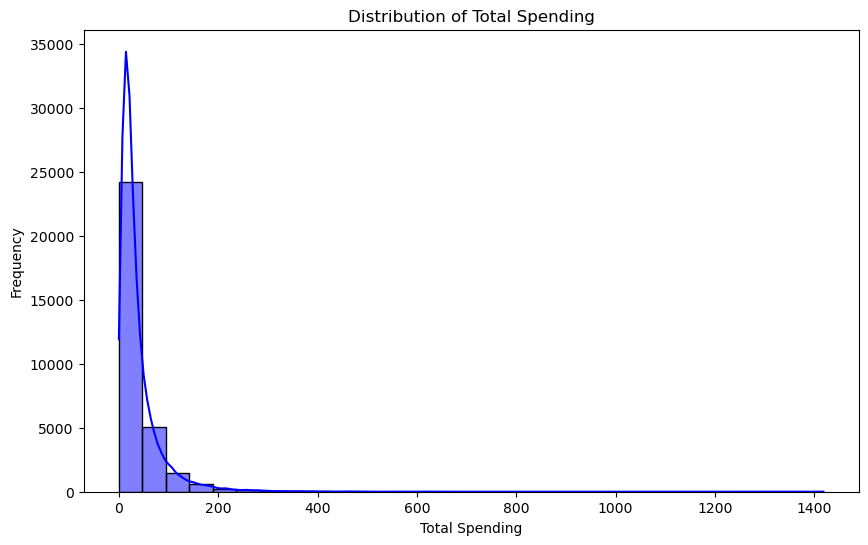

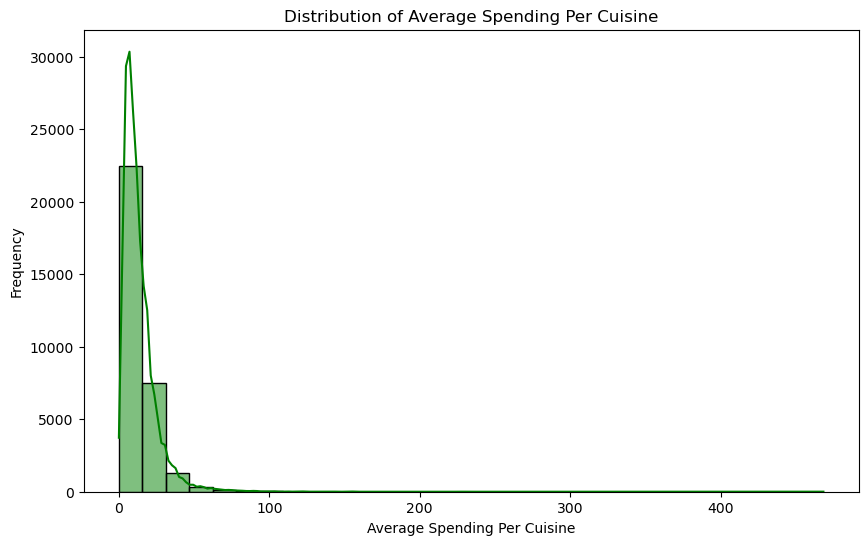

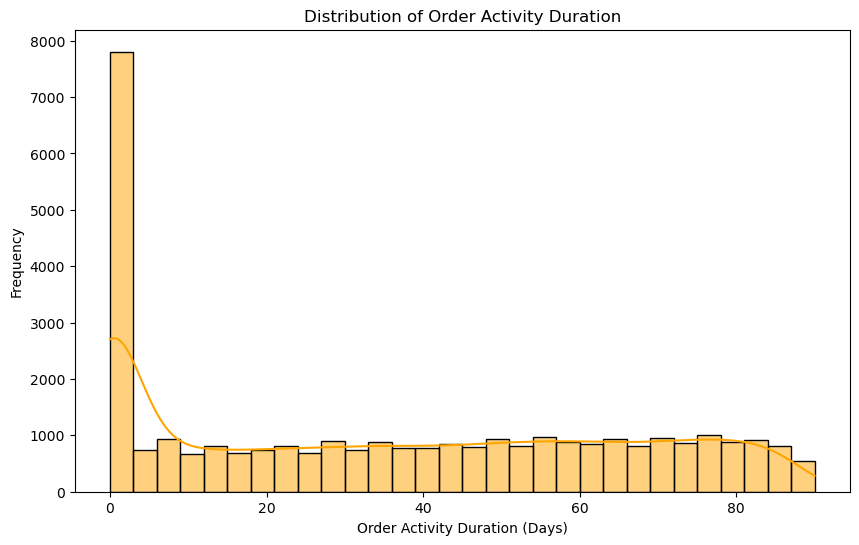

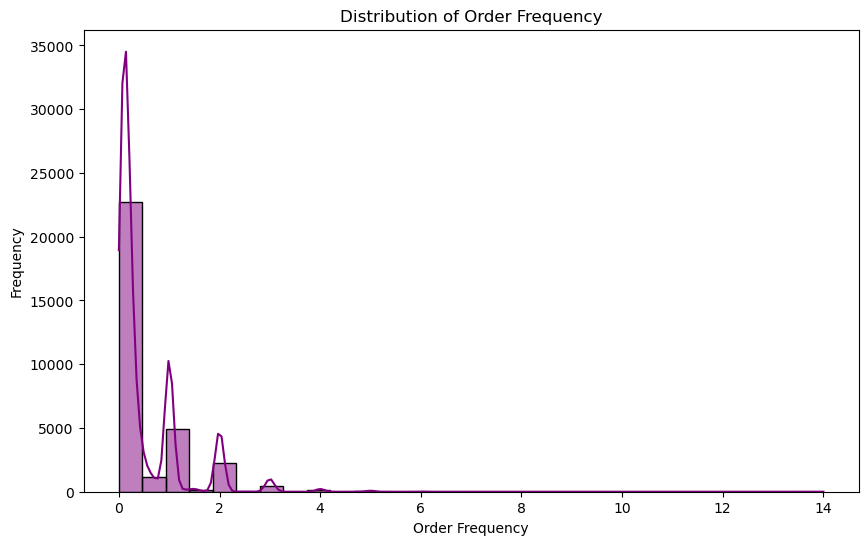

C:\Users\gonca\AppData\Local\Temp\ipykernel_6772\3508630027.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='high_spender', data=data, palette='pastel')


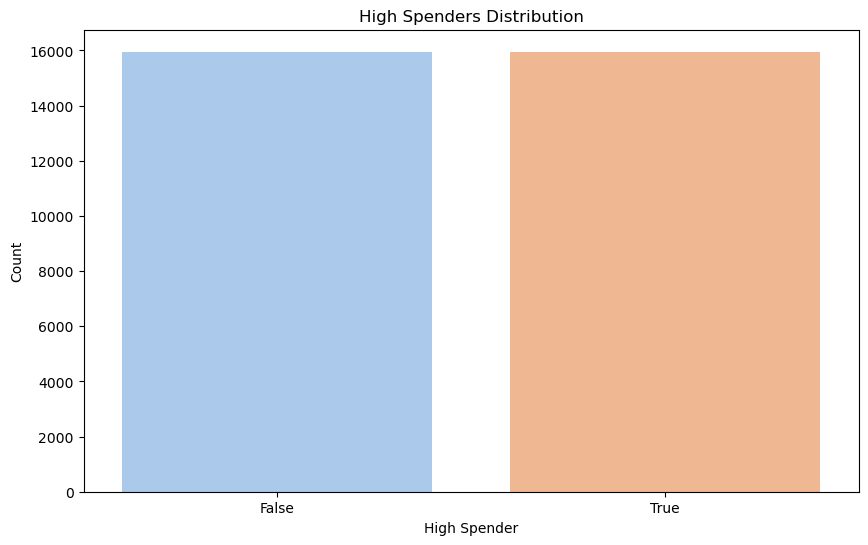

C:\Users\gonca\AppData\Local\Temp\ipykernel_6772\3508630027.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loyal_customer', data=data, palette='coolwarm')


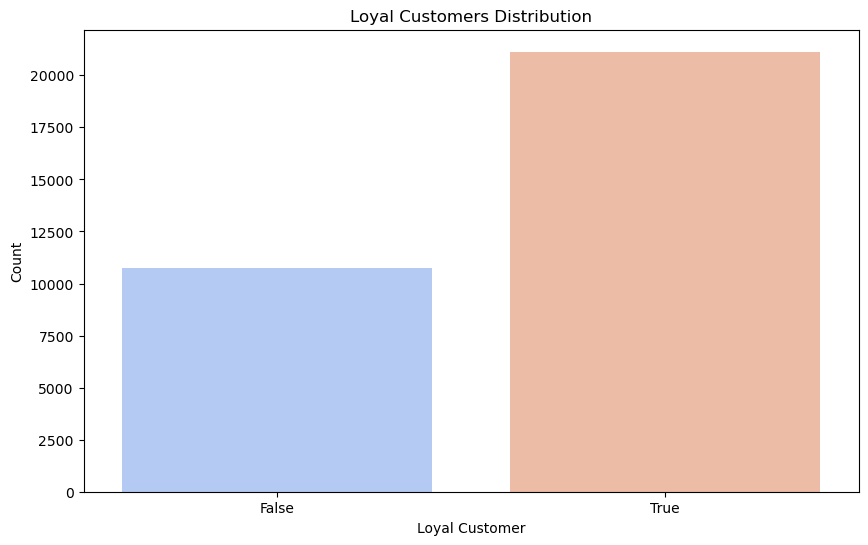

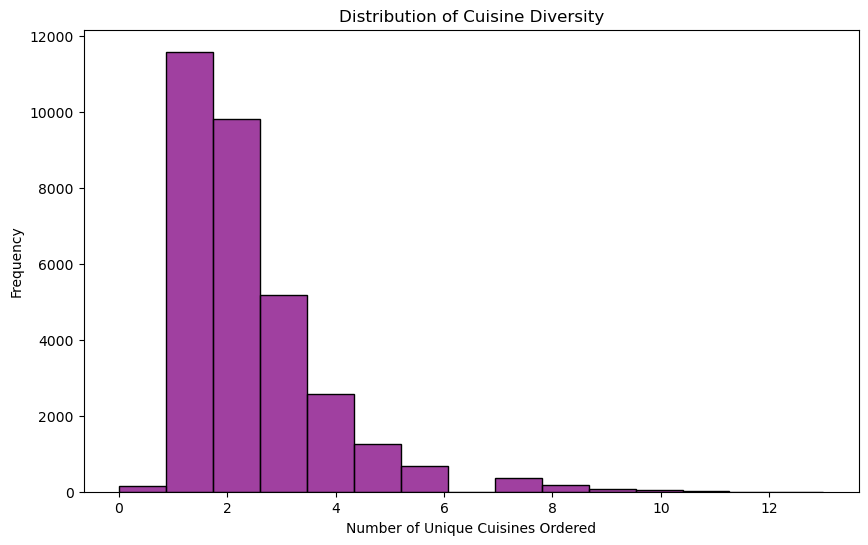

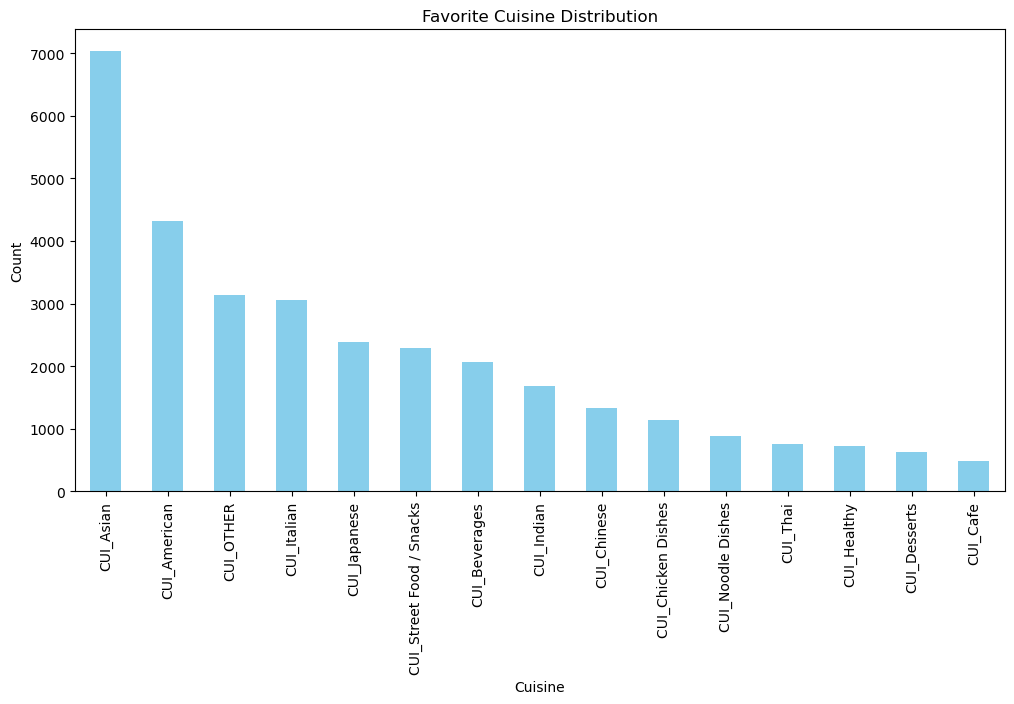

C:\Users\gonca\AppData\Local\Temp\ipykernel_6772\3508630027.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='peak_order_hour', data=data, palette='viridis')


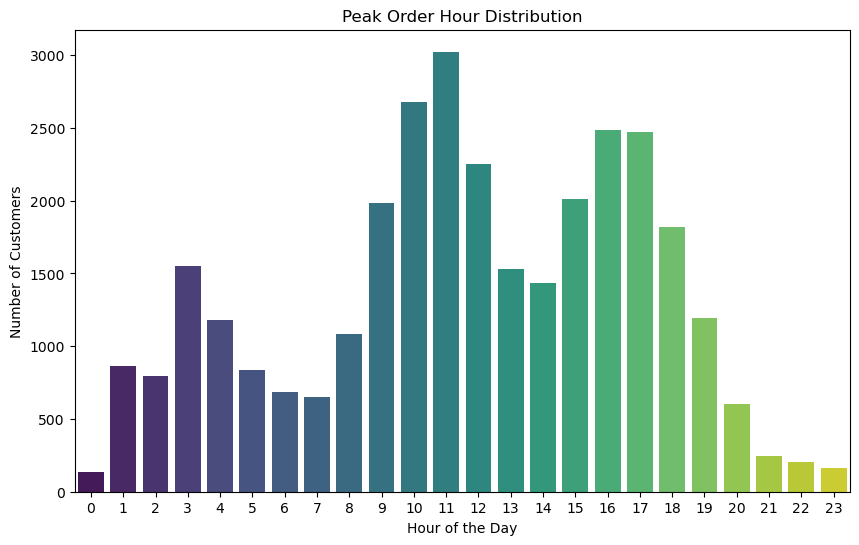

C:\Users\gonca\AppData\Local\Temp\ipykernel_6772\3508630027.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='peak_order_day', data=data, palette='coolwarm')


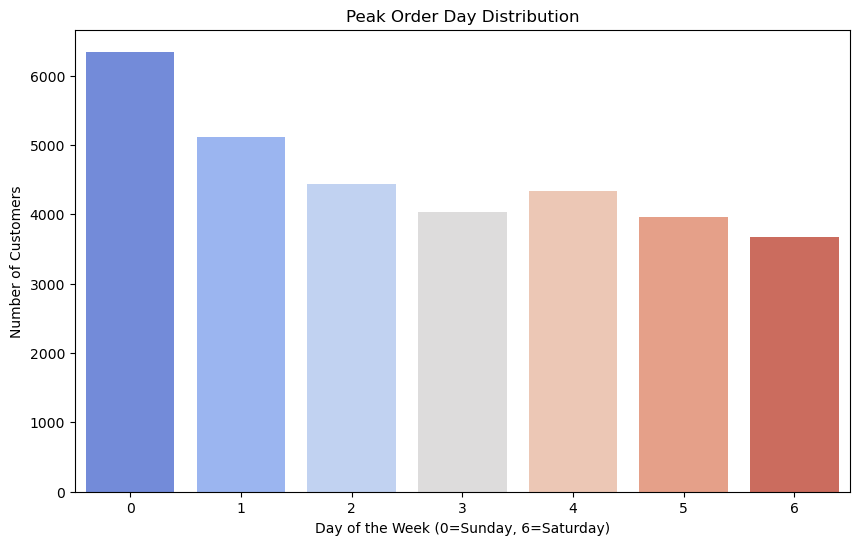

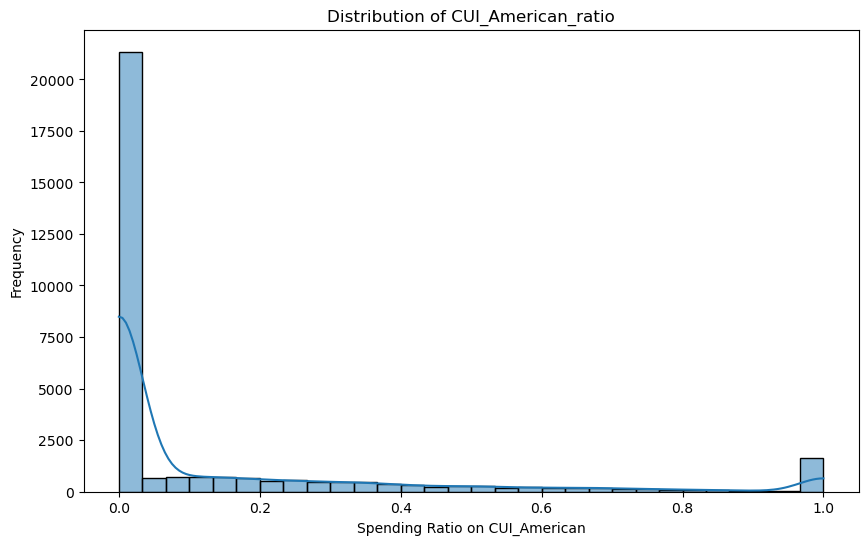

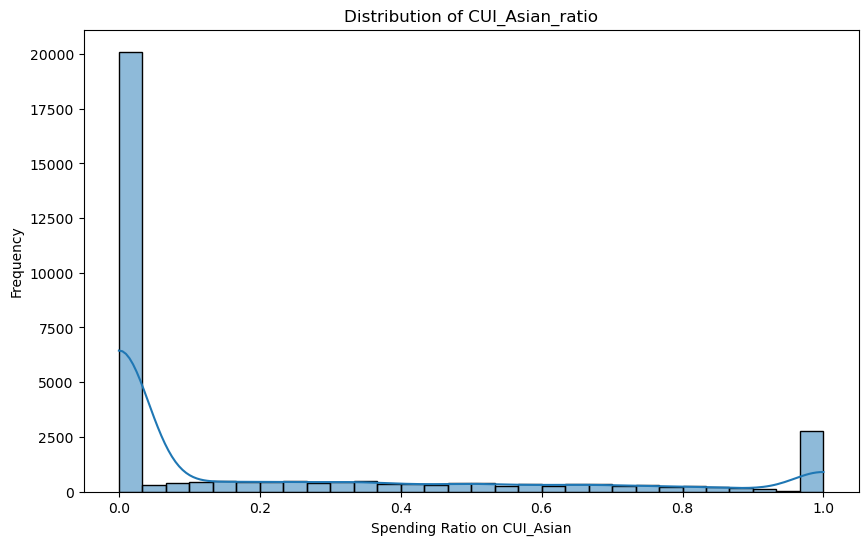

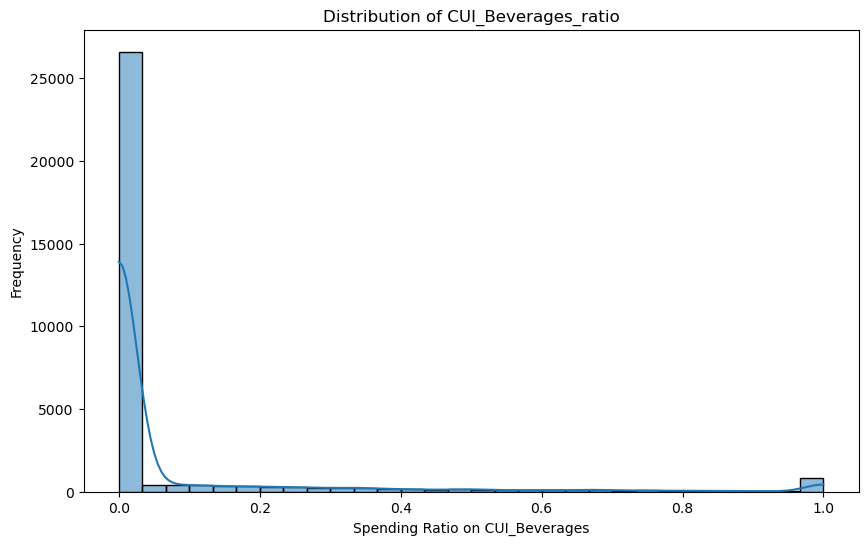

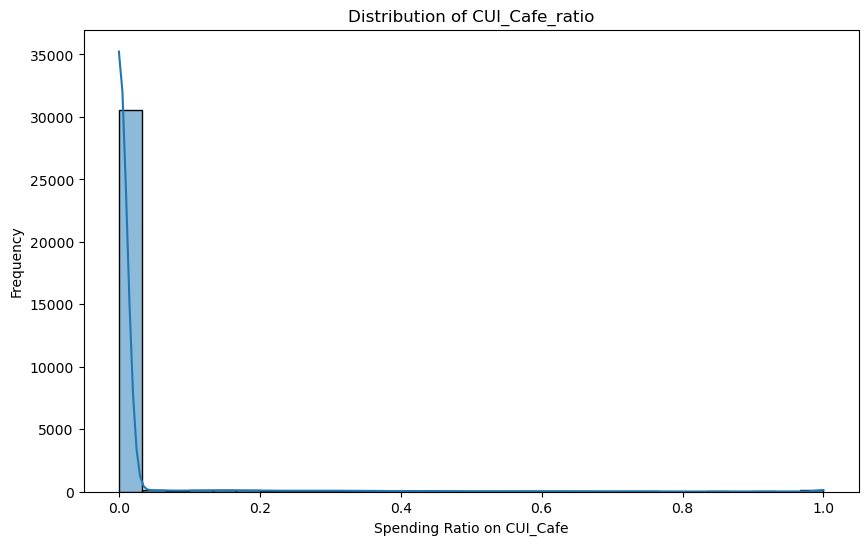

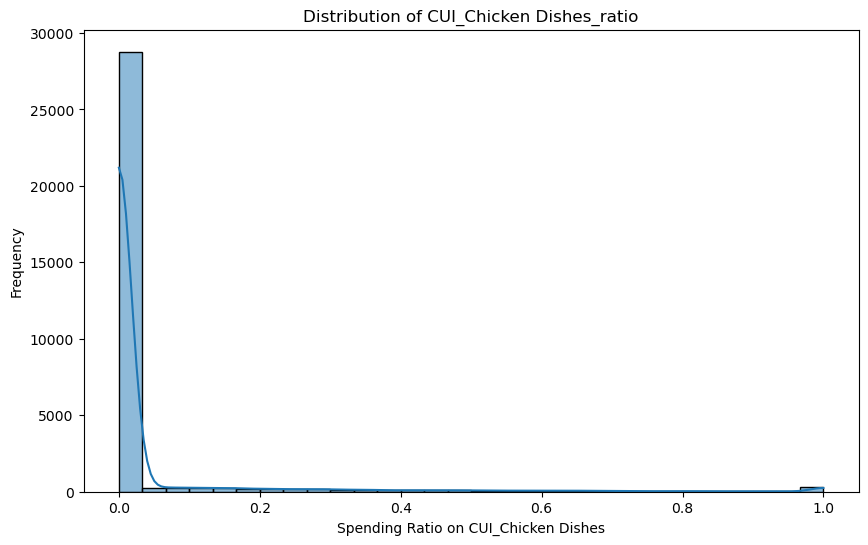

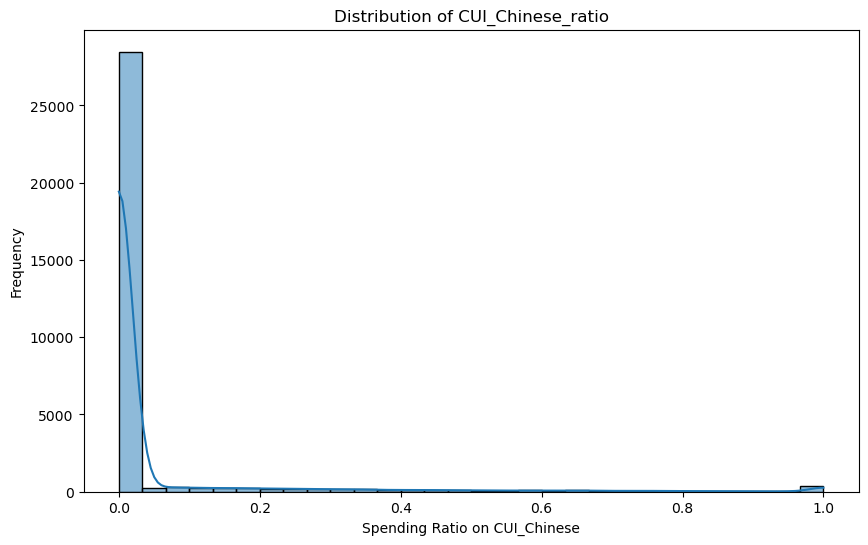

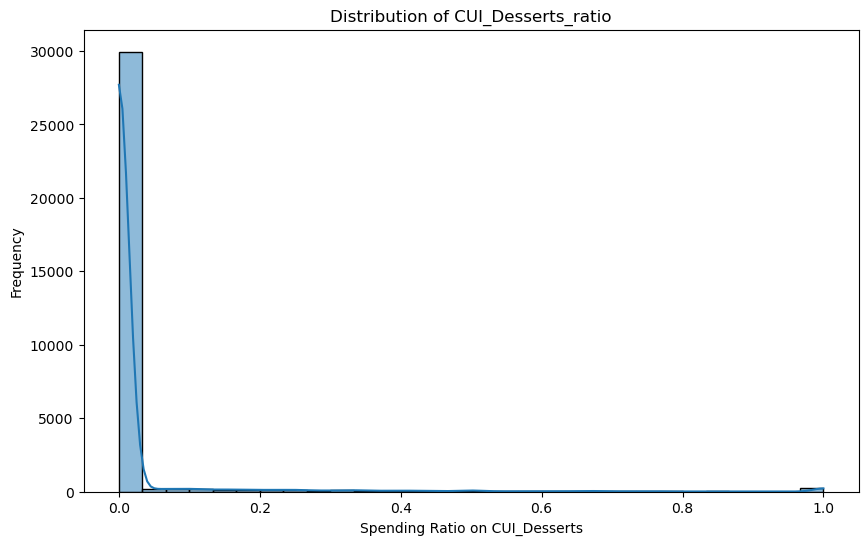

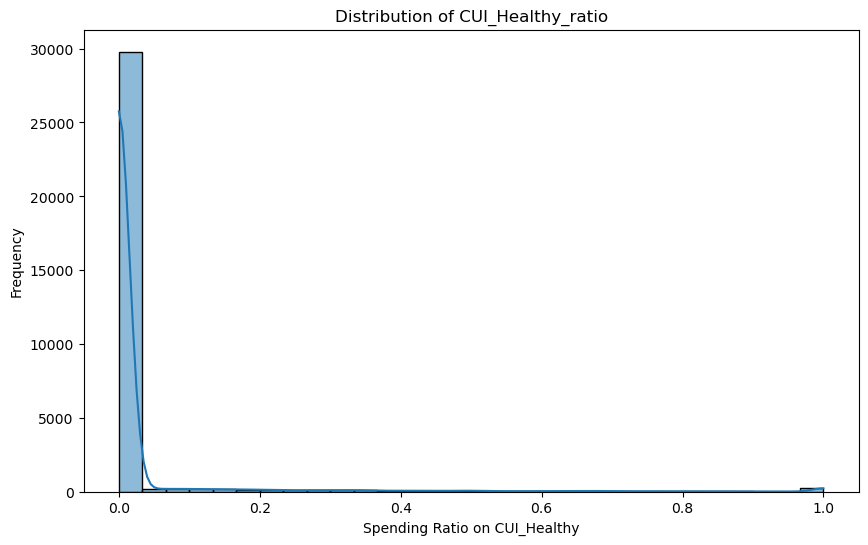

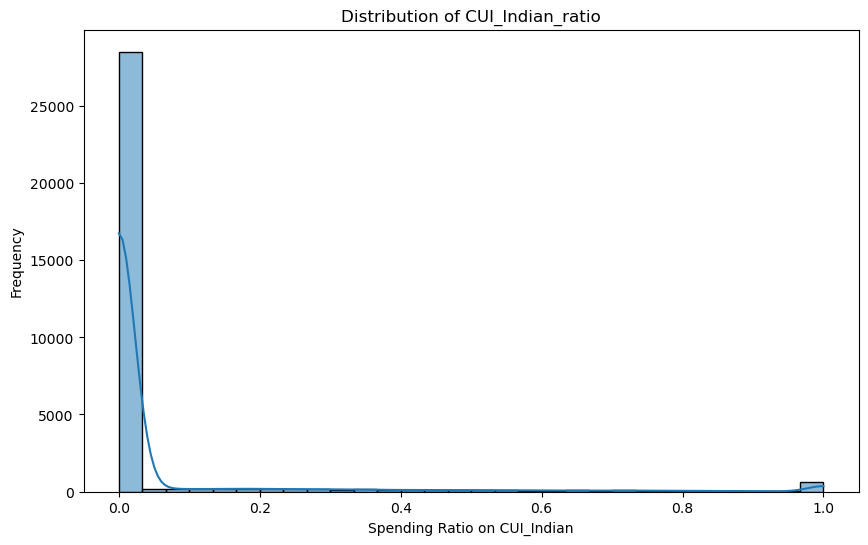

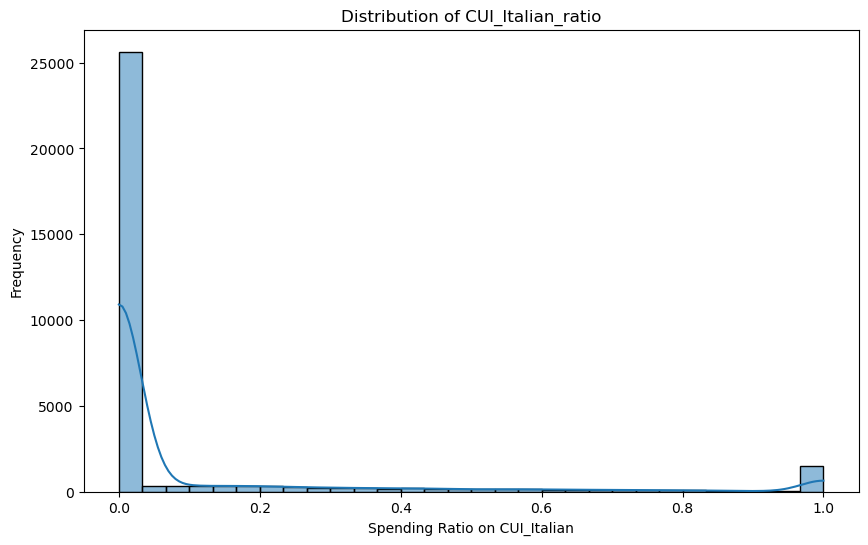

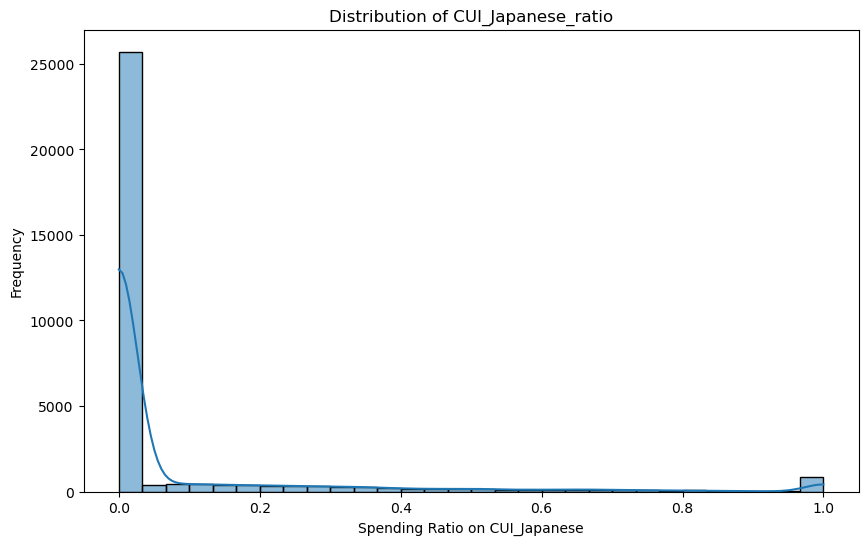

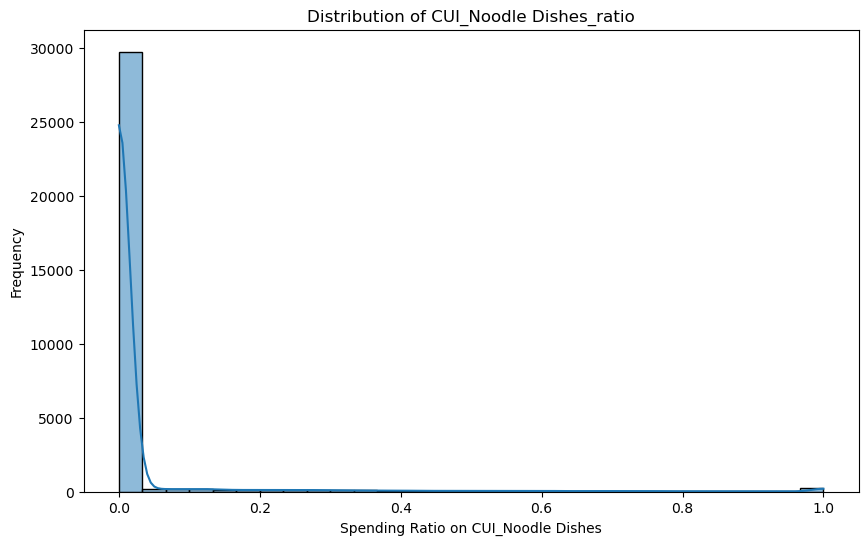

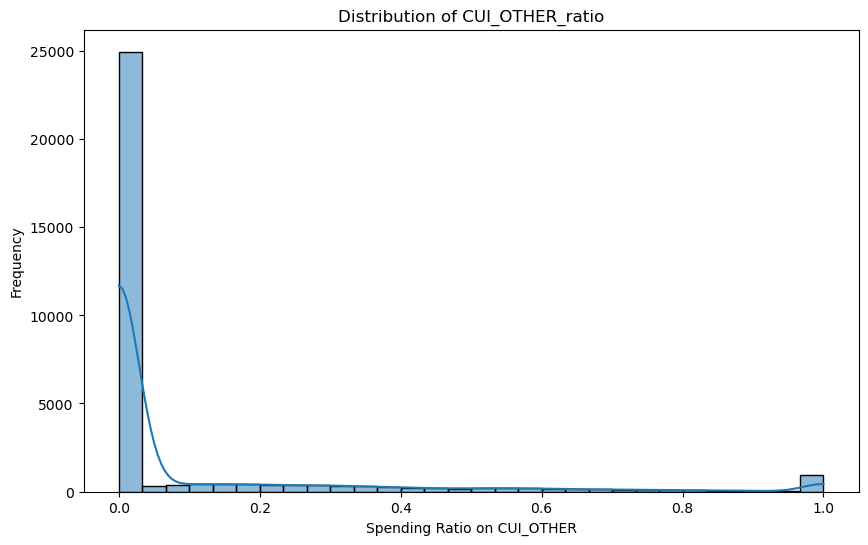

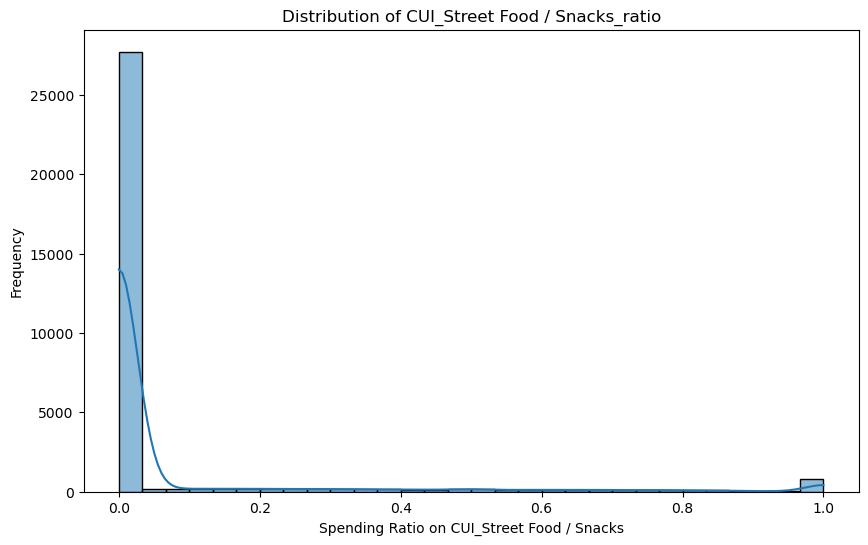

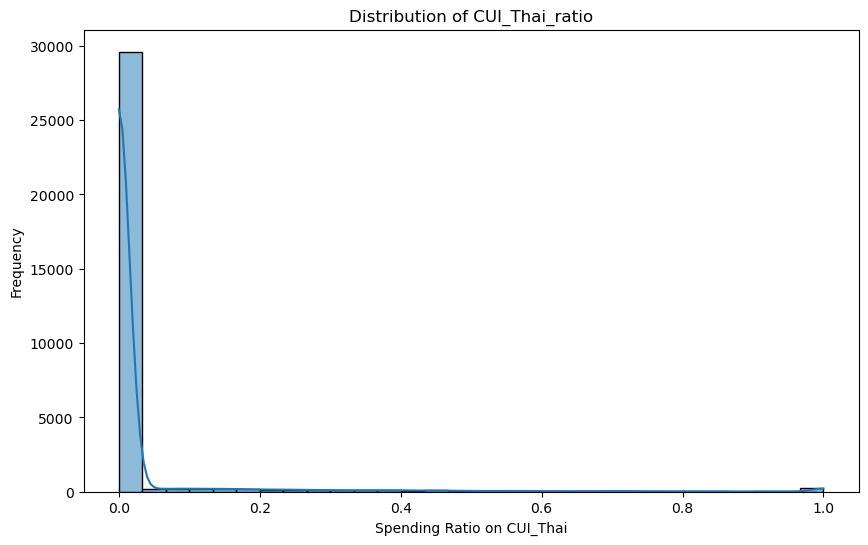

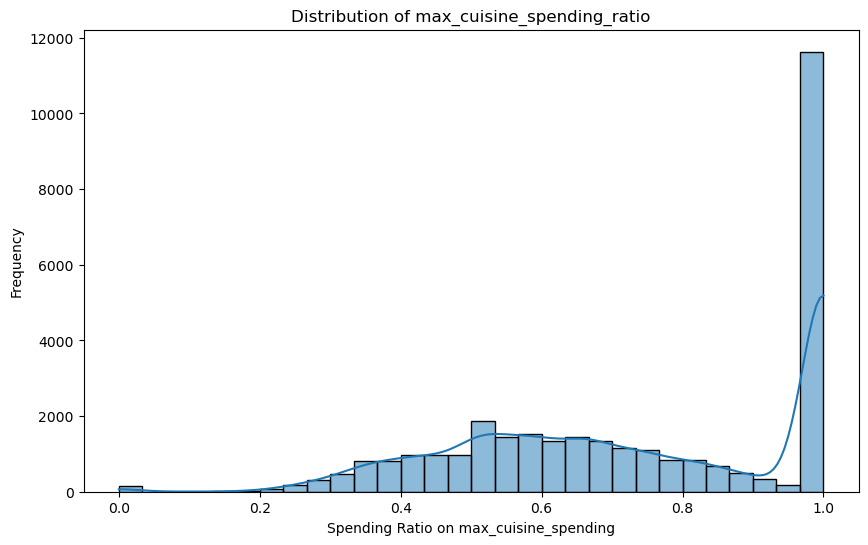

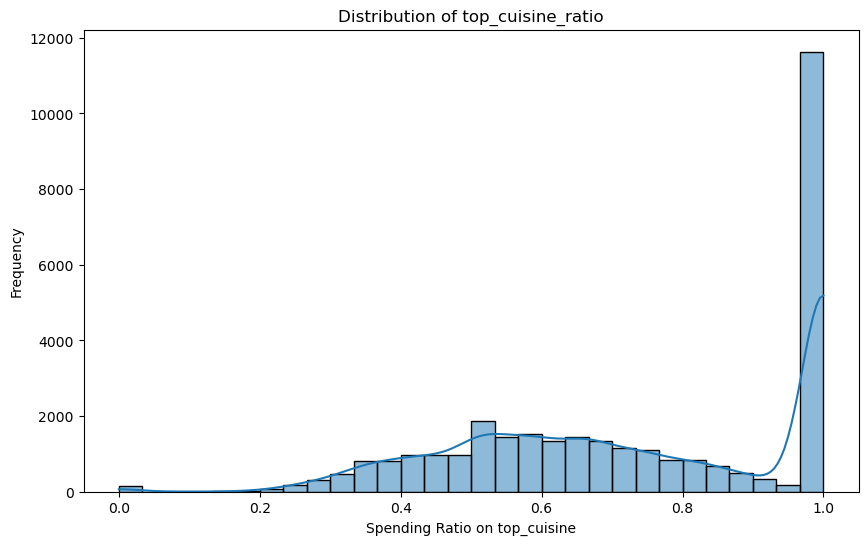

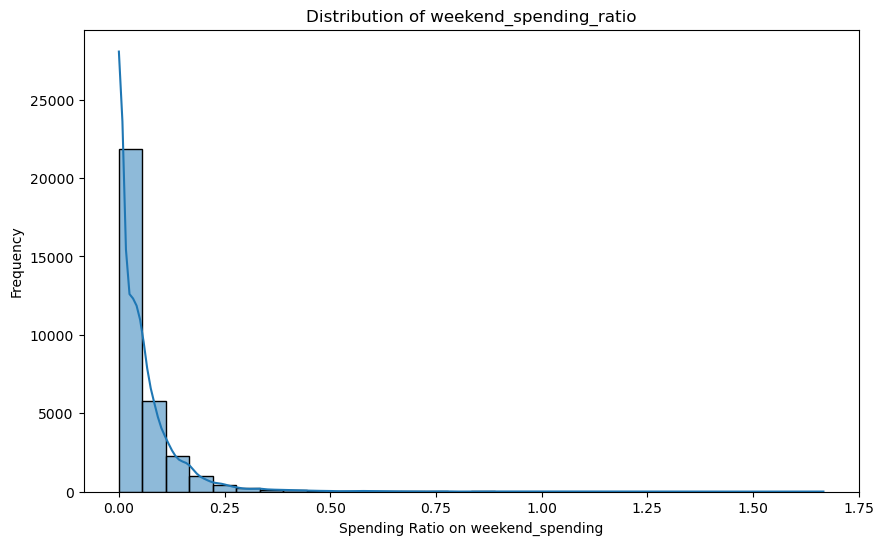

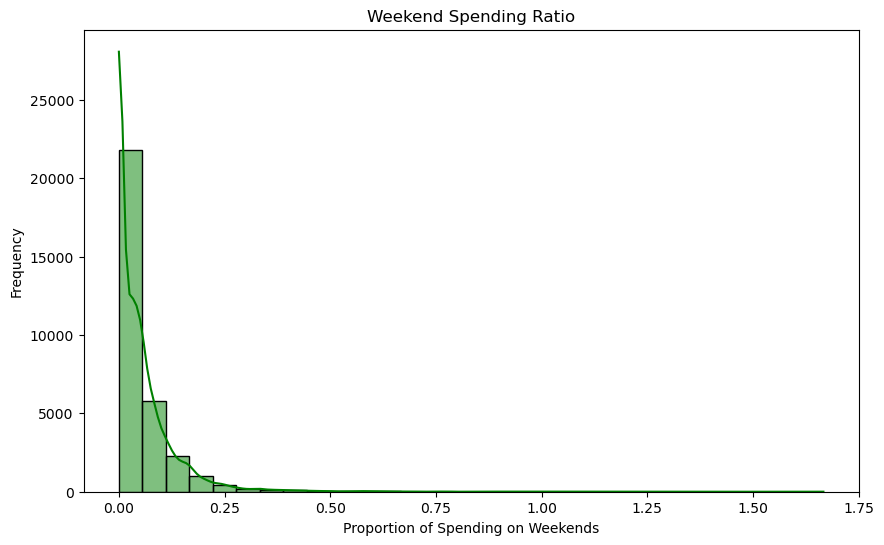

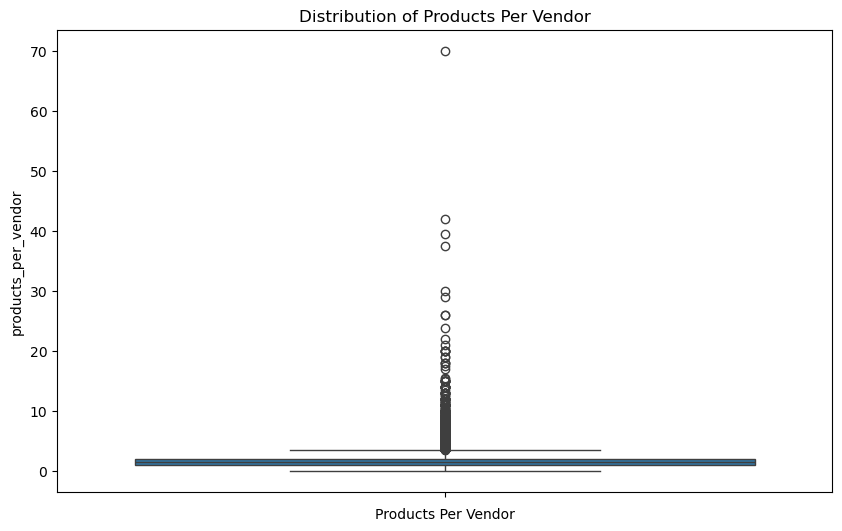

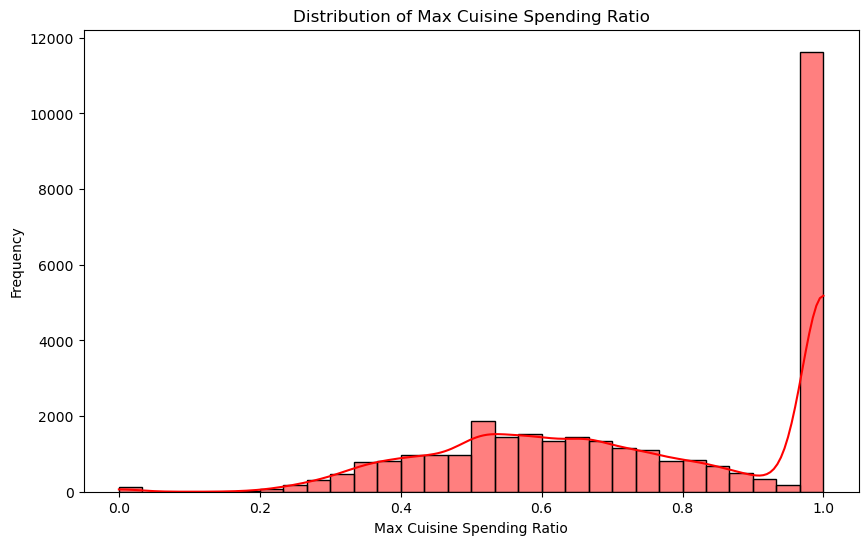

C:\Users\gonca\AppData\Local\Temp\ipykernel_6772\3508630027.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='highest_spending_hour', data=data, palette='viridis')


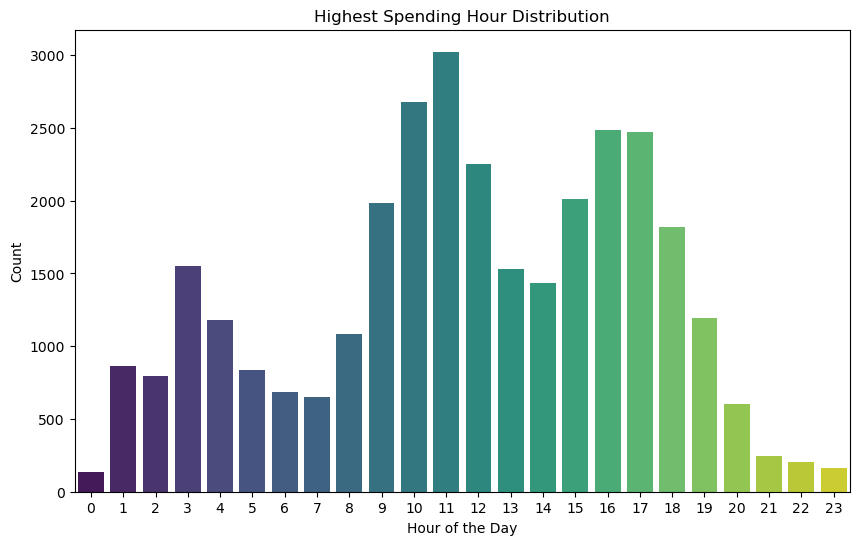

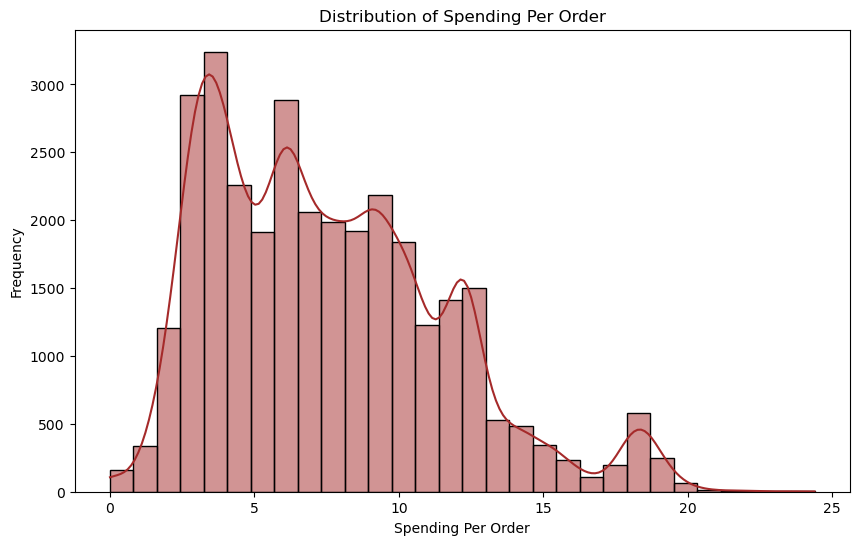

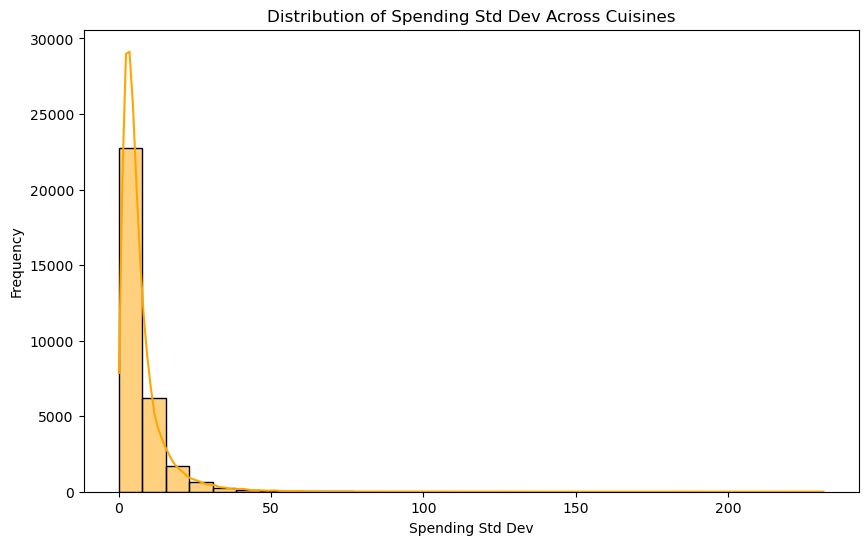

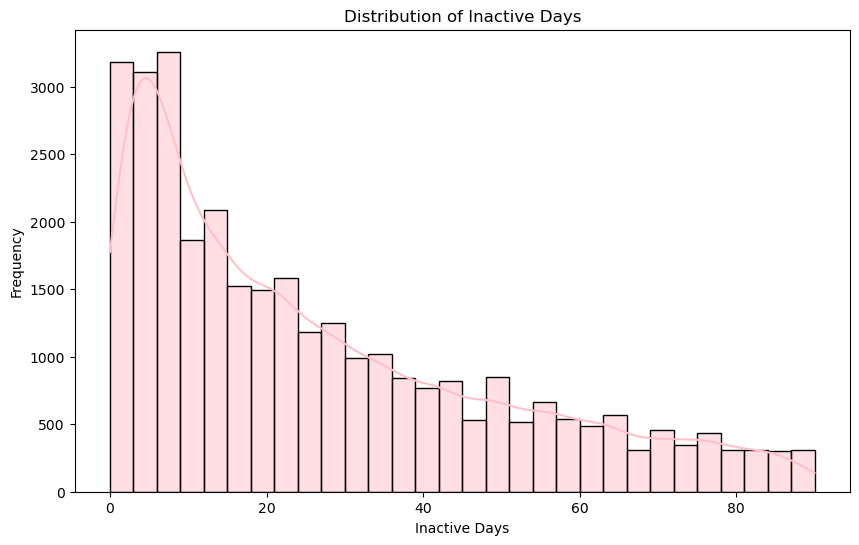

C:\Users\gonca\AppData\Local\Temp\ipykernel_6772\3508630027.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='regular_customer', data=data, palette='pastel')


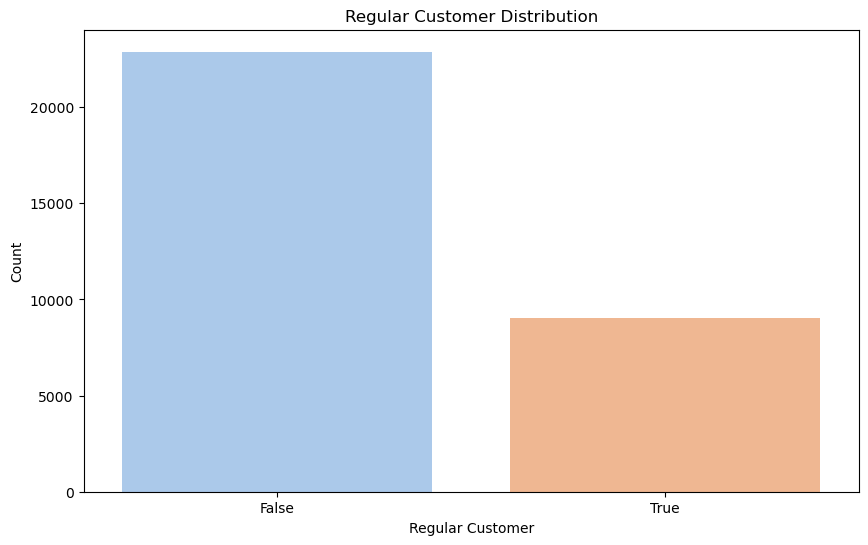

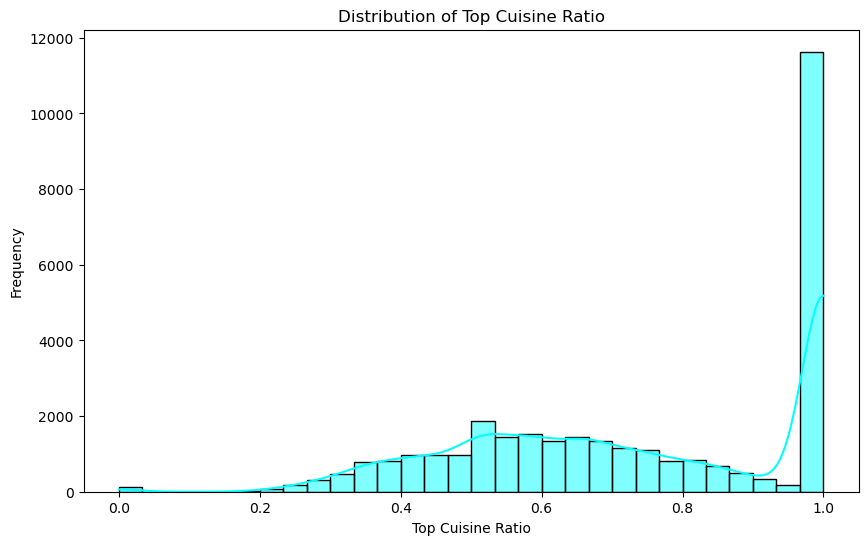

C:\Users\gonca\AppData\Local\Temp\ipykernel_6772\3508630027.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cuisine_loyalty', data=data, palette='coolwarm')


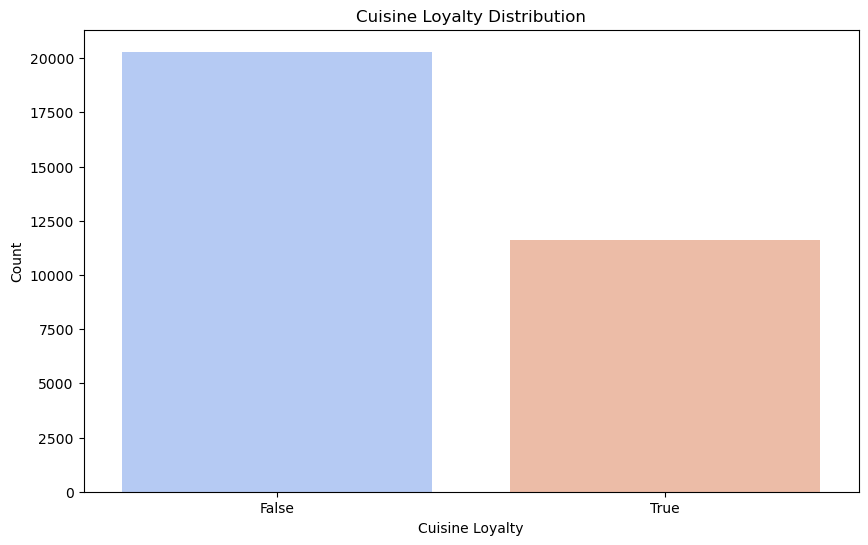

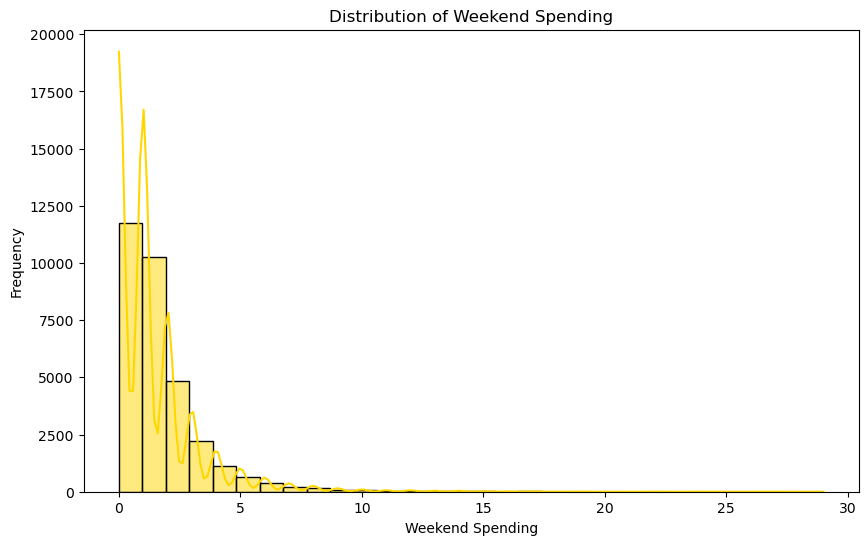

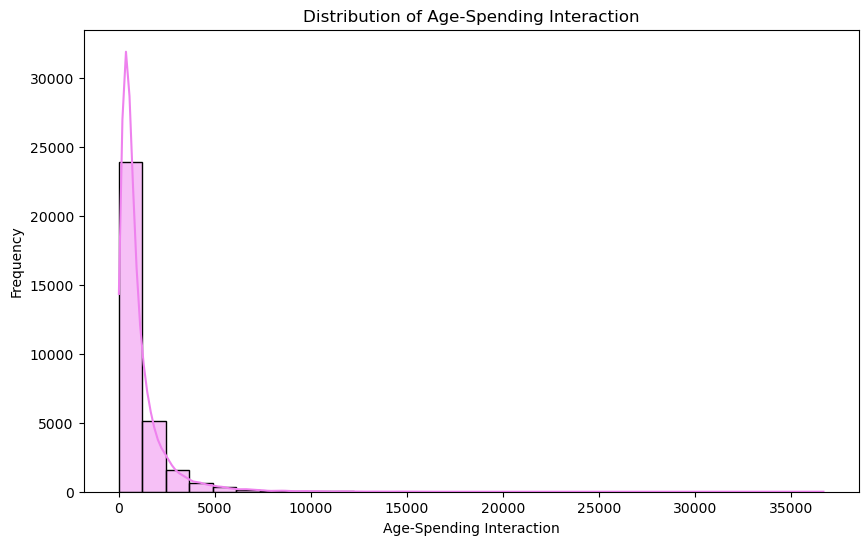

In [50]:
# Total Spending
plt.figure(figsize=(10, 6))
sns.histplot(data['total_spending'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Spending")
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.show()

# Average Spending Per Cuisine
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_spending_per_cuisine'], bins=30, kde=True, color='green')
plt.title("Distribution of Average Spending Per Cuisine")
plt.xlabel("Average Spending Per Cuisine")
plt.ylabel("Frequency")
plt.show()

# Order Activity Duration
plt.figure(figsize=(10, 6))
sns.histplot(data['order_activity_duration'], bins=30, kde=True, color='orange')
plt.title("Distribution of Order Activity Duration")
plt.xlabel("Order Activity Duration (Days)")
plt.ylabel("Frequency")
plt.show()

# Order Frequency
plt.figure(figsize=(10, 6))
sns.histplot(data['order_frequency'], bins=30, kde=True, color='purple')
plt.title("Distribution of Order Frequency")
plt.xlabel("Order Frequency")
plt.ylabel("Frequency")
plt.show()

# High Spender Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='high_spender', data=data, palette='pastel')
plt.title("High Spenders Distribution")
plt.xlabel("High Spender")
plt.ylabel("Count")
plt.show()

# Loyal Customer Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='loyal_customer', data=data, palette='coolwarm')
plt.title("Loyal Customers Distribution")
plt.xlabel("Loyal Customer")
plt.ylabel("Count")
plt.show()

# Cuisine Diversity
plt.figure(figsize=(10, 6))
sns.histplot(data['cuisine_diversity'], bins=15, kde=False, color='purple')
plt.title("Distribution of Cuisine Diversity")
plt.xlabel("Number of Unique Cuisines Ordered")
plt.ylabel("Frequency")
plt.show()

# Favorite Cuisine
plt.figure(figsize=(12, 6))
data['favorite_cuisine'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Favorite Cuisine Distribution")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.show()

# Peak Order Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='peak_order_hour', data=data, palette='viridis')
plt.title("Peak Order Hour Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Customers")
plt.show()

# Peak Order Day
plt.figure(figsize=(10, 6))
sns.countplot(x='peak_order_day', data=data, palette='coolwarm')
plt.title("Peak Order Day Distribution")
plt.xlabel("Day of the Week (0=Sunday, 6=Saturday)")
plt.ylabel("Number of Customers")
plt.show()

# Spending Per Cuisine Ratio
for col in [col for col in data.columns if '_ratio' in col]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"Spending Ratio on {col.replace('_ratio', '')}")
    plt.ylabel("Frequency")
    plt.show()

# Weekend Spending Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['weekend_spending_ratio'], bins=30, kde=True, color='green')
plt.title("Weekend Spending Ratio")
plt.xlabel("Proportion of Spending on Weekends")
plt.ylabel("Frequency")
plt.show()

# Products Per Vendor
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['products_per_vendor'])
plt.title("Distribution of Products Per Vendor")
plt.xlabel("Products Per Vendor")
plt.show()

# Max Cuisine Spending Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['max_cuisine_spending_ratio'], bins=30, kde=True, color='red')
plt.title("Distribution of Max Cuisine Spending Ratio")
plt.xlabel("Max Cuisine Spending Ratio")
plt.ylabel("Frequency")
plt.show()

# Highest Spending Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='highest_spending_hour', data=data, palette='viridis')
plt.title("Highest Spending Hour Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

# Spending Per Order
plt.figure(figsize=(10, 6))
sns.histplot(data['spending_per_order'], bins=30, kde=True, color='brown')
plt.title("Distribution of Spending Per Order")
plt.xlabel("Spending Per Order")
plt.ylabel("Frequency")
plt.show()

# Spending Std Dev Across Cuisines
plt.figure(figsize=(10, 6))
sns.histplot(data['spending_std'], bins=30, kde=True, color='orange')
plt.title("Distribution of Spending Std Dev Across Cuisines")
plt.xlabel("Spending Std Dev")
plt.ylabel("Frequency")
plt.show()

# Inactive Days
plt.figure(figsize=(10, 6))
sns.histplot(data['inactive_days'], bins=30, kde=True, color='pink')
plt.title("Distribution of Inactive Days")
plt.xlabel("Inactive Days")
plt.ylabel("Frequency")
plt.show()

# Regular Customer Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='regular_customer', data=data, palette='pastel')
plt.title("Regular Customer Distribution")
plt.xlabel("Regular Customer")
plt.ylabel("Count")
plt.show()

# Top Cuisine Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['top_cuisine_ratio'], bins=30, kde=True, color='cyan')
plt.title("Distribution of Top Cuisine Ratio")
plt.xlabel("Top Cuisine Ratio")
plt.ylabel("Frequency")
plt.show()

# Cuisine Loyalty Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_loyalty', data=data, palette='coolwarm')
plt.title("Cuisine Loyalty Distribution")
plt.xlabel("Cuisine Loyalty")
plt.ylabel("Count")
plt.show()

# Weekend Spending
plt.figure(figsize=(10, 6))
sns.histplot(data['weekend_spending'], bins=30, kde=True, color='gold')
plt.title("Distribution of Weekend Spending")
plt.xlabel("Weekend Spending")
plt.ylabel("Frequency")
plt.show()

# Age-Spending Interaction
plt.figure(figsize=(10, 6))
sns.histplot(data['age_spending_interaction'], bins=30, kde=True, color='violet')
plt.title("Distribution of Age-Spending Interaction")
plt.xlabel("Age-Spending Interaction")
plt.ylabel("Frequency")
plt.show()

# Analysis of Plots

## 1. Distribution of Total Spending
The distribution of total spending is heavily right-skewed, with most customers spending a small amount and a few customers contributing to high spending values. This indicates a small proportion of high-value customers.

---

## 2. Distribution of Average Spending Per Cuisine
The average spending per cuisine follows a similar right-skewed pattern, with the majority of customers spending relatively low amounts across cuisines. Few outliers represent customers with significant average spending.

---

## 3. Distribution of Order Activity Duration
The order activity duration shows a significant peak at zero, indicating that many customers place only one order or have no prolonged activity. The remaining durations are distributed relatively uniformly.

---

## 4. Distribution of Order Frequency
Order frequency is skewed heavily towards lower values, with most customers placing very few orders. The distribution highlights occasional spikes, possibly related to promotions or recurring customers.

---

## 5. High Spenders Distribution
The high spenders are nearly evenly distributed between `True` and `False`, indicating a balanced representation of customers with high and low spending behavior.

---

## 6. Loyal Customers Distribution
There are more loyal customers (`True`) compared to non-loyal customers (`False`). This suggests that a majority of customers return to the platform for subsequent orders, indicating customer satisfaction and retention.

---

## 7. Distribution of Cuisine Diversity
The diversity of cuisines ordered by customers is heavily concentrated on a small number of unique cuisines, with the majority ordering from one or two cuisines. This indicates a preference for specific cuisines over others.

---

## 8. Favorite Cuisine Distribution
Asian cuisine dominates as the most popular choice among customers, followed by American cuisine. Other cuisines such as Italian and Indian also have notable popularity, whereas Cafe and Desserts have the lowest counts.

---

## 9. Peak Order Hour Distribution
Orders are most frequent during late mornings and early afternoons, with a significant decline during evening and night hours. This reflects customer behavior favoring lunchtime orders.

---

## 10. Peak Order Day Distribution
Sunday (0) is the most popular day for orders, followed by Monday. This suggests that customers prefer ordering at the start of the week or during weekends, potentially linked to lifestyle and availability.

---

## 11. Distribution of `CUI_American_ratio`
The distribution indicates that most customers spend a negligible portion of their total expenditure on American cuisine, with a noticeable peak at a spending ratio of 0. A smaller peak is observed at 1, representing customers who exclusively spend on American cuisine.

---

## 12. Distribution of `CUI_Asian_ratio`
The spending ratio for Asian cuisine shows a similar trend, with the majority of customers spending very little, as indicated by the peak at 0. Additionally, there is a smaller peak at 1 for customers who focus exclusively on Asian cuisine.

---

## 13. Distribution of `CUI_Beverages_ratio`
Most customers have minimal spending on beverages, reflected in the large concentration near 0. A smaller subset of customers appears to exclusively spend on beverages, as indicated by a peak at 1.

---

## 14. Distribution of `CUI_Cafe_ratio`
The spending ratio for cafes is heavily skewed towards zero, demonstrating that this category is not a primary expenditure for most customers. Very few customers spend exclusively on cafes.

---

## 15. Distribution of `CUI_Chicken_Dishes_ratio`
The spending ratio for chicken dishes is similar to other categories, with the majority of customers spending very little. A smaller peak at 1 suggests that a limited group of customers prioritize chicken dishes.

---

## 16. Distribution of `CUI_Chinese_ratio`
The majority of customers exhibit minimal spending on Chinese cuisine, with a strong concentration at 0. A secondary peak at 1 indicates a smaller segment of customers who exclusively prefer Chinese cuisine.

---

## 17. Distribution of `CUI_Desserts_ratio`
Spending on desserts is predominantly low for most customers, as suggested by the high frequency near 0. A small proportion of customers focus solely on desserts, leading to a minor peak at 1.

---

## 18. Distribution of `CUI_Healthy_ratio`
The spending on healthy cuisine follows a similar pattern, with the majority of customers spending very little and a smaller peak at 1 for those who exclusively focus on healthy cuisine.

---

## 19. Distribution of `CUI_Indian_ratio`
The spending distribution for Indian cuisine shows most customers allocating negligible amounts, with a large peak near 0. A smaller peak at 1 represents customers who dedicate all their spending to Indian cuisine.

---

## 20. Distribution of `CUI_Italian_ratio`
The spending ratio on Italian cuisine mirrors other cuisine categories, with most customers spending minimally and a smaller group spending exclusively on Italian cuisine, as shown by the peak at 1.

---

## 21. Distribution of `CUI_Japanese_ratio`
The spending ratio on Japanese cuisine is heavily skewed towards zero, indicating that most customers spend very little on this category. A secondary peak at a ratio of 1 represents customers exclusively spending on Japanese cuisine.

---

## 22. Distribution of `CUI_Noodle_Dishes_ratio`
The spending on noodle dishes is similarly skewed towards zero, with minimal spending by most customers. A small number of customers are observed to exclusively spend on noodle dishes.

---

## 23. Distribution of `CUI_OTHER_ratio`
The distribution of spending in the "Other" cuisine category shows that most customers spend very little on this category. A slight peak at a ratio of 1 indicates exclusive spending by a few customers.

---

## 24. Distribution of `CUI_Street Food / Snacks_ratio`
The spending ratio for street food or snacks is also skewed towards zero. Most customers do not spend significantly on this category, with a minority exclusively spending on it.

---

## 25. Distribution of `CUI_Thai_ratio`
The Thai cuisine spending ratio is heavily skewed towards zero, with a very small proportion of customers exclusively spending on Thai food, as shown by the peak at 1.

---

## 26. Distribution of `max_cuisine_spending_ratio`
The `max_cuisine_spending_ratio` exhibits a bimodal distribution. A large peak at 1 indicates many customers allocate all their spending to a single cuisine. The remaining values show customers with more balanced spending patterns.

---

## 27. Distribution of `top_cuisine_ratio`
The distribution of `top_cuisine_ratio` closely mirrors that of `max_cuisine_spending_ratio`. It highlights that a significant proportion of customers predominantly spend on a single top cuisine.

---

## 28. Distribution of `weekend_spending_ratio`
The `weekend_spending_ratio` is skewed heavily towards zero, signifying that most customers spend a minimal proportion of their total spending on weekends.

---

## 29. Distribution of Products Per Vendor
The box plot for products per vendor shows that most vendors offer a limited range of products, with a few outliers providing significantly more products. These outliers represent vendors with extensive menus.

---

## 30. Proportion of Weekend Spending
The proportion of weekend spending shows a highly skewed distribution, with the majority of customers spending very little during the weekend. This suggests weekdays are more popular for orders.

---



# O que falta

data-preproccesing: outliers, missing values...

clustering (correr depois de fazer o preproccesing)

explicar os clusters e analisar as caracteristicas de cada um

sugerir business aplications

report

# Outliers

In [51]:
def detect_outliers_iqr(df, missing_threshold):

    missing_col = []  # List to store columns with outlier percentage exceeding the threshold
    outliers_indices = set()  # Set to collect indices of all detected outliers
    bounds = {}  # Dictionary to store lower and upper bounds for each column

    # Iterate through all numerical columns in the DataFrame
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)  # Calculate the first quartile (25th percentile)
        Q3 = df[column].quantile(0.75)  # Calculate the third quartile (75th percentile)
        IQR = Q3 - Q1  # Calculate the interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
        
        # Store the bounds for the column
        bounds[column] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
        
        # Identify outliers in the column
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_indices.update(outlier_data.index)  # Add the indices of outliers to the set
        
        # Calculate the percentage of outliers in the column
        missing = len(outlier_data) / len(df) * 100
        
        # Print the summary of outliers for the column
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {missing:.2f}% \n')
        
        # Add column to the missing_col list if outliers exceed the threshold percentage
        if missing > missing_threshold:
            missing_col.append(column)
        
        # Create a boxplot for the column, highlighting outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=column, color='orange', showfliers=False)  # Plot boxplot without outliers
        sns.stripplot(
            data=outlier_data, 
            x=column, 
            color='red', 
            jitter=True, 
            label='Outliers'
        )  # Overlay outliers as red points
        plt.title(f'Boxplot with Outliers for {column}')
        plt.legend()
        plt.show()
    
    # Print the columns with more than the missing threshold percentage of outliers
    print(f'Columns with more than {missing_threshold}% Outliers:')        
    print(missing_col)
    
    return bounds  # Return the dictionary of bounds

Column: customer_age - Number of Outliers: 1653
Column: customer_age - % of Outliers: 5.18% 



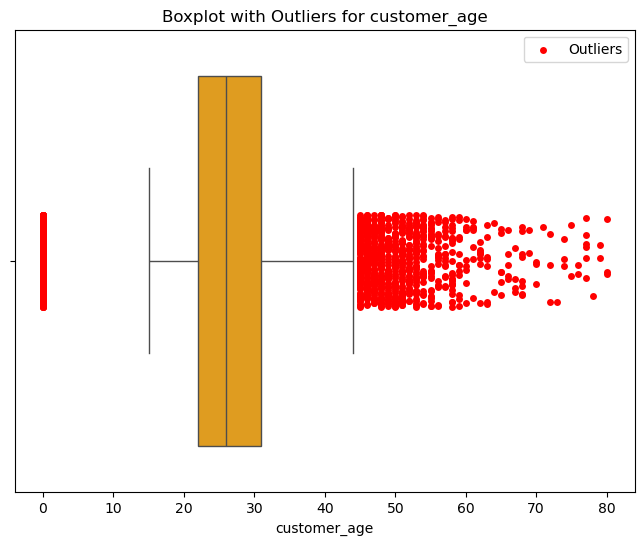

Column: vendor_count - Number of Outliers: 1524
Column: vendor_count - % of Outliers: 4.78% 



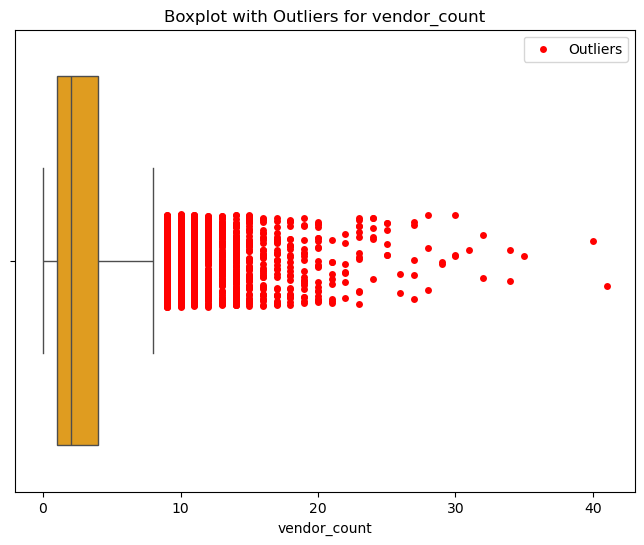

Column: product_count - Number of Outliers: 2371
Column: product_count - % of Outliers: 7.44% 



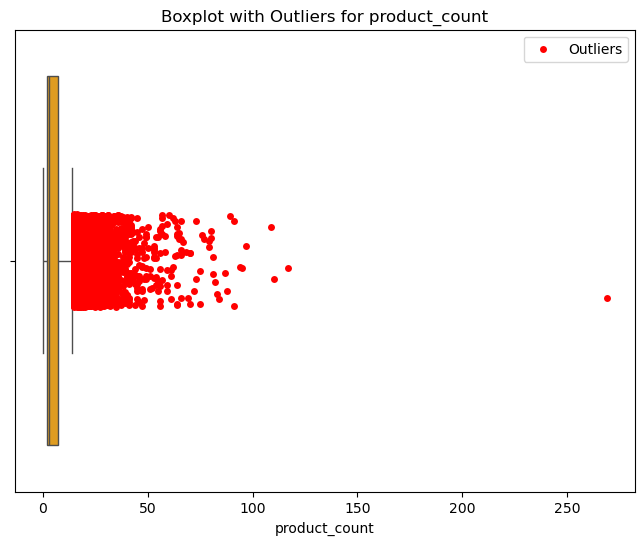

Column: is_chain - Number of Outliers: 3155
Column: is_chain - % of Outliers: 9.89% 



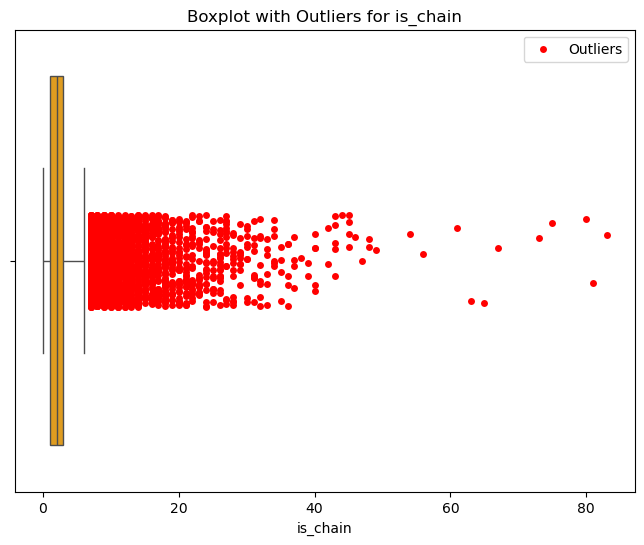

Column: first_order - Number of Outliers: 0
Column: first_order - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


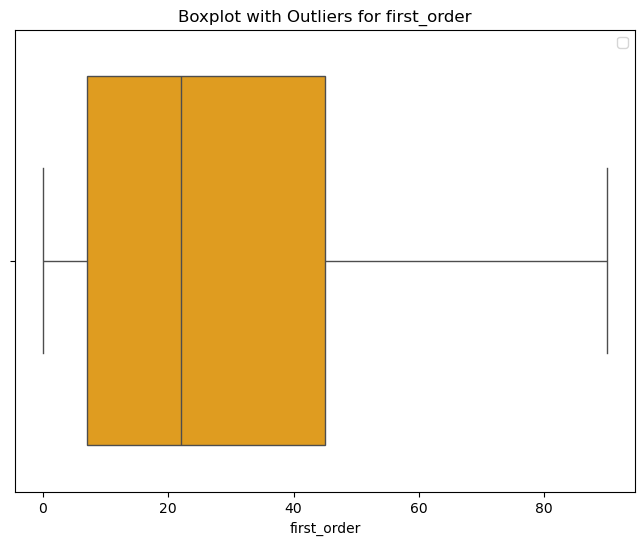

Column: last_order - Number of Outliers: 0
Column: last_order - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


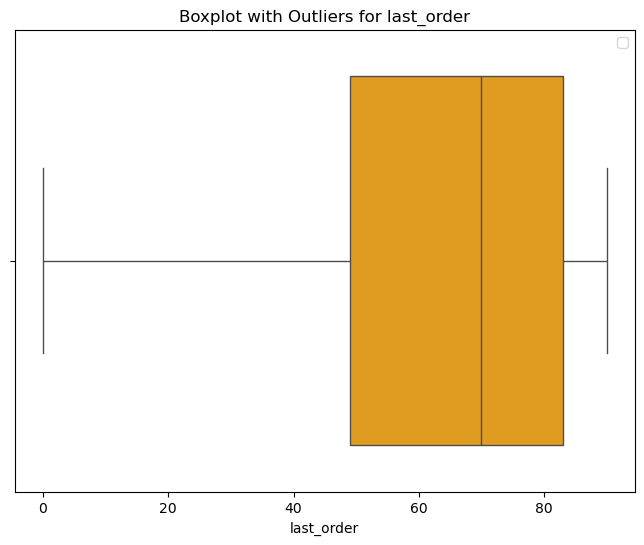

Column: CUI_American - Number of Outliers: 3511
Column: CUI_American - % of Outliers: 11.01% 



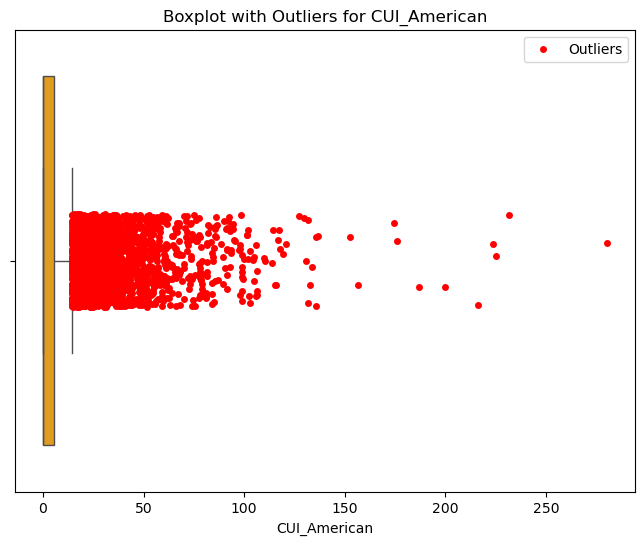

Column: CUI_Asian - Number of Outliers: 3475
Column: CUI_Asian - % of Outliers: 10.90% 



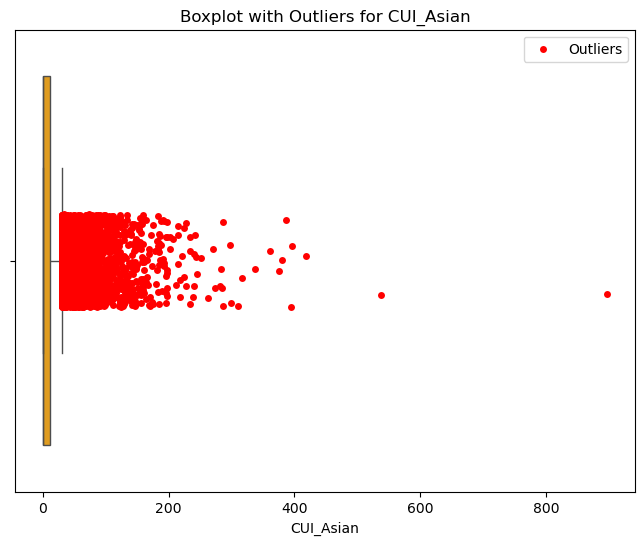

Column: CUI_Beverages - Number of Outliers: 5435
Column: CUI_Beverages - % of Outliers: 17.04% 



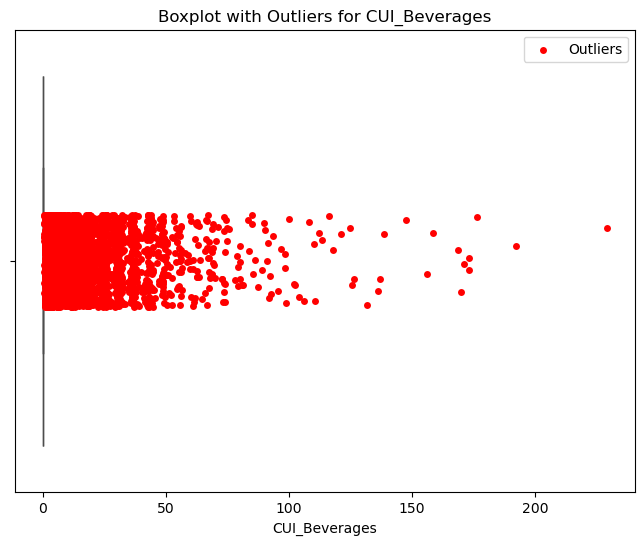

Column: CUI_Cafe - Number of Outliers: 1366
Column: CUI_Cafe - % of Outliers: 4.28% 



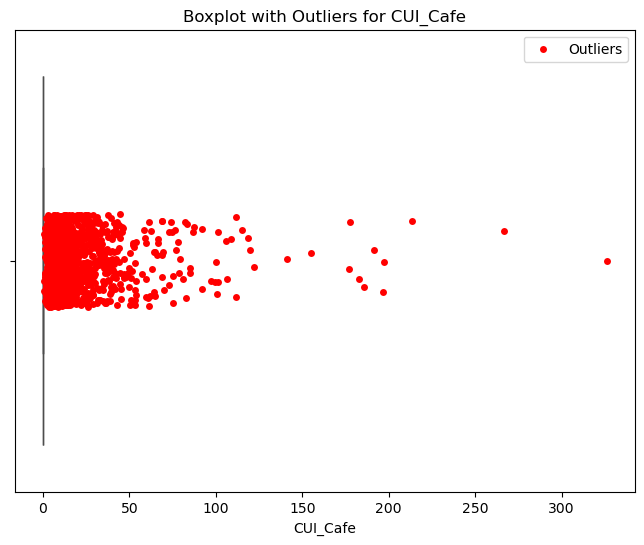

Column: CUI_Chicken Dishes - Number of Outliers: 3248
Column: CUI_Chicken Dishes - % of Outliers: 10.19% 



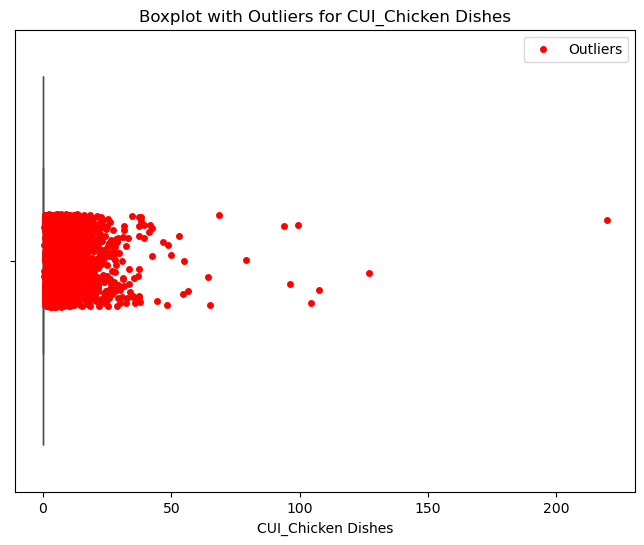

Column: CUI_Chinese - Number of Outliers: 3522
Column: CUI_Chinese - % of Outliers: 11.04% 



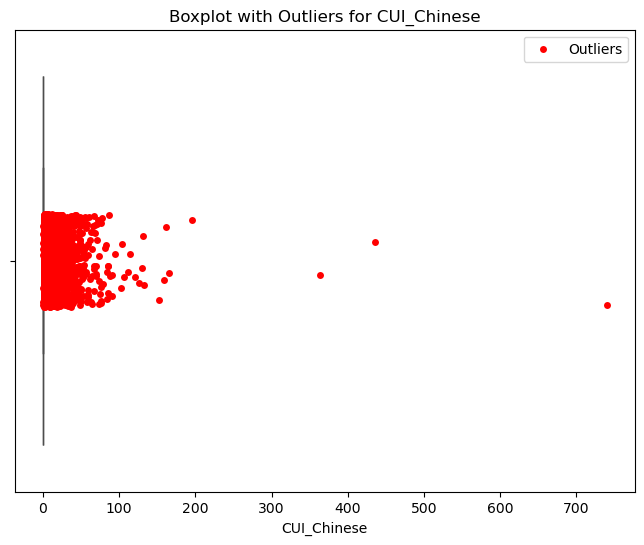

Column: CUI_Desserts - Number of Outliers: 2016
Column: CUI_Desserts - % of Outliers: 6.32% 



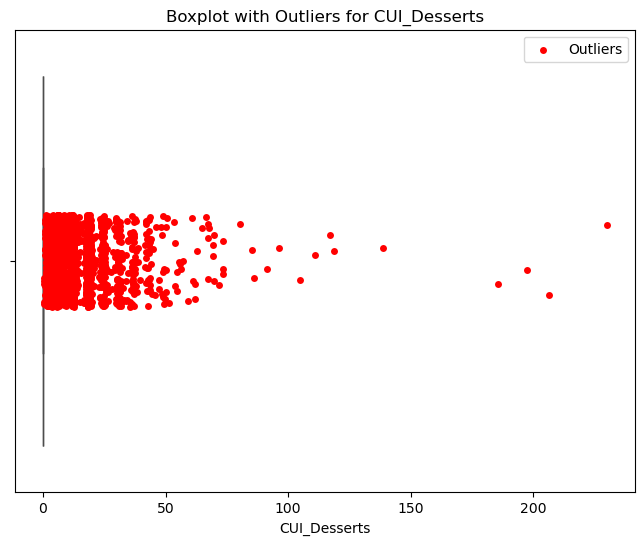

Column: CUI_Healthy - Number of Outliers: 2169
Column: CUI_Healthy - % of Outliers: 6.80% 



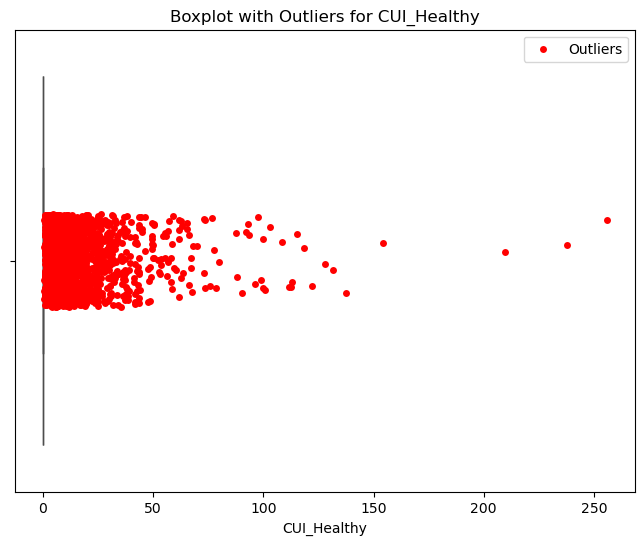

Column: CUI_Indian - Number of Outliers: 3448
Column: CUI_Indian - % of Outliers: 10.81% 



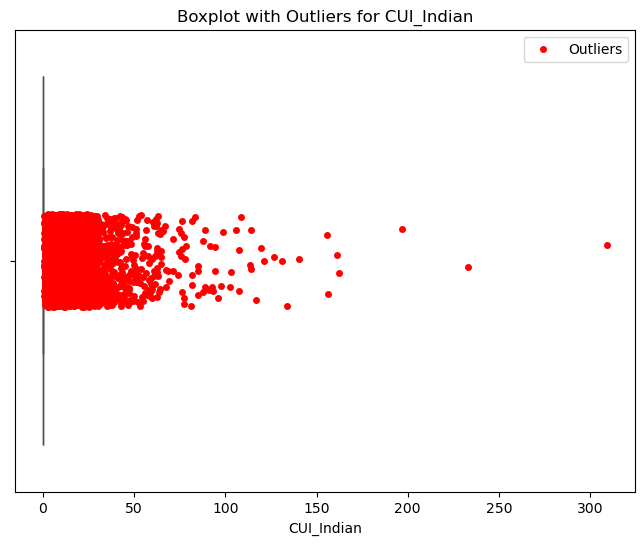

Column: CUI_Italian - Number of Outliers: 6448
Column: CUI_Italian - % of Outliers: 20.22% 



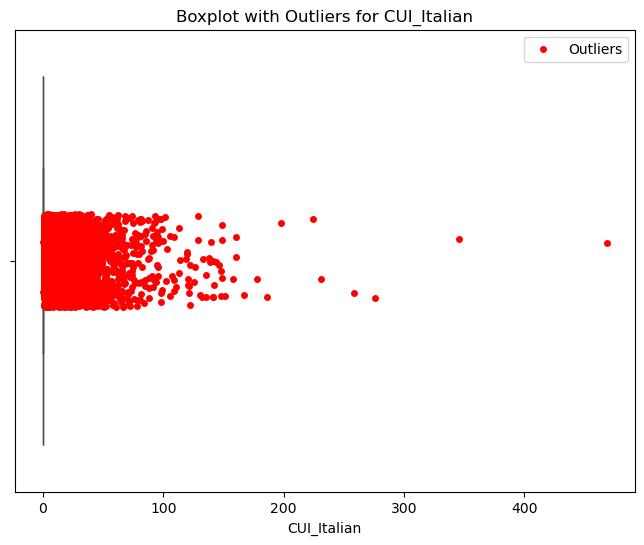

Column: CUI_Japanese - Number of Outliers: 6301
Column: CUI_Japanese - % of Outliers: 19.76% 



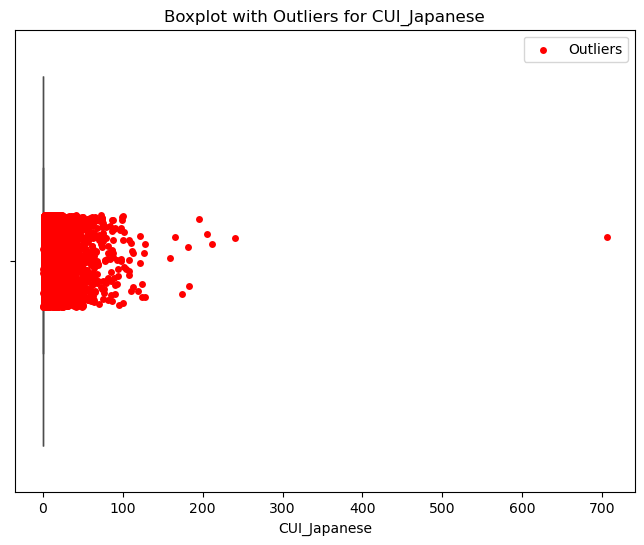

Column: CUI_Noodle Dishes - Number of Outliers: 2226
Column: CUI_Noodle Dishes - % of Outliers: 6.98% 



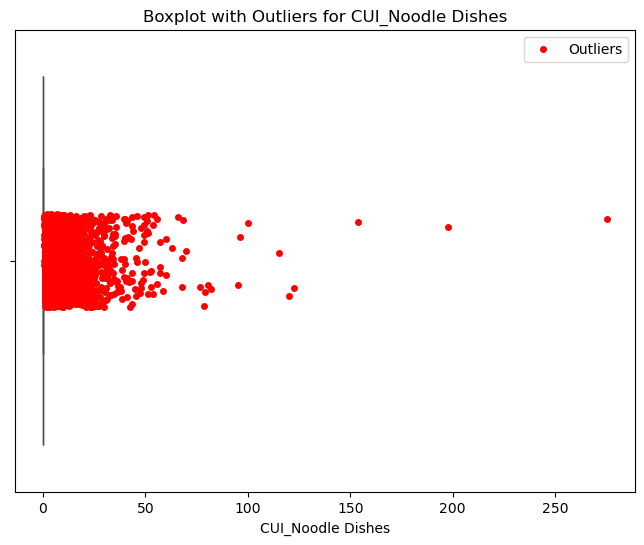

Column: CUI_OTHER - Number of Outliers: 7041
Column: CUI_OTHER - % of Outliers: 22.08% 



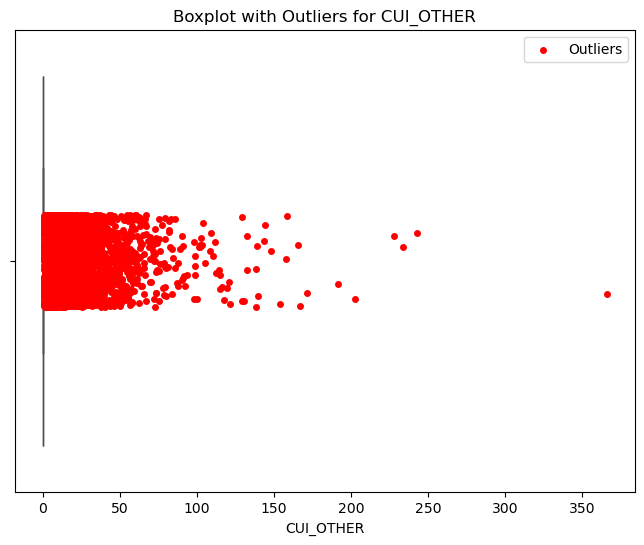

Column: CUI_Street Food / Snacks - Number of Outliers: 4249
Column: CUI_Street Food / Snacks - % of Outliers: 13.32% 



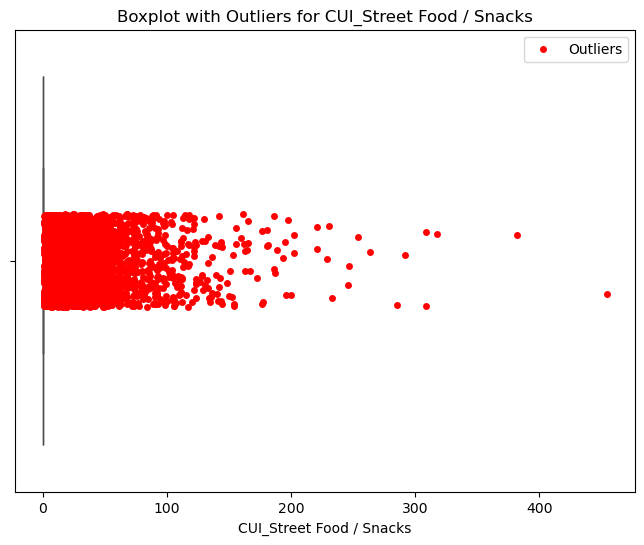

Column: CUI_Thai - Number of Outliers: 2378
Column: CUI_Thai - % of Outliers: 7.46% 



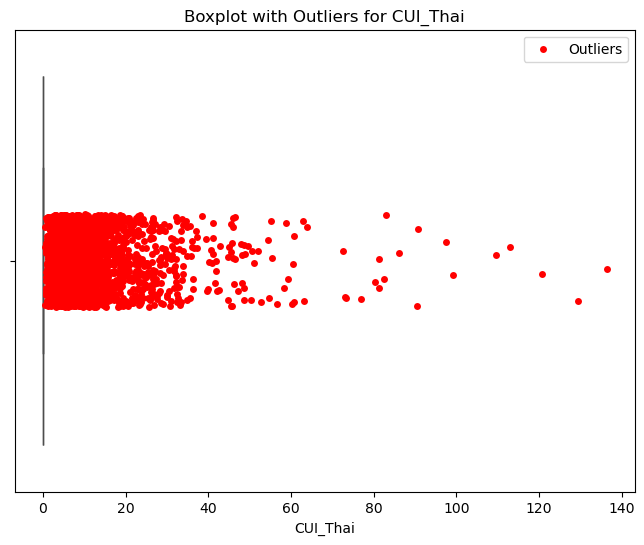

Column: DOW_0 - Number of Outliers: 1406
Column: DOW_0 - % of Outliers: 4.41% 



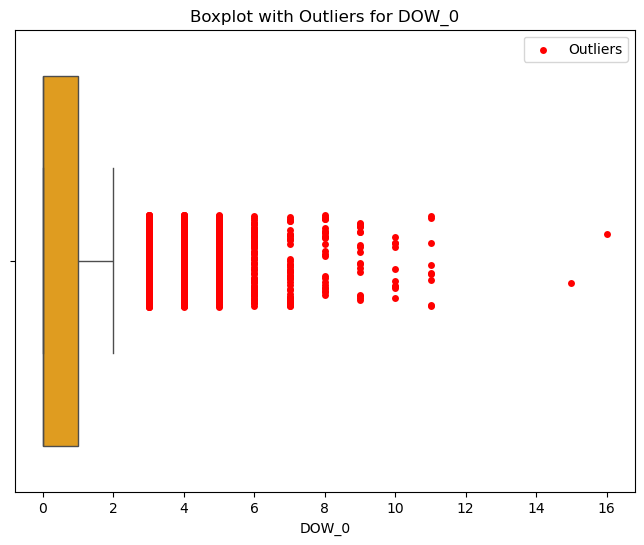

Column: DOW_1 - Number of Outliers: 1495
Column: DOW_1 - % of Outliers: 4.69% 



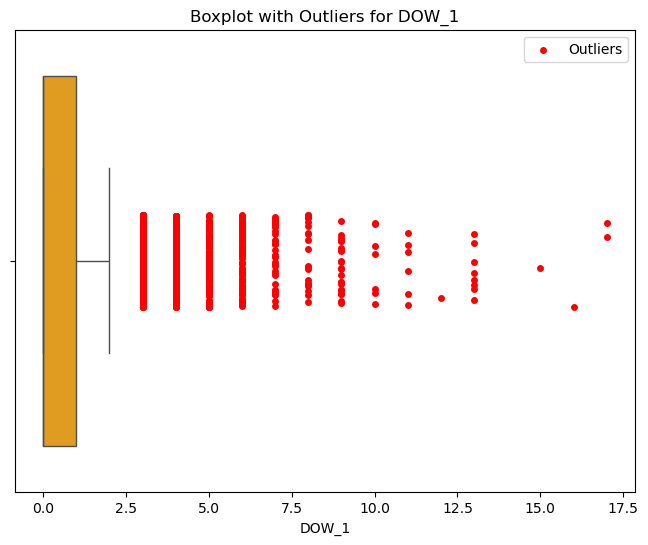

Column: DOW_2 - Number of Outliers: 1589
Column: DOW_2 - % of Outliers: 4.98% 



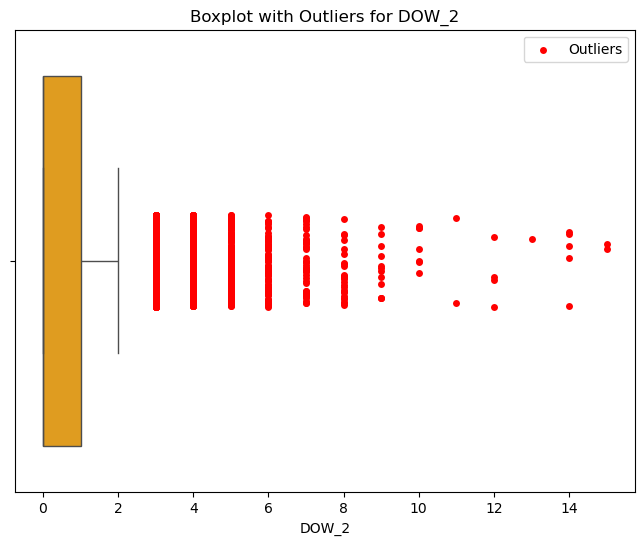

Column: DOW_3 - Number of Outliers: 1654
Column: DOW_3 - % of Outliers: 5.19% 



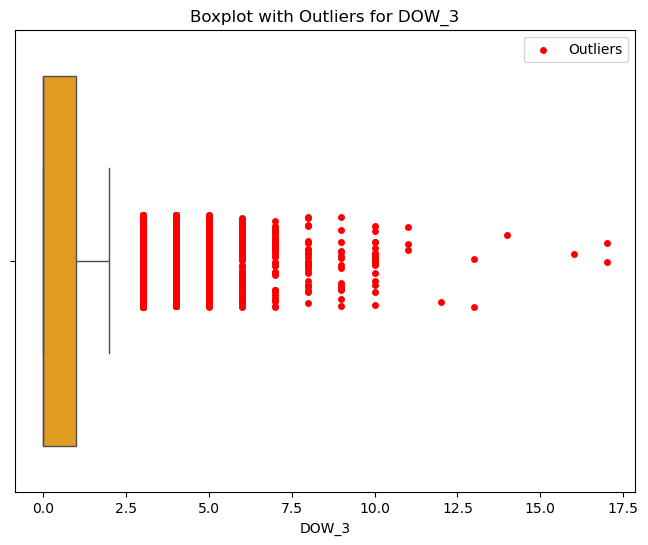

Column: DOW_4 - Number of Outliers: 1784
Column: DOW_4 - % of Outliers: 5.59% 



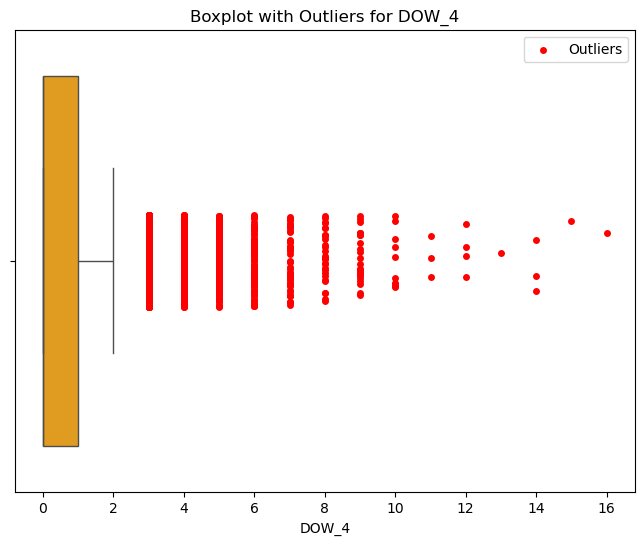

Column: DOW_5 - Number of Outliers: 1708
Column: DOW_5 - % of Outliers: 5.36% 



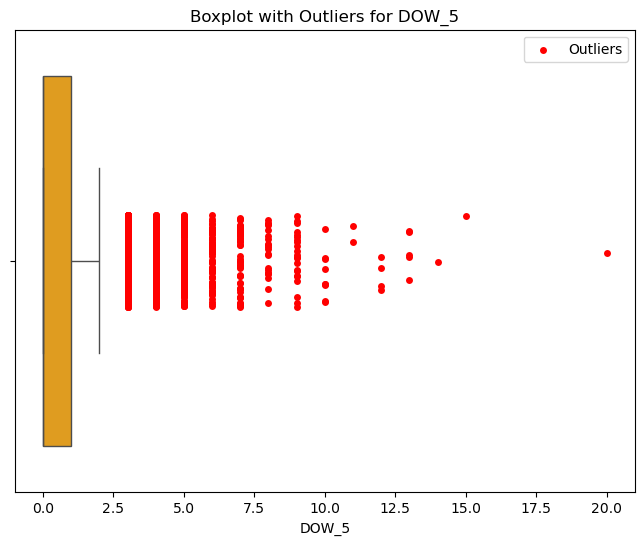

Column: DOW_6 - Number of Outliers: 1978
Column: DOW_6 - % of Outliers: 6.20% 



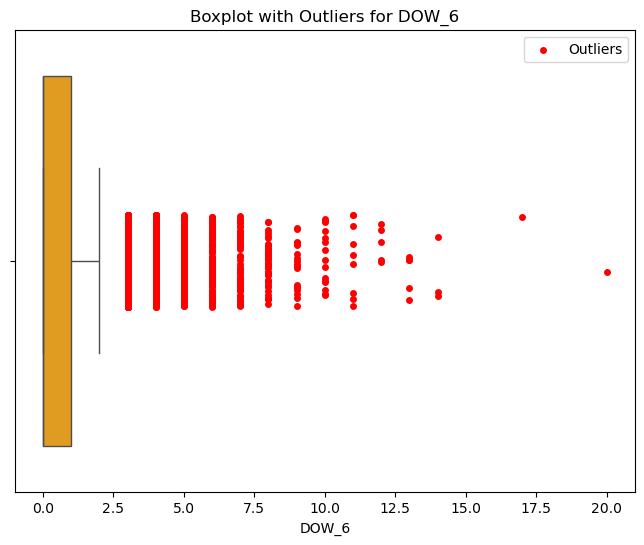

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: HR_0 - Number of Outliers: 0
Column: HR_0 - % of Outliers: 0.00% 



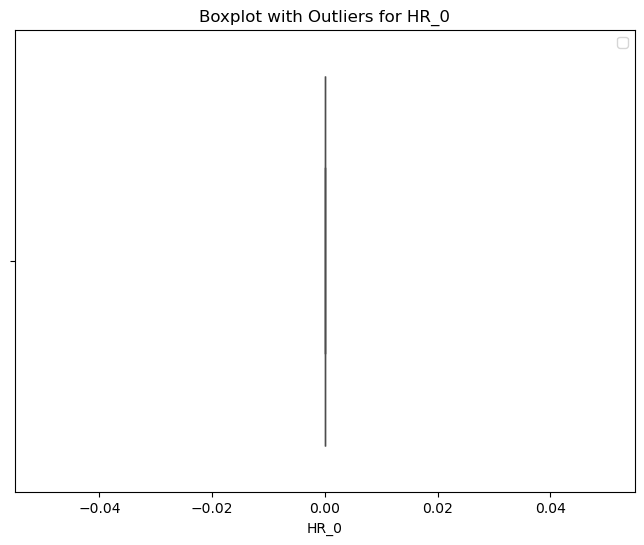

Column: HR_1 - Number of Outliers: 1284
Column: HR_1 - % of Outliers: 4.03% 



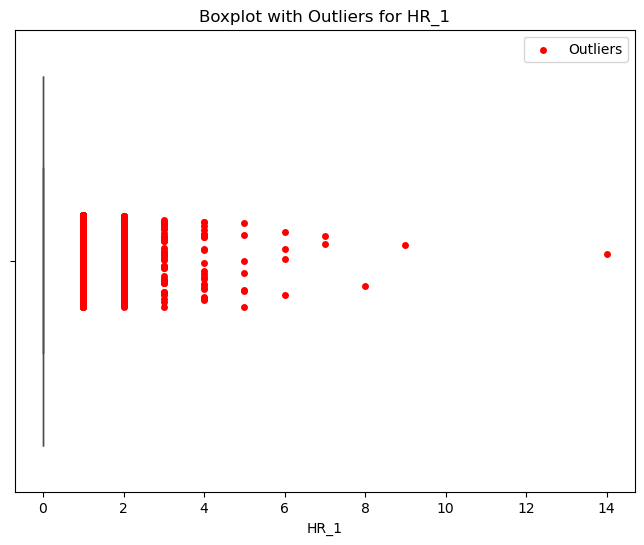

Column: HR_2 - Number of Outliers: 1492
Column: HR_2 - % of Outliers: 4.68% 



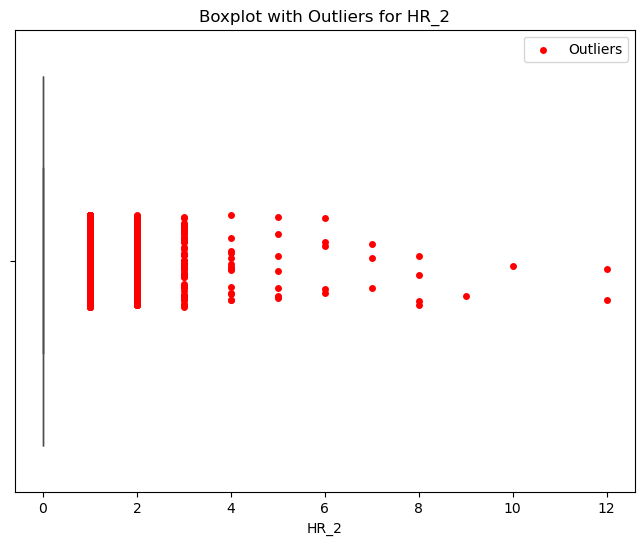

Column: HR_3 - Number of Outliers: 2524
Column: HR_3 - % of Outliers: 7.92% 



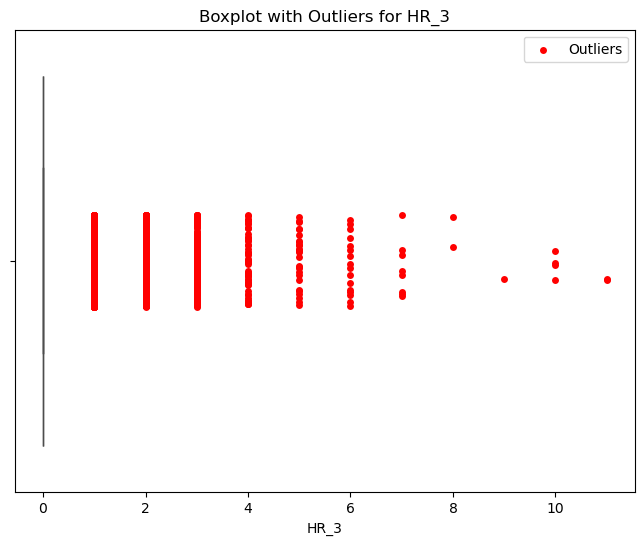

Column: HR_4 - Number of Outliers: 2369
Column: HR_4 - % of Outliers: 7.43% 



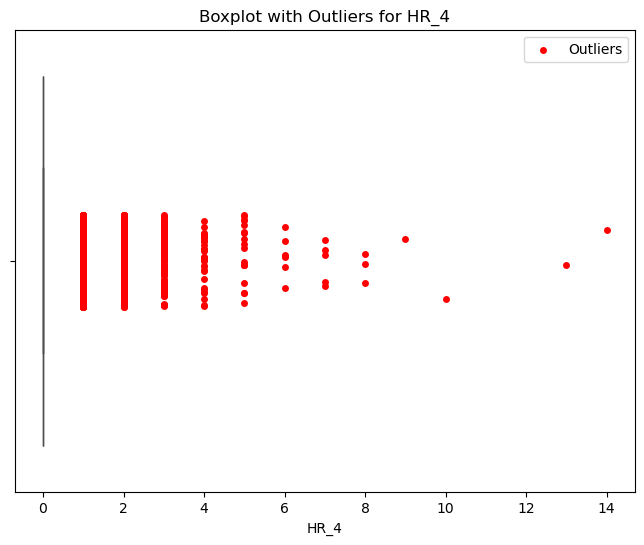

Column: HR_5 - Number of Outliers: 2028
Column: HR_5 - % of Outliers: 6.36% 



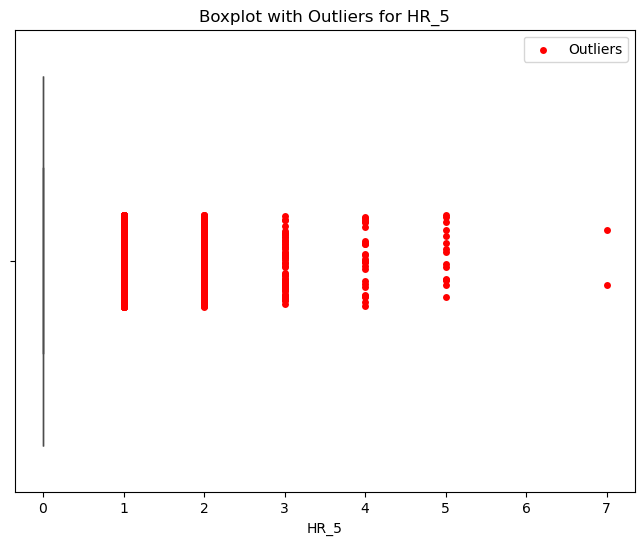

Column: HR_6 - Number of Outliers: 1752
Column: HR_6 - % of Outliers: 5.49% 



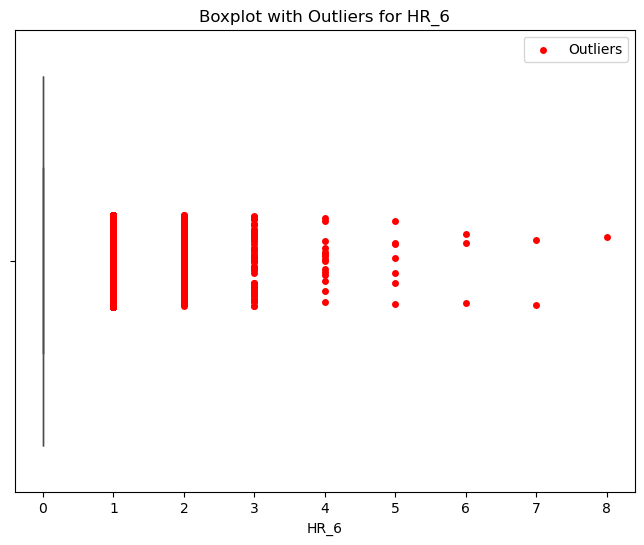

Column: HR_7 - Number of Outliers: 1896
Column: HR_7 - % of Outliers: 5.95% 



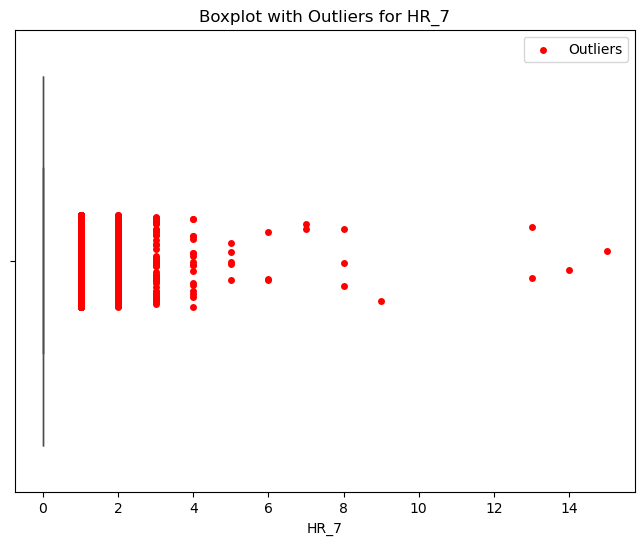

Column: HR_8 - Number of Outliers: 2954
Column: HR_8 - % of Outliers: 9.26% 



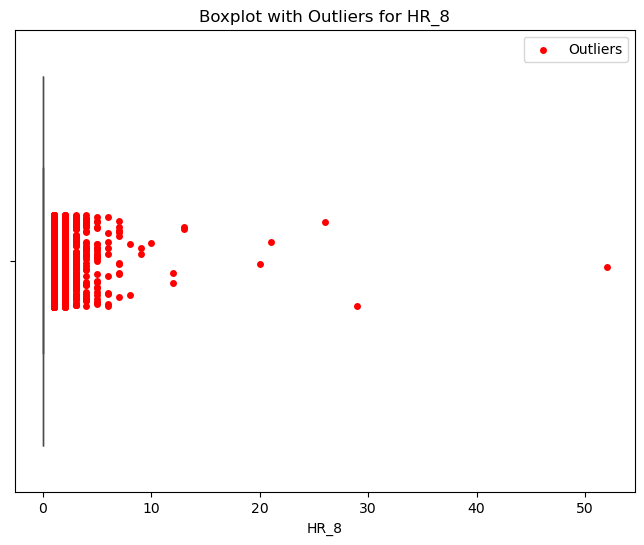

Column: HR_9 - Number of Outliers: 4925
Column: HR_9 - % of Outliers: 15.44% 



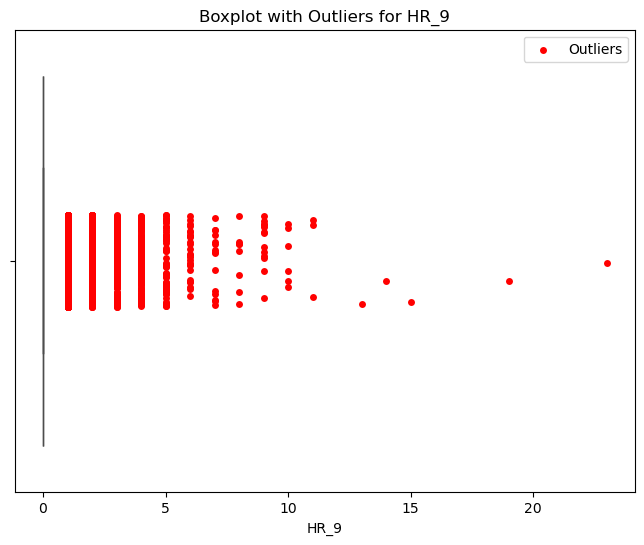

Column: HR_10 - Number of Outliers: 6599
Column: HR_10 - % of Outliers: 20.69% 



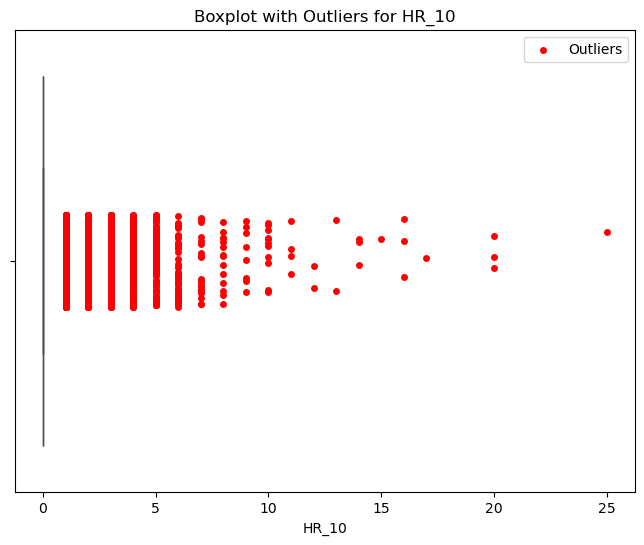

Column: HR_11 - Number of Outliers: 7532
Column: HR_11 - % of Outliers: 23.62% 



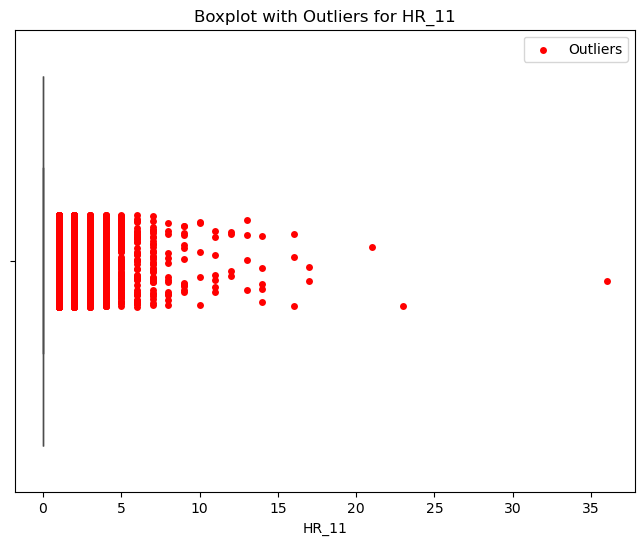

Column: HR_12 - Number of Outliers: 6498
Column: HR_12 - % of Outliers: 20.38% 



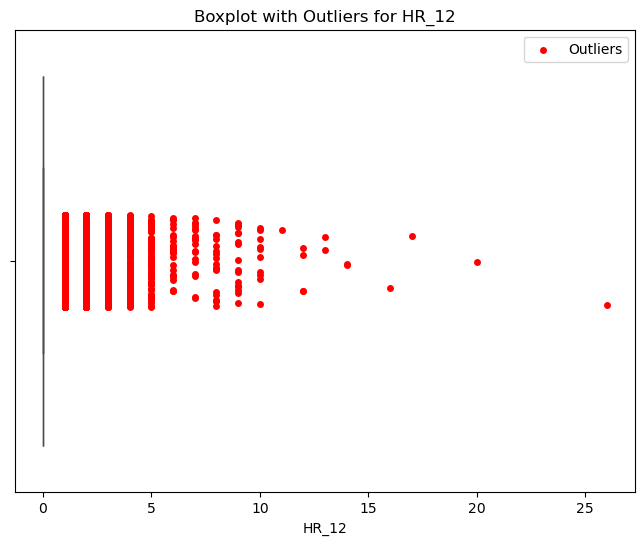

Column: HR_13 - Number of Outliers: 5457
Column: HR_13 - % of Outliers: 17.11% 



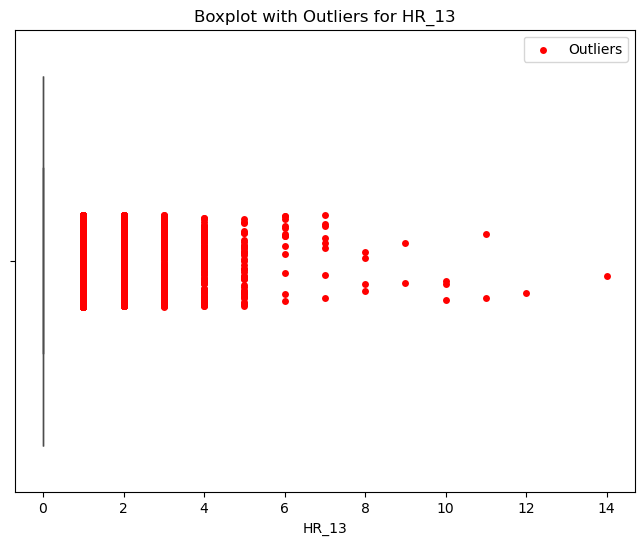

Column: HR_14 - Number of Outliers: 5105
Column: HR_14 - % of Outliers: 16.01% 



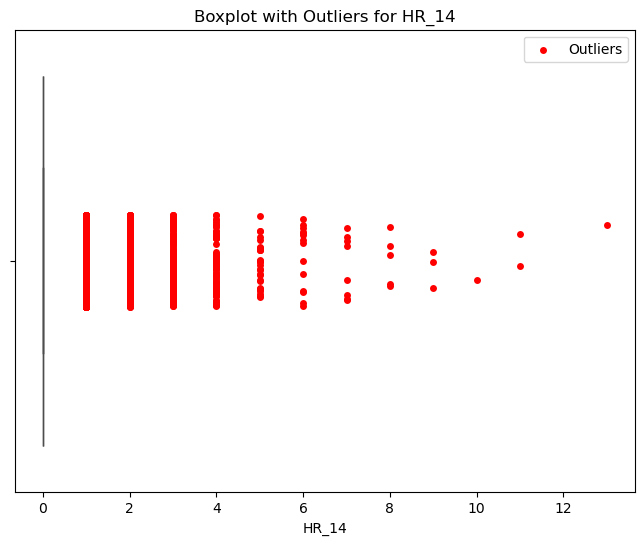

Column: HR_15 - Number of Outliers: 6039
Column: HR_15 - % of Outliers: 18.94% 



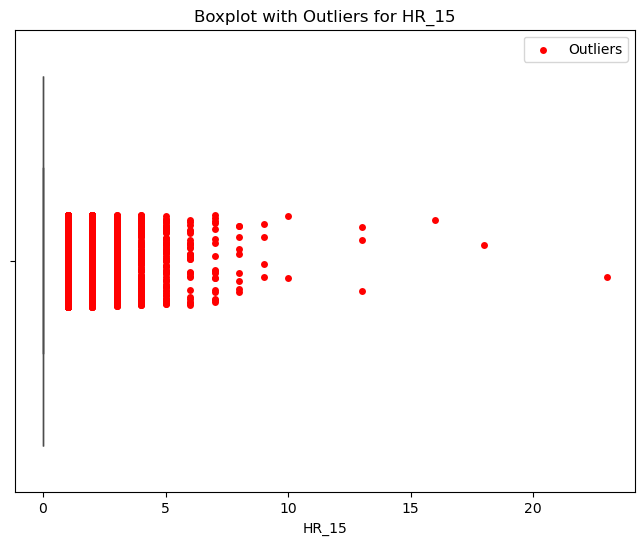

Column: HR_16 - Number of Outliers: 7143
Column: HR_16 - % of Outliers: 22.40% 



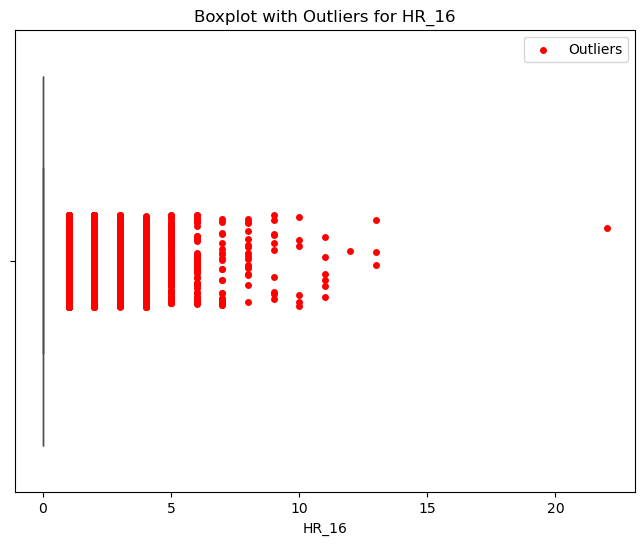

Column: HR_17 - Number of Outliers: 7616
Column: HR_17 - % of Outliers: 23.88% 



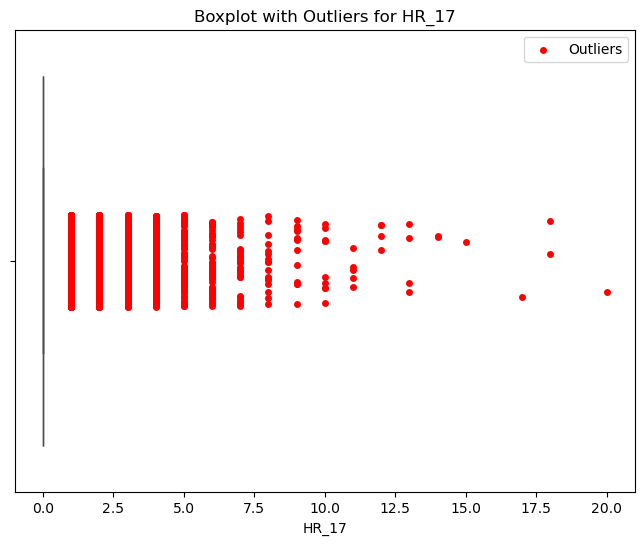

Column: HR_18 - Number of Outliers: 6691
Column: HR_18 - % of Outliers: 20.98% 



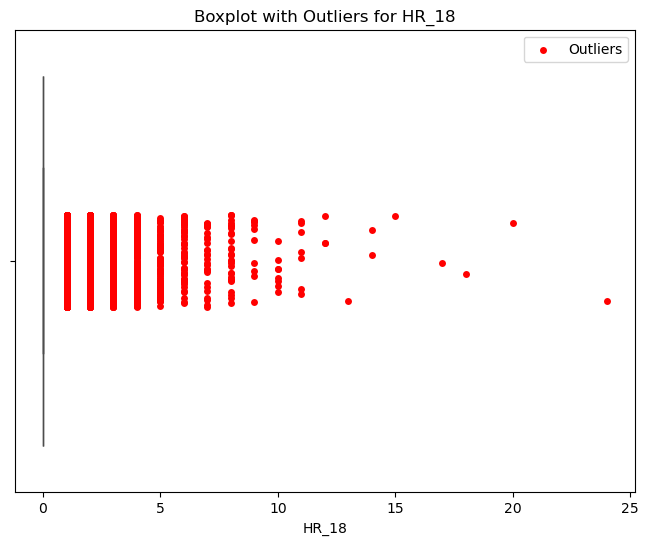

Column: HR_19 - Number of Outliers: 4892
Column: HR_19 - % of Outliers: 15.34% 



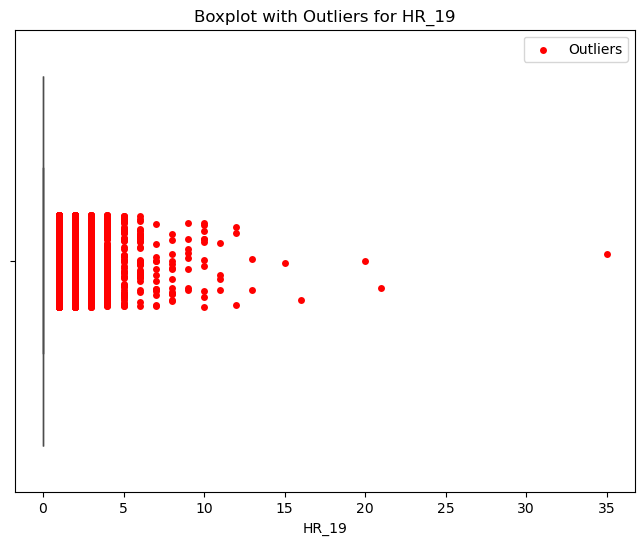

Column: HR_20 - Number of Outliers: 3068
Column: HR_20 - % of Outliers: 9.62% 



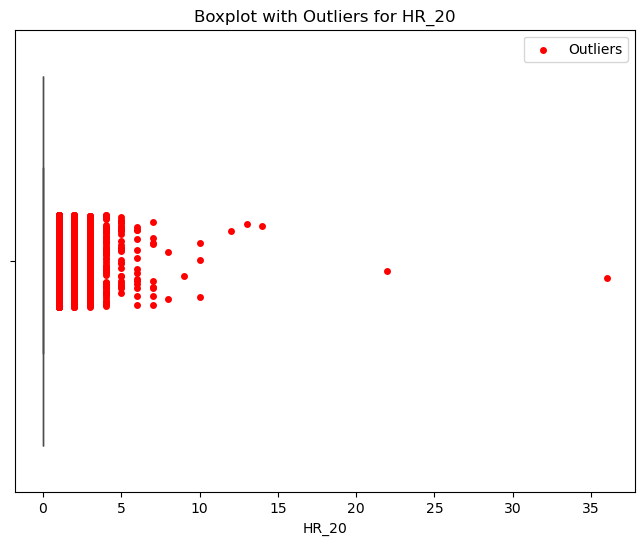

Column: HR_21 - Number of Outliers: 1760
Column: HR_21 - % of Outliers: 5.52% 



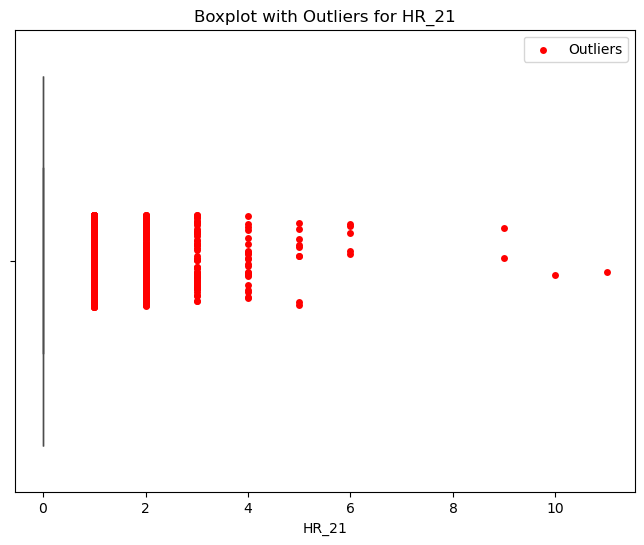

Column: HR_22 - Number of Outliers: 1181
Column: HR_22 - % of Outliers: 3.70% 



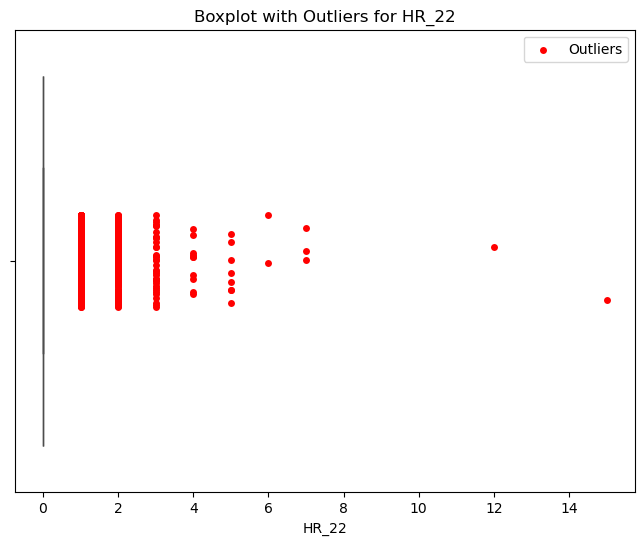

Column: HR_23 - Number of Outliers: 1124
Column: HR_23 - % of Outliers: 3.52% 



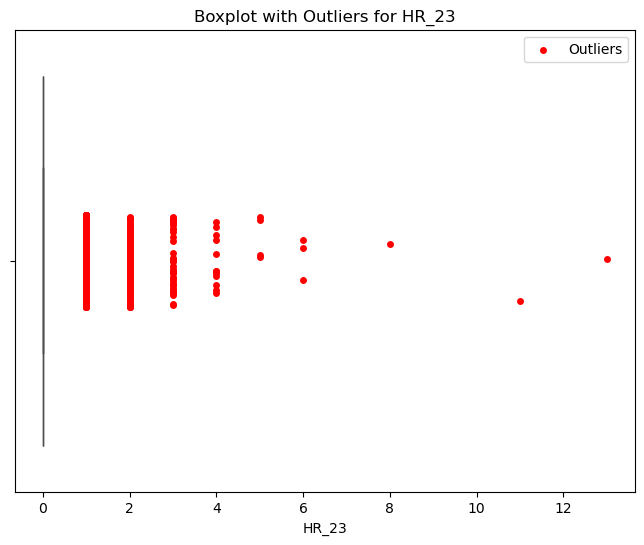

Column: total_spending - Number of Outliers: 2621
Column: total_spending - % of Outliers: 8.22% 



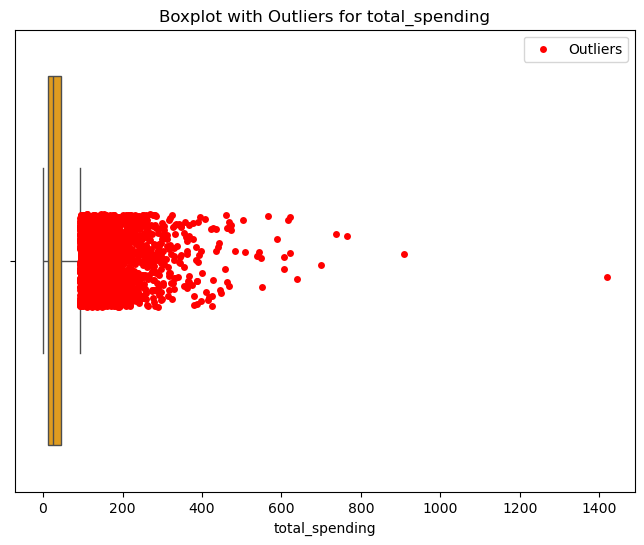

Column: avg_spending_per_cuisine - Number of Outliers: 1470
Column: avg_spending_per_cuisine - % of Outliers: 4.61% 



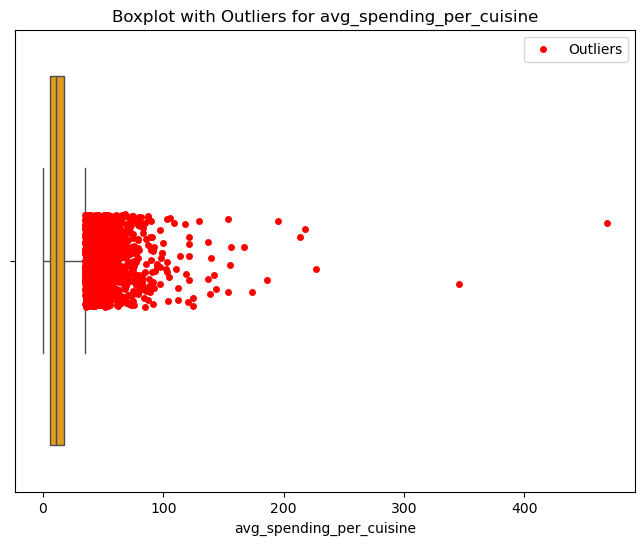

Column: order_activity_duration - Number of Outliers: 0
Column: order_activity_duration - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


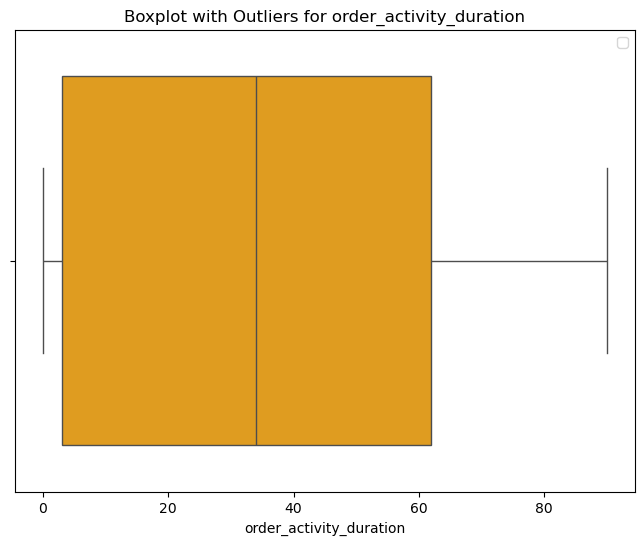

Column: order_frequency - Number of Outliers: 640
Column: order_frequency - % of Outliers: 2.01% 



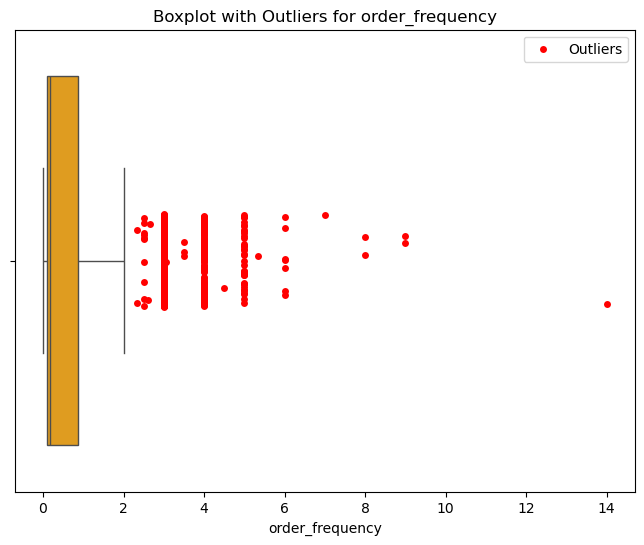

Column: cuisine_diversity - Number of Outliers: 662
Column: cuisine_diversity - % of Outliers: 2.08% 



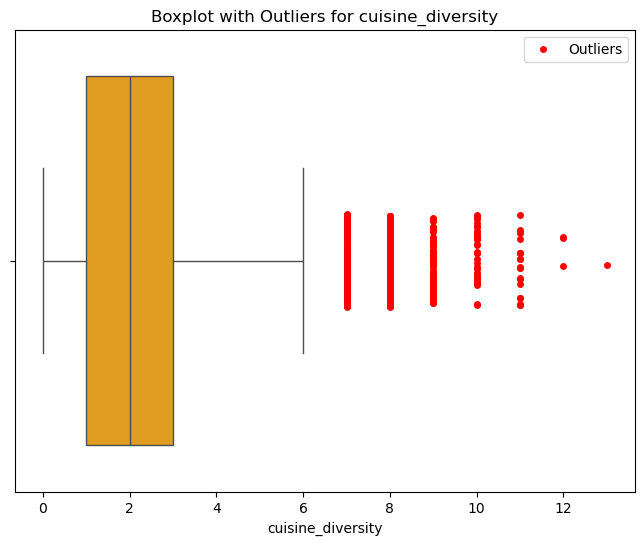

Column: peak_order_hour - Number of Outliers: 0
Column: peak_order_hour - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


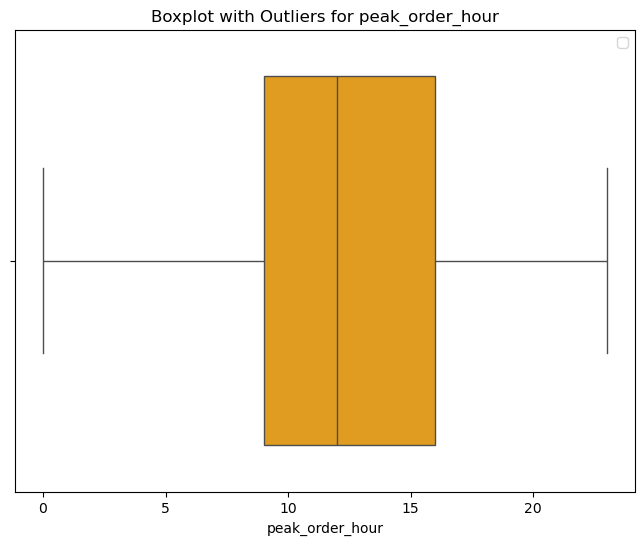

Column: peak_order_day - Number of Outliers: 0
Column: peak_order_day - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


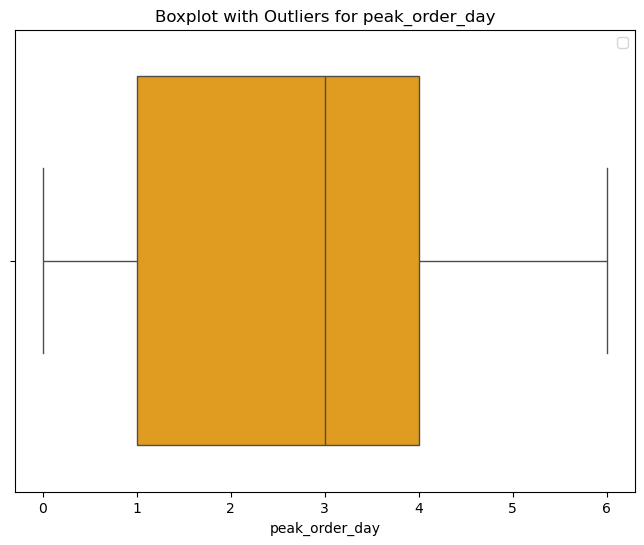

Column: CUI_American_ratio - Number of Outliers: 4390
Column: CUI_American_ratio - % of Outliers: 13.77% 



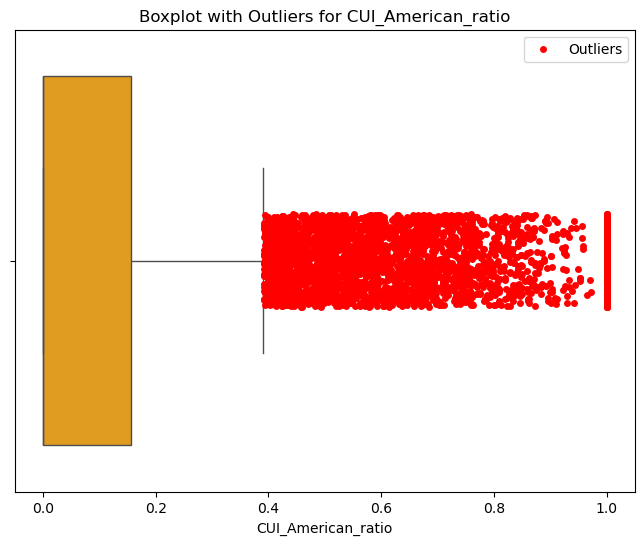

Column: CUI_Asian_ratio - Number of Outliers: 3228
Column: CUI_Asian_ratio - % of Outliers: 10.12% 



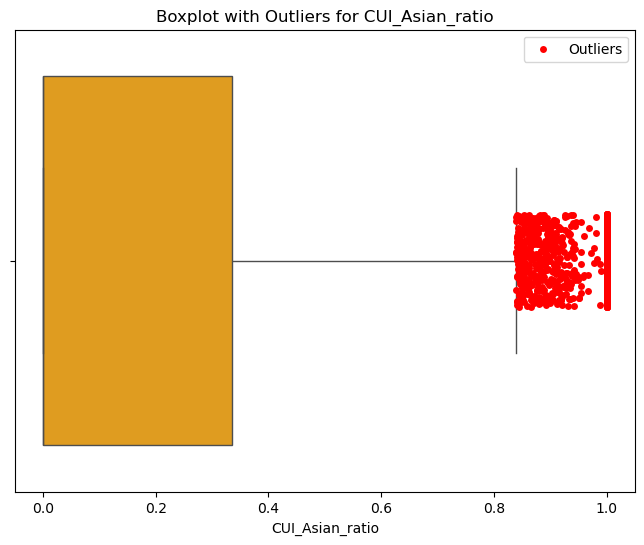

Column: CUI_Beverages_ratio - Number of Outliers: 5435
Column: CUI_Beverages_ratio - % of Outliers: 17.04% 



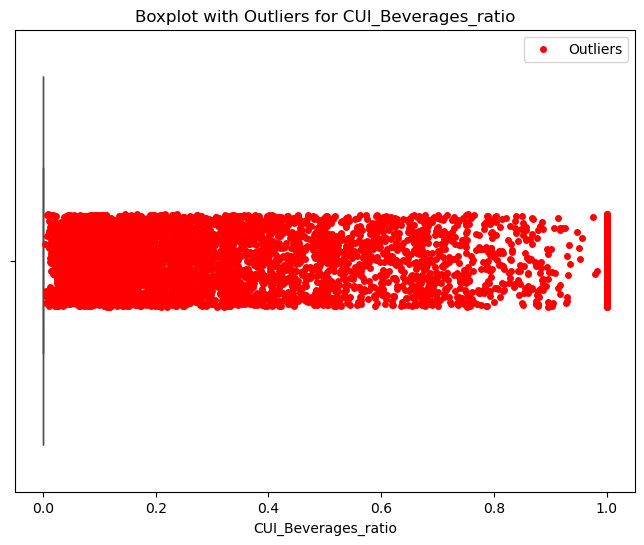

Column: CUI_Cafe_ratio - Number of Outliers: 1366
Column: CUI_Cafe_ratio - % of Outliers: 4.28% 



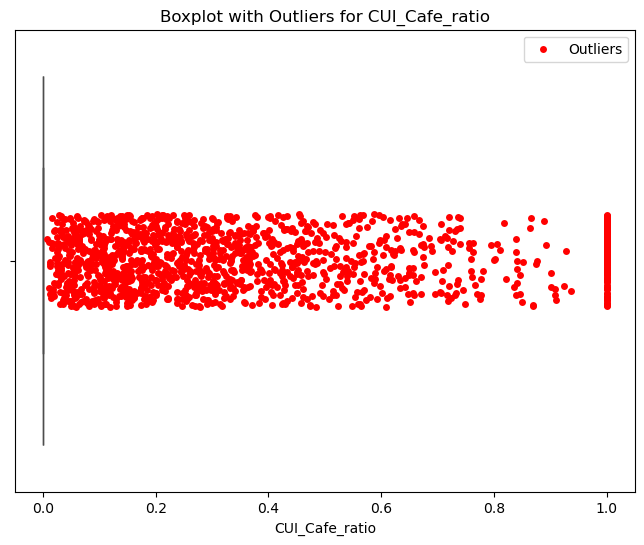

Column: CUI_Chicken Dishes_ratio - Number of Outliers: 3248
Column: CUI_Chicken Dishes_ratio - % of Outliers: 10.19% 



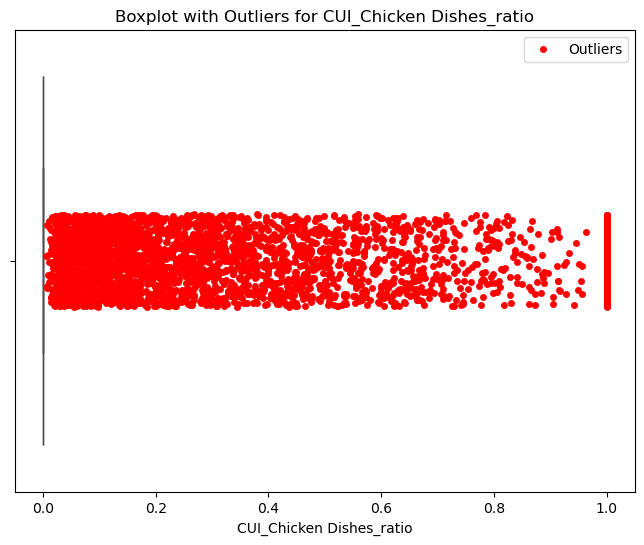

Column: CUI_Chinese_ratio - Number of Outliers: 3522
Column: CUI_Chinese_ratio - % of Outliers: 11.04% 



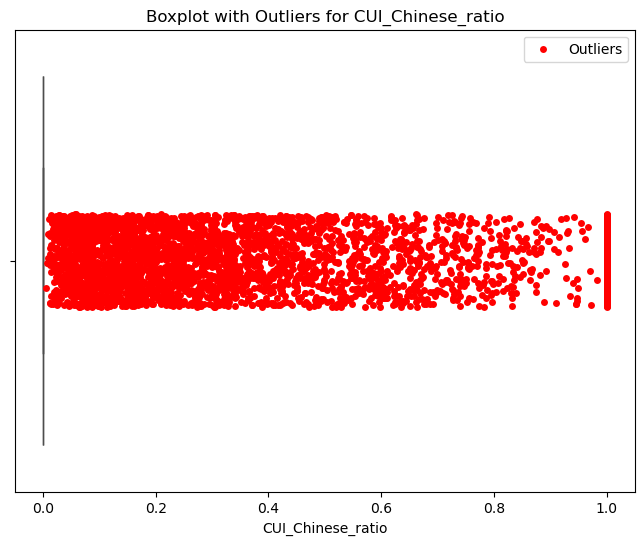

Column: CUI_Desserts_ratio - Number of Outliers: 2016
Column: CUI_Desserts_ratio - % of Outliers: 6.32% 



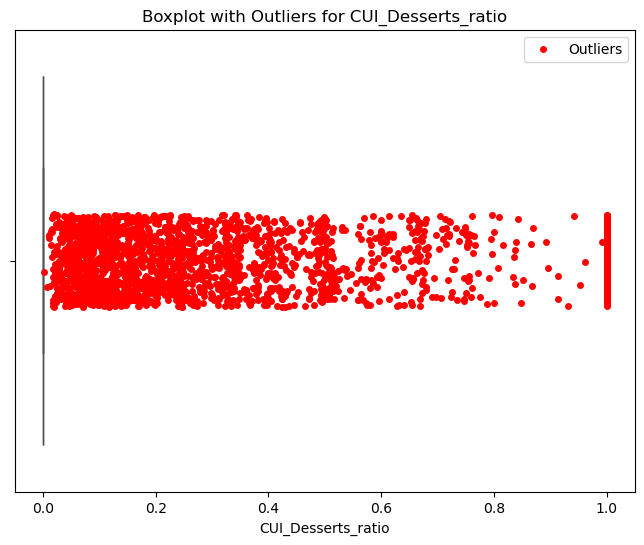

Column: CUI_Healthy_ratio - Number of Outliers: 2169
Column: CUI_Healthy_ratio - % of Outliers: 6.80% 



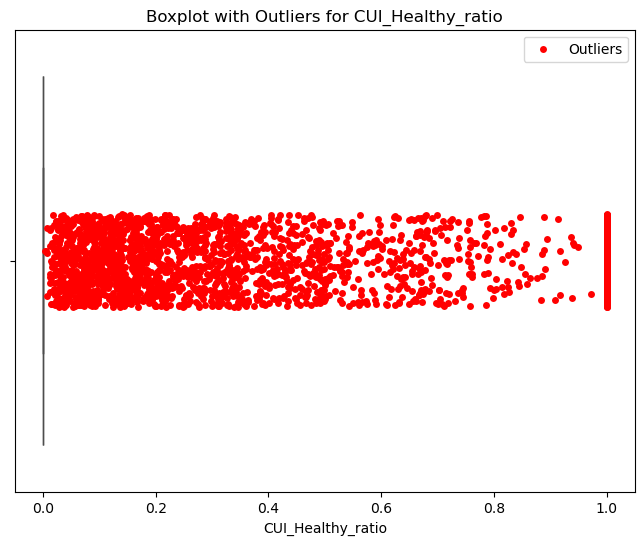

Column: CUI_Indian_ratio - Number of Outliers: 3448
Column: CUI_Indian_ratio - % of Outliers: 10.81% 



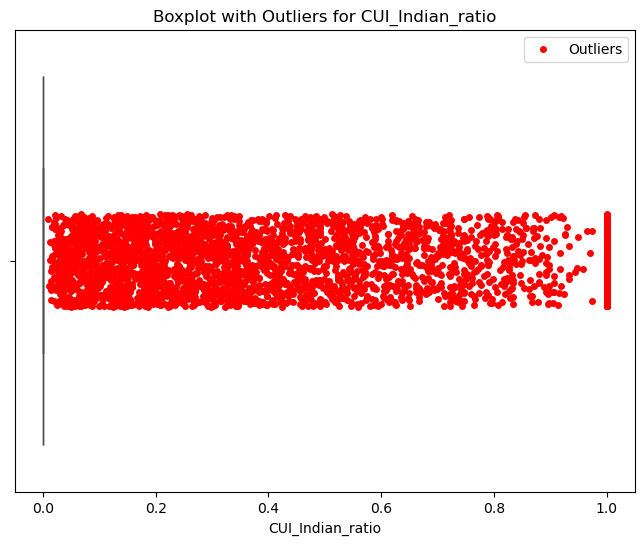

Column: CUI_Italian_ratio - Number of Outliers: 6448
Column: CUI_Italian_ratio - % of Outliers: 20.22% 



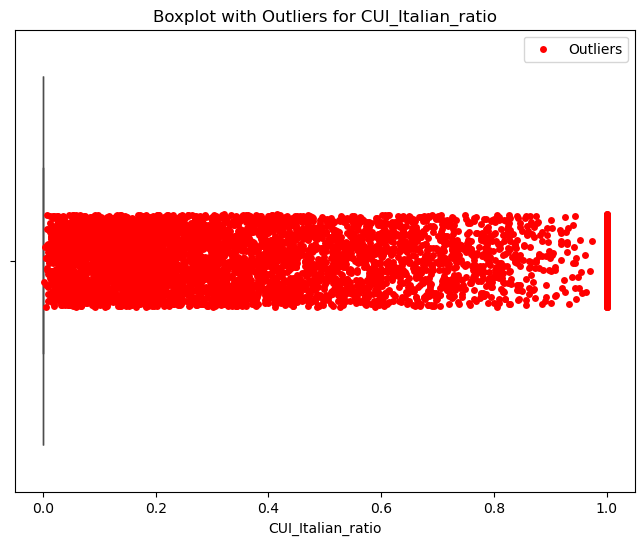

Column: CUI_Japanese_ratio - Number of Outliers: 6301
Column: CUI_Japanese_ratio - % of Outliers: 19.76% 



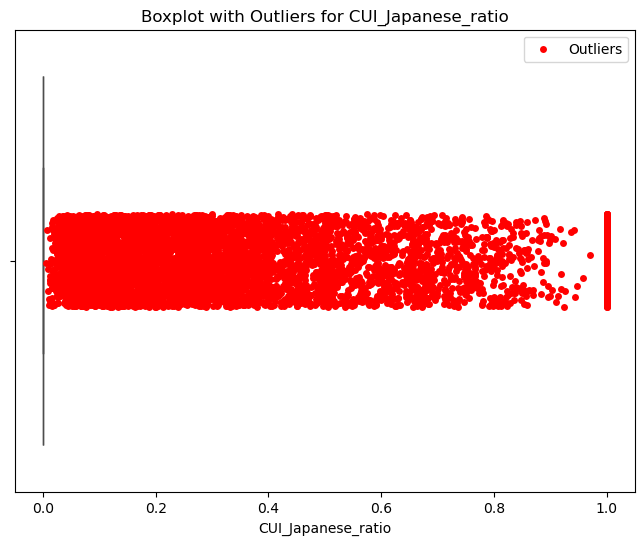

Column: CUI_Noodle Dishes_ratio - Number of Outliers: 2226
Column: CUI_Noodle Dishes_ratio - % of Outliers: 6.98% 



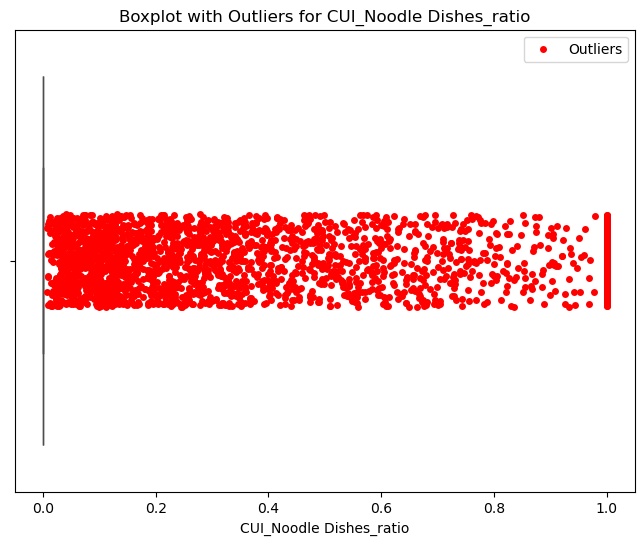

Column: CUI_OTHER_ratio - Number of Outliers: 7041
Column: CUI_OTHER_ratio - % of Outliers: 22.08% 



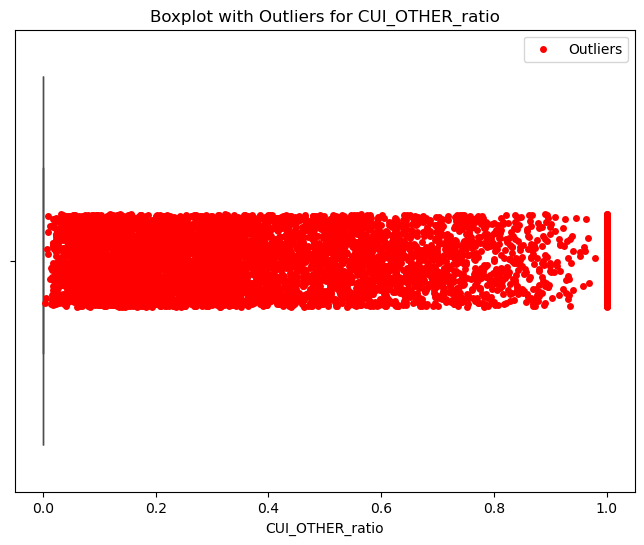

Column: CUI_Street Food / Snacks_ratio - Number of Outliers: 4249
Column: CUI_Street Food / Snacks_ratio - % of Outliers: 13.32% 



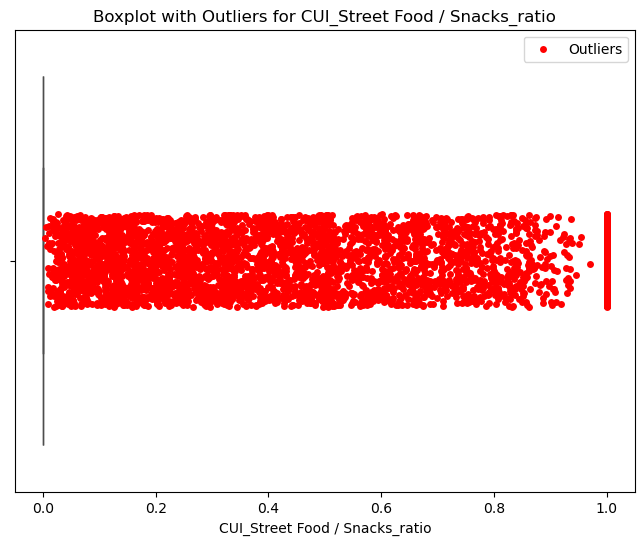

Column: CUI_Thai_ratio - Number of Outliers: 2378
Column: CUI_Thai_ratio - % of Outliers: 7.46% 



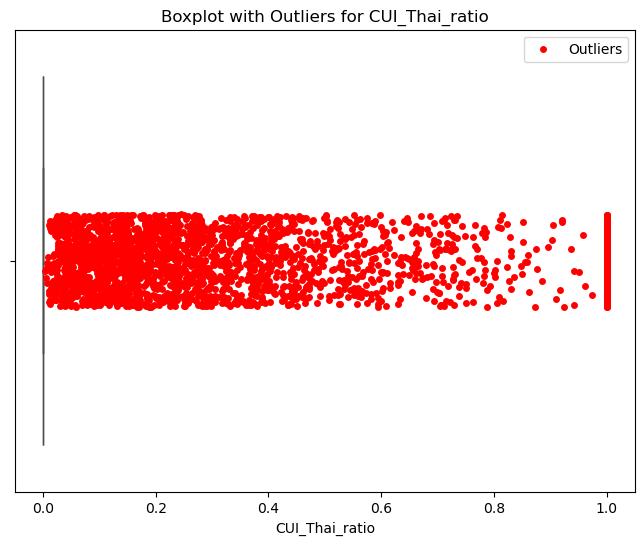

Column: highest_spending_hour - Number of Outliers: 0
Column: highest_spending_hour - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


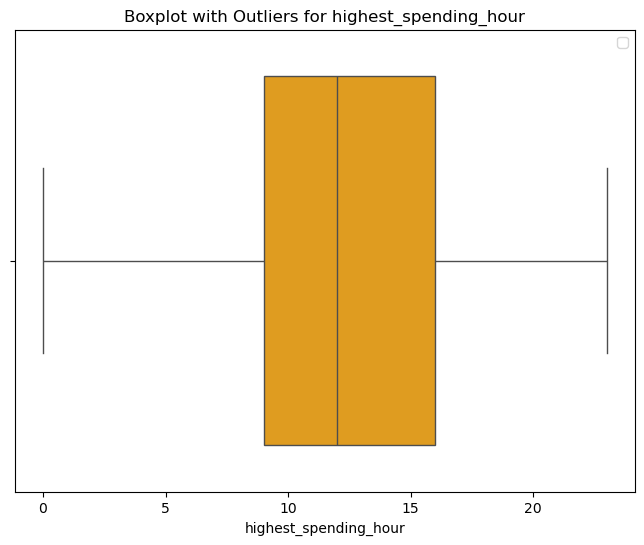

Column: spending_per_order - Number of Outliers: 156
Column: spending_per_order - % of Outliers: 0.49% 



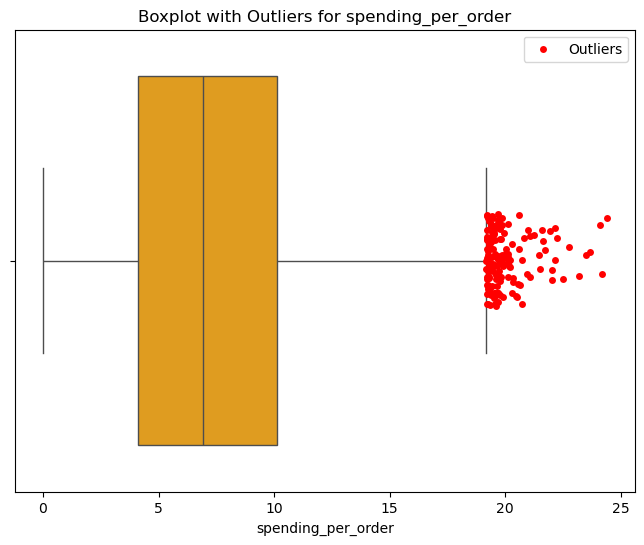

Column: spending_std - Number of Outliers: 2454
Column: spending_std - % of Outliers: 7.70% 



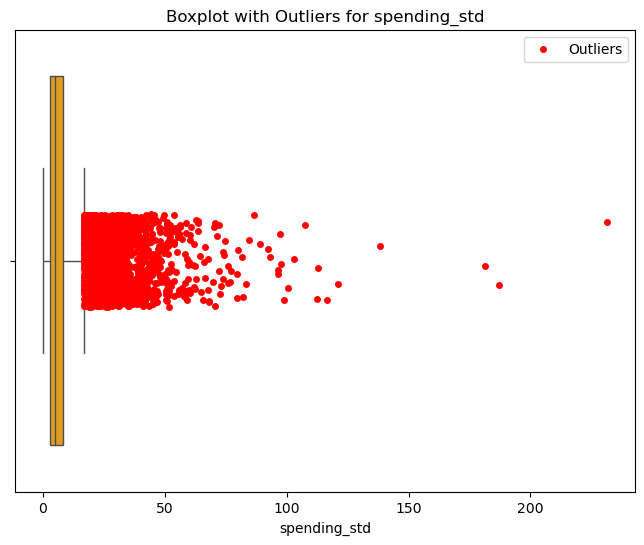

Column: max_cuisine_spending_ratio - Number of Outliers: 0
Column: max_cuisine_spending_ratio - % of Outliers: 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


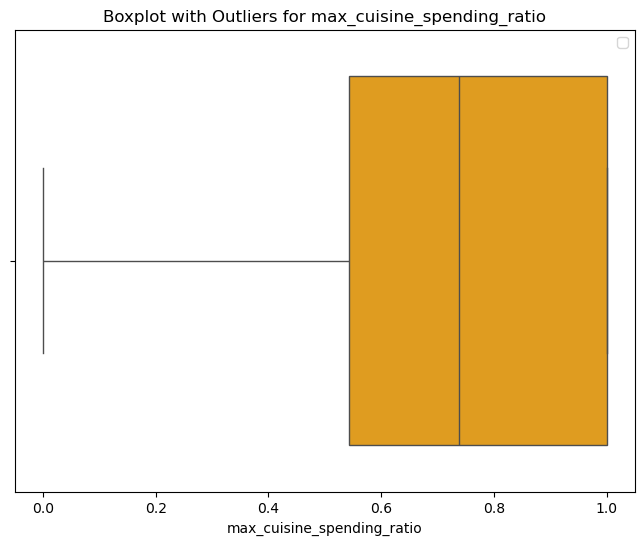

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: inactive_days - Number of Outliers: 0
Column: inactive_days - % of Outliers: 0.00% 



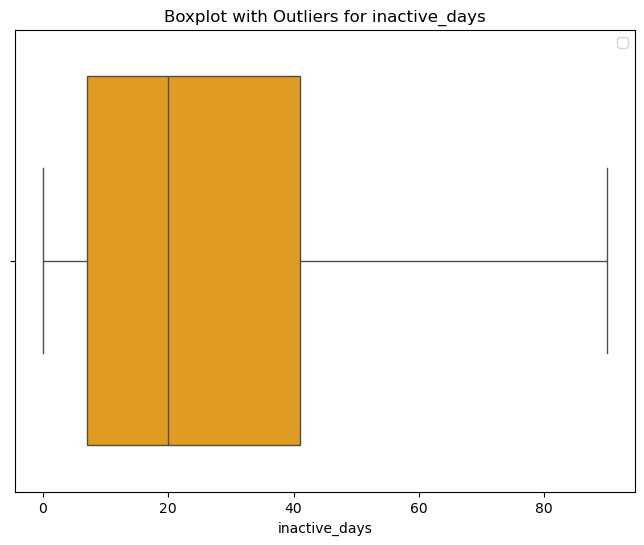

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: top_cuisine_ratio - Number of Outliers: 0
Column: top_cuisine_ratio - % of Outliers: 0.00% 



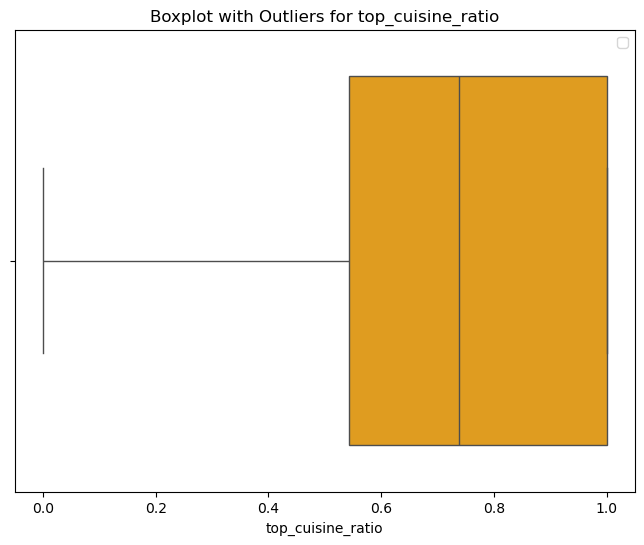

Column: weekend_spending - Number of Outliers: 1091
Column: weekend_spending - % of Outliers: 3.42% 



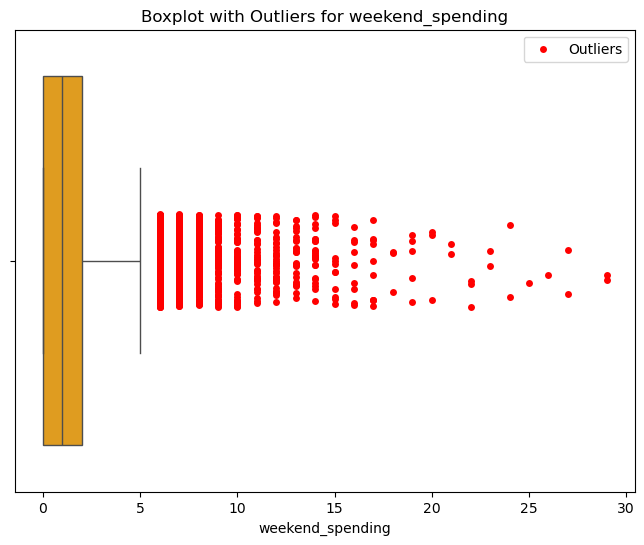

Column: weekday_spending - Number of Outliers: 2093
Column: weekday_spending - % of Outliers: 6.56% 



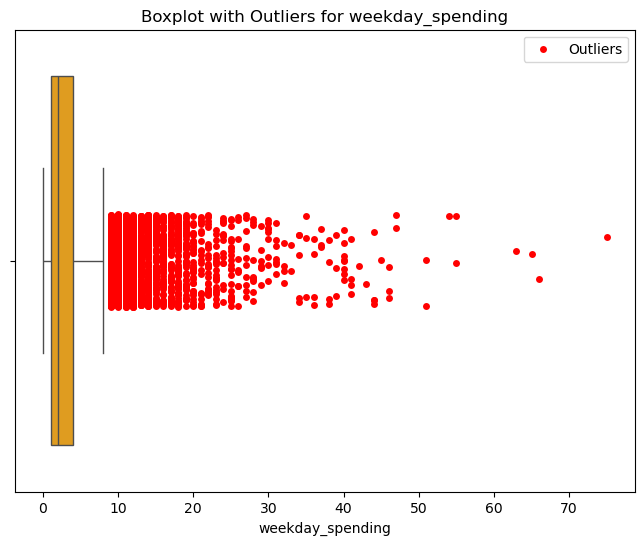

Column: weekend_spending_ratio - Number of Outliers: 1781
Column: weekend_spending_ratio - % of Outliers: 5.59% 



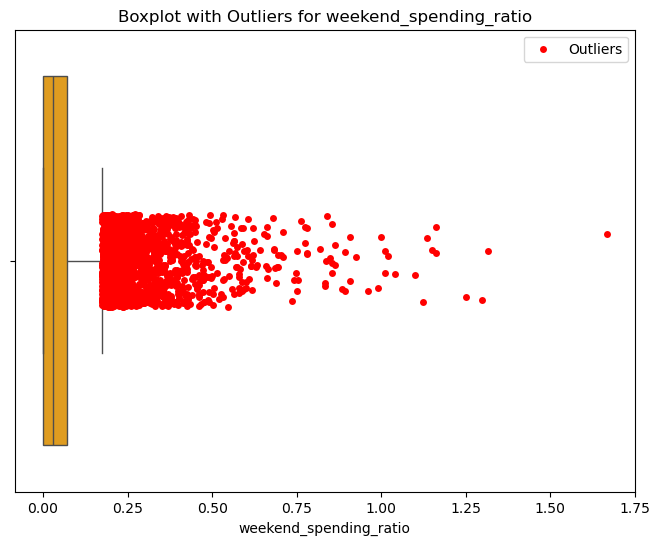

Column: products_per_vendor - Number of Outliers: 1757
Column: products_per_vendor - % of Outliers: 5.51% 



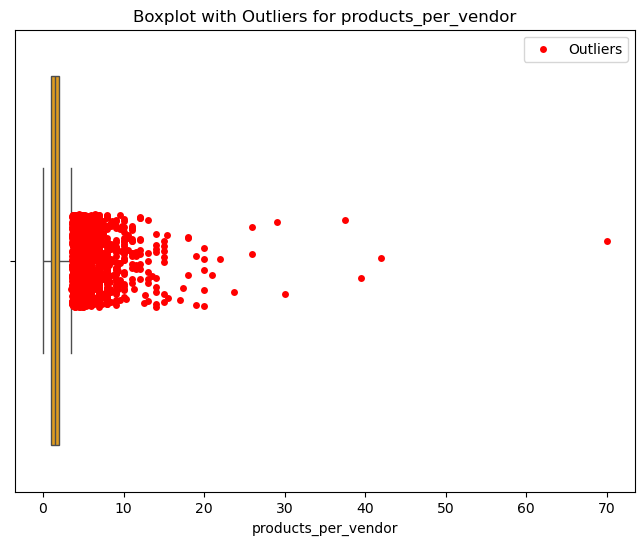

Column: age_spending_interaction - Number of Outliers: 2585
Column: age_spending_interaction - % of Outliers: 8.11% 



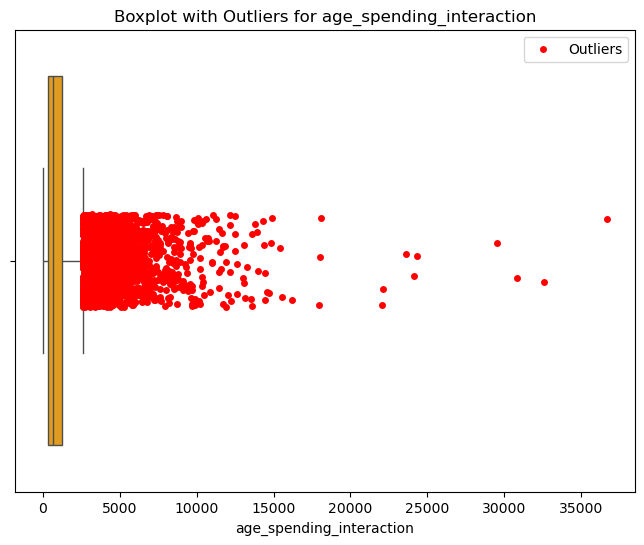

Columns with more than 0.0001% Outliers:
['customer_age', 'vendor_count', 'product_count', 'is_chain', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_spending', 'avg_spending_per_cuisine', 'order_frequency', 'cuisine_diversity', 'CUI_American_ratio', 'CUI_Asian_ratio', 'CUI_Beverages_ratio', 'CUI_Cafe_ratio', 'CUI_Chicken Dishes_ratio', 'CUI_Chinese_ratio', 'CUI_Desserts_ratio', 'CUI_Healthy_ratio', 'CUI_Indian_ratio', 'CUI_Italian_ratio', 'CUI_Japanese_ratio', 'CUI_Noodle Dishes_ratio', 'CUI_OTHER_ratio', 'CUI_Street Food / Sna

{'customer_age': {'lower_bound': 8.5, 'upper_bound': 44.5},
 'vendor_count': {'lower_bound': -3.5, 'upper_bound': 8.5},
 'product_count': {'lower_bound': -5.5, 'upper_bound': 14.5},
 'is_chain': {'lower_bound': -2.0, 'upper_bound': 6.0},
 'first_order': {'lower_bound': -50.0, 'upper_bound': 102.0},
 'last_order': {'lower_bound': -2.0, 'upper_bound': 134.0},
 'CUI_American': {'lower_bound': -8.49, 'upper_bound': 14.15},
 'CUI_Asian': {'lower_bound': -17.745, 'upper_bound': 29.575000000000003},
 'CUI_Beverages': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'CUI_Cafe': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'CUI_Chicken Dishes': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'CUI_Chinese': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'CUI_Desserts': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'CUI_Healthy': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'CUI_Indian': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'CUI_Italian': {'lower_bound': 0.0, 'upper_bound': 0.0},
 'CUI_Japanese': {'lower_bound':

In [52]:
detect_outliers_iqr(data, 0.0001)

## Outliers Removal

In [53]:
def remove_outliers(data, columns):
    outliers_removed = {}
    
    for column in columns:
        # Skip columns with non-numeric data
        if not pd.api.types.is_numeric_dtype(data[column]):
            print(f"Skipping non-numeric column: {column}")
            continue
        
        # Handle missing values by dropping them temporarily for calculations
        column_data = data[column].dropna()
        
        if column_data.empty:
            print(f"Skipping empty column: {column}")
            continue
        
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before treatment
        initial_outliers = data[(
            data[column] < lower_bound) | (data[column] > upper_bound)
        ].shape[0]
        
        # Outlier treatment based on variable type
        if column in ['customer_age', 'total_spending', 'avg_spending_per_cuisine', 'order_activity_duration', 'order_frequency', 
                      'spending_per_order', 'spending_std', 'max_cuisine_spending_ratio', 'top_cuisine_ratio', 
                      'weekend_spending_ratio', 'region_avg_spending', 'age_spending_interaction']:
            data = data[
                (data[column] >= lower_bound) & 
                (data[column] <= upper_bound)
            ]
        elif column in ['vendor_count', 'product_count', 'cuisine_diversity', 'inactive_days', 'weekend_spending', 'weekday_spending']:
            data[column] = winsorize(data[column].fillna(0), limits=[0.05, 0.05])
        
        # Count outliers after treatment
        final_outliers = data[(
            data[column] < lower_bound) | (data[column] > upper_bound)
        ].shape[0]
        
        # Record outliers removed
        outliers_removed[column] = initial_outliers - final_outliers

    return data, outliers_removed

variables_to_treat = [
    'customer_age', 
    'total_spending', 
    'avg_spending_per_cuisine', 
    'order_activity_duration', 
    'order_frequency',
    'spending_per_order', 
    'spending_std', 
    'max_cuisine_spending_ratio',
    'top_cuisine_ratio', 
    'weekend_spending_ratio', 
    'region_avg_spending', 
    'age_spending_interaction',
    'vendor_count',
    'product_count', 
    'cuisine_diversity',
    'inactive_days', 
    'weekend_spending', 
    'weekday_spending'
]

# Apply the function
data_cleaned, outliers_summary = remove_outliers(data, variables_to_treat)

# Print the results
for var, count in outliers_summary.items():
    print(f"{var}: {count} outliers removed")

Skipping non-numeric column: region_avg_spending
customer_age: 1653 outliers removed
total_spending: 2477 outliers removed
avg_spending_per_cuisine: 1294 outliers removed
order_activity_duration: 0 outliers removed
order_frequency: 357 outliers removed
spending_per_order: 563 outliers removed
spending_std: 947 outliers removed
max_cuisine_spending_ratio: 0 outliers removed
top_cuisine_ratio: 0 outliers removed
weekend_spending_ratio: 1190 outliers removed
age_spending_interaction: 935 outliers removed
vendor_count: 992 outliers removed
product_count: 0 outliers removed
cuisine_diversity: 223 outliers removed
inactive_days: 0 outliers removed
weekend_spending: 0 outliers removed
weekday_spending: 1077 outliers removed


Column: customer_age - Number of Outliers (After Treatment): 245
Column: customer_age - % of Outliers (After Treatment): 1.09% 



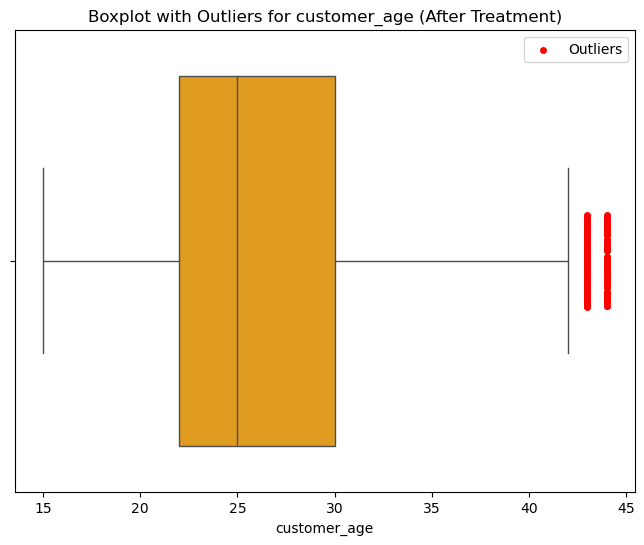

Column: total_spending - Number of Outliers (After Treatment): 567
Column: total_spending - % of Outliers (After Treatment): 2.53% 



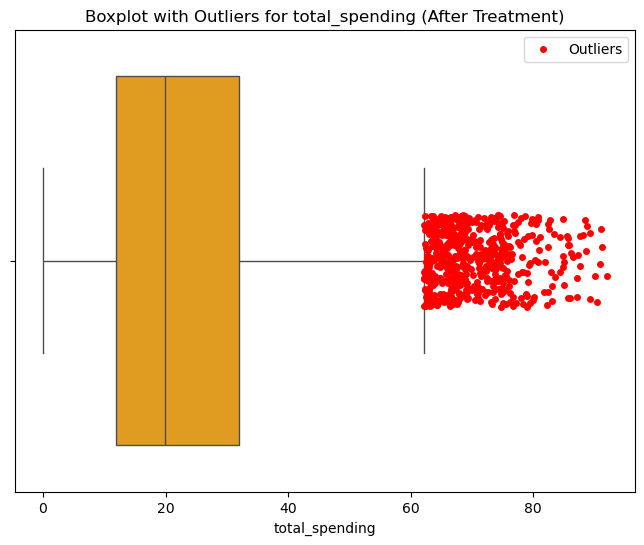

Column: avg_spending_per_cuisine - Number of Outliers (After Treatment): 689
Column: avg_spending_per_cuisine - % of Outliers (After Treatment): 3.08% 



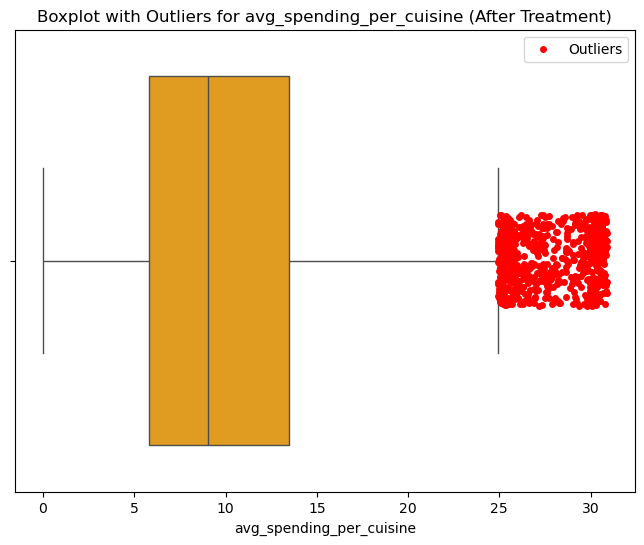

Column: order_activity_duration - Number of Outliers (After Treatment): 0
Column: order_activity_duration - % of Outliers (After Treatment): 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


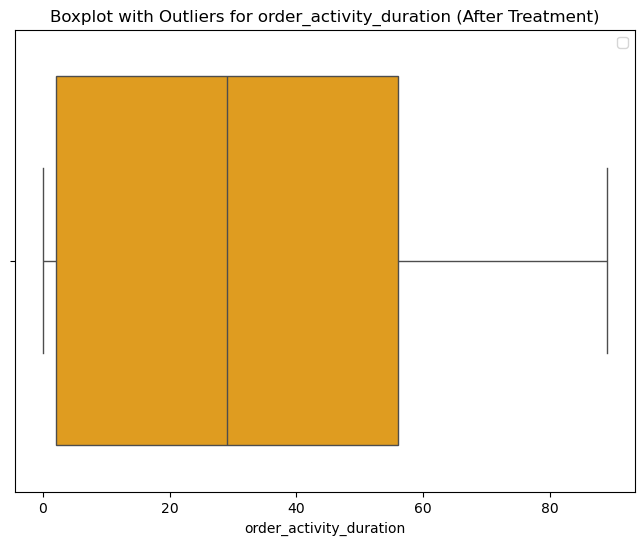

Column: order_frequency - Number of Outliers (After Treatment): 0
Column: order_frequency - % of Outliers (After Treatment): 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


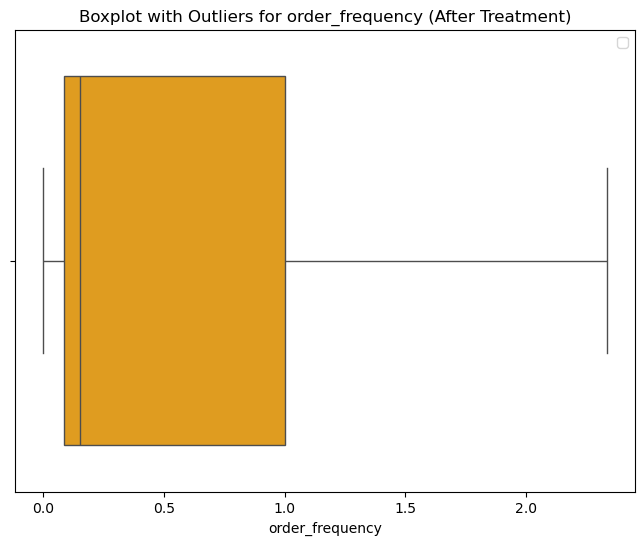

Column: spending_per_order - Number of Outliers (After Treatment): 246
Column: spending_per_order - % of Outliers (After Treatment): 1.10% 



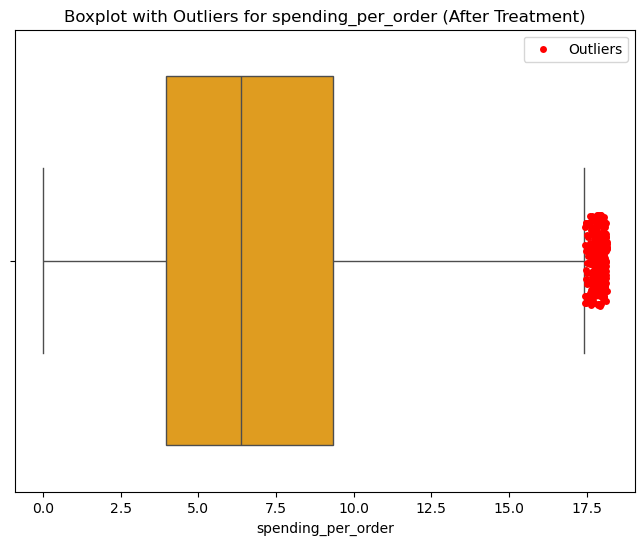

Column: spending_std - Number of Outliers (After Treatment): 266
Column: spending_std - % of Outliers (After Treatment): 1.19% 



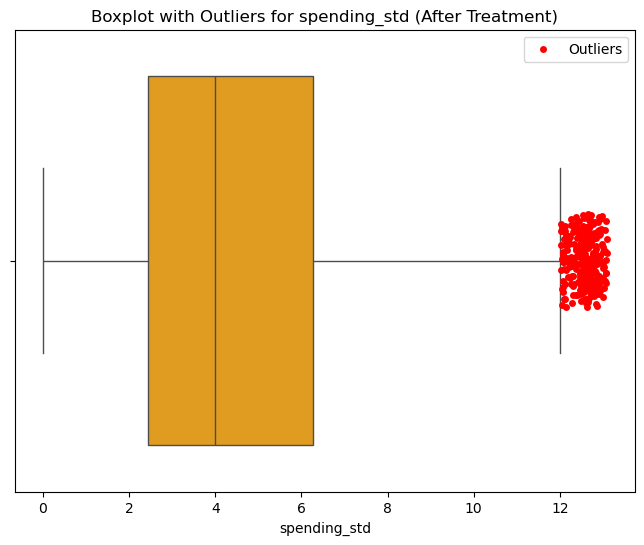

Column: max_cuisine_spending_ratio - Number of Outliers (After Treatment): 0
Column: max_cuisine_spending_ratio - % of Outliers (After Treatment): 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


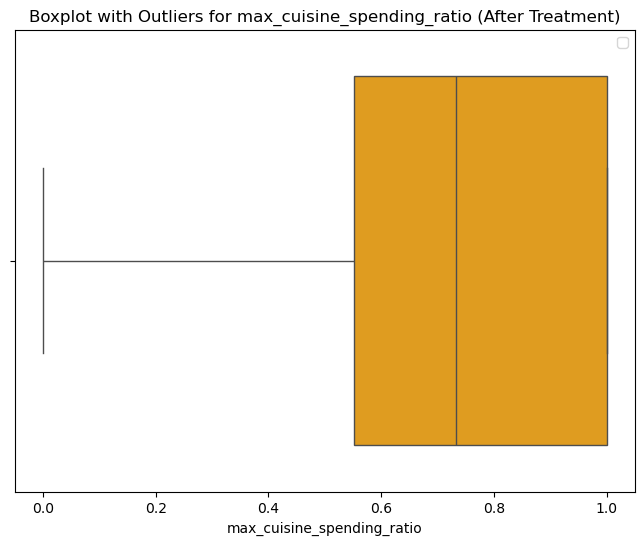

Column: top_cuisine_ratio - Number of Outliers (After Treatment): 0
Column: top_cuisine_ratio - % of Outliers (After Treatment): 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


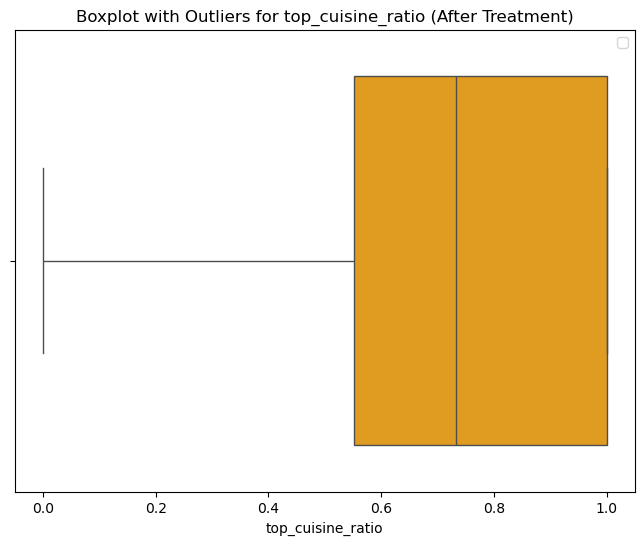

Column: weekend_spending_ratio - Number of Outliers (After Treatment): 306
Column: weekend_spending_ratio - % of Outliers (After Treatment): 1.37% 



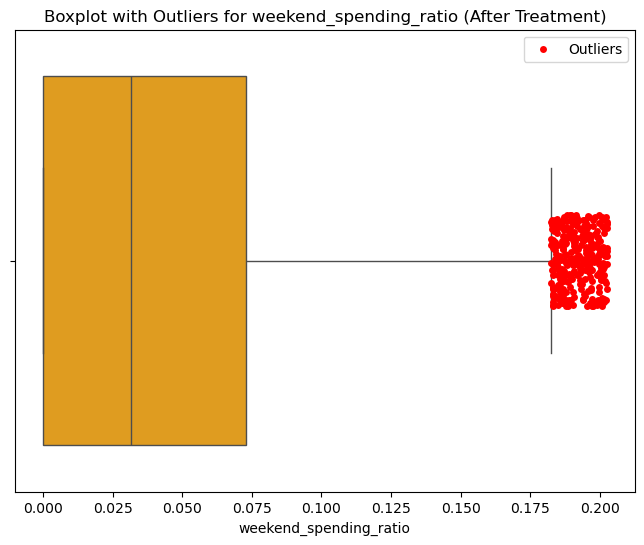

Skipping non-numeric column: region_avg_spending
Column: age_spending_interaction - Number of Outliers (After Treatment): 324
Column: age_spending_interaction - % of Outliers (After Treatment): 1.45% 



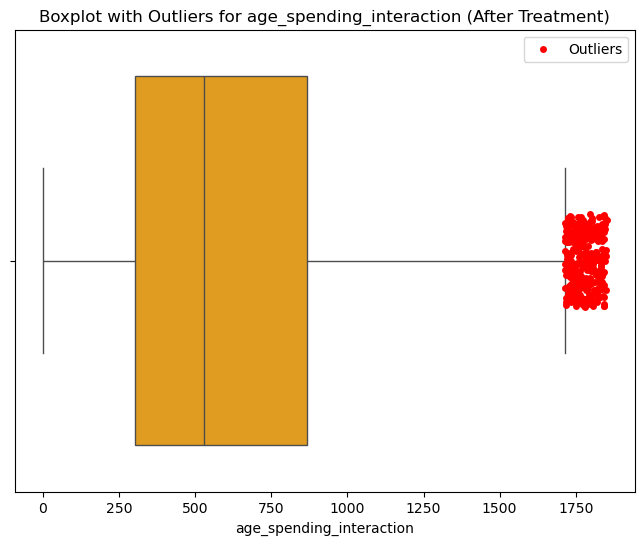

Column: vendor_count - Number of Outliers (After Treatment): 0
Column: vendor_count - % of Outliers (After Treatment): 0.00% 



c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


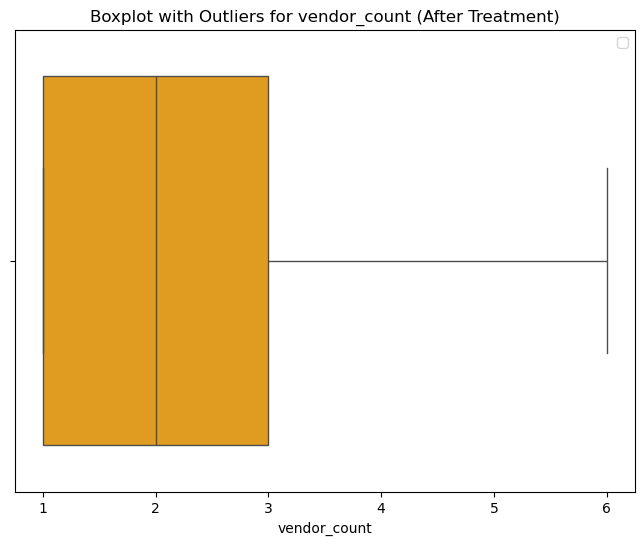

c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Column: product_count - Number of Outliers (After Treatment): 1469
Column: product_count - % of Outliers (After Treatment): 6.56% 



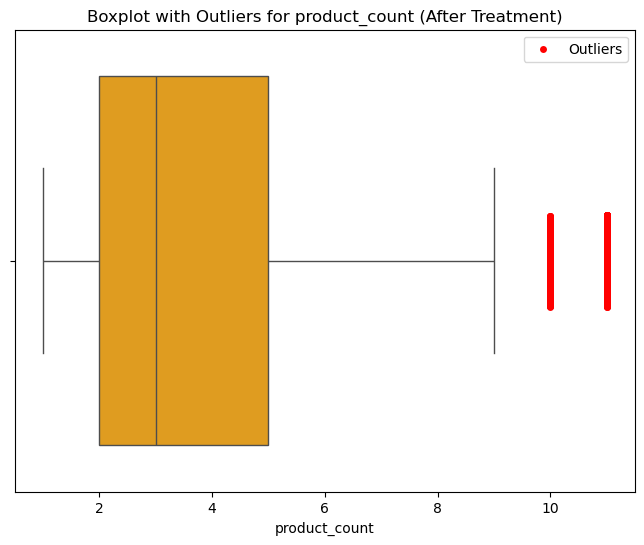

c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: cuisine_diversity - Number of Outliers (After Treatment): 0
Column: cuisine_diversity - % of Outliers (After Treatment): 0.00% 



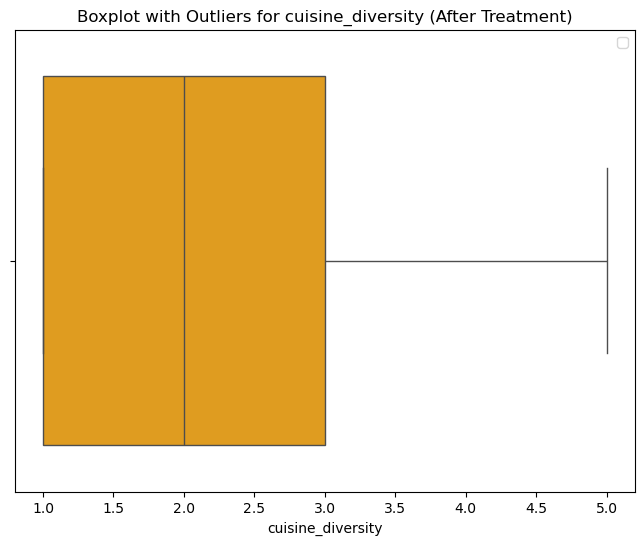

c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column: inactive_days - Number of Outliers (After Treatment): 0
Column: inactive_days - % of Outliers (After Treatment): 0.00% 



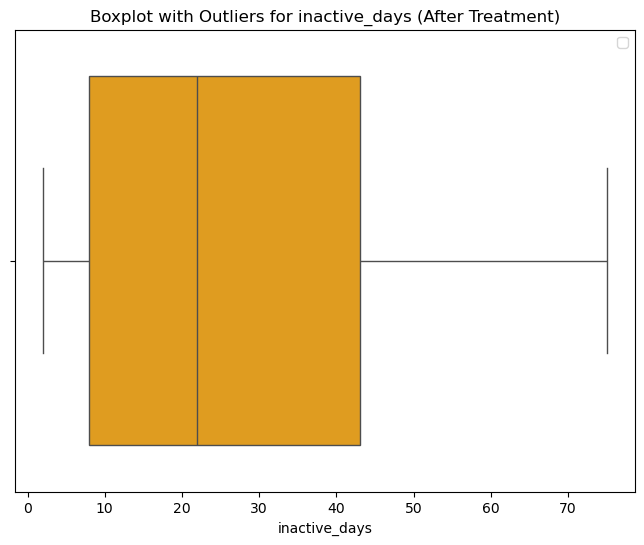

c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Column: weekend_spending - Number of Outliers (After Treatment): 2170
Column: weekend_spending - % of Outliers (After Treatment): 9.70% 



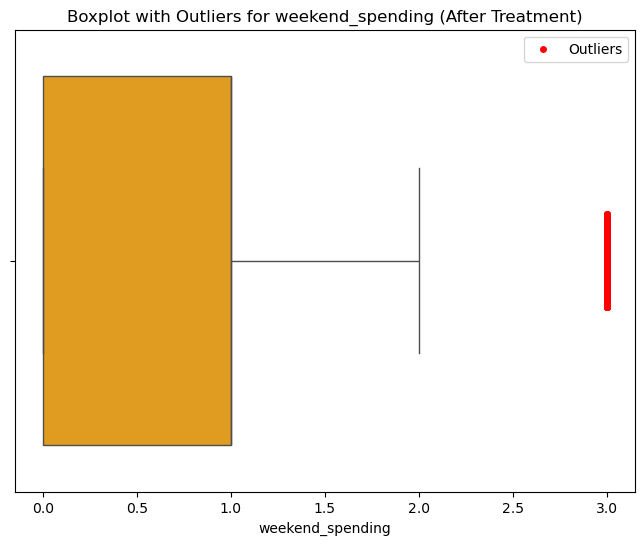

c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\gonca\anaconda3\envs\DM2425\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Column: weekday_spending - Number of Outliers (After Treatment): 0
Column: weekday_spending - % of Outliers (After Treatment): 0.00% 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


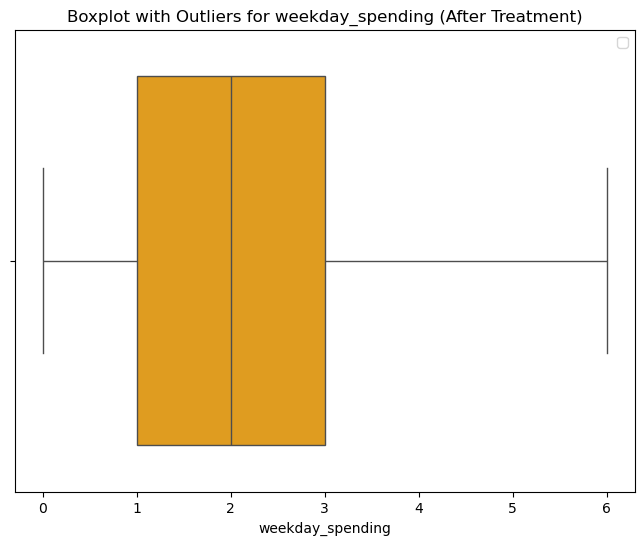

Columns with more than 5% Outliers After Treatment:
['product_count', 'weekend_spending']


In [54]:
def check_outliers_after_treatment(df, treated_df, variables, missing_threshold):
    bounds = {}
    missing_col = []
    
    for column in variables:
        # Skip columns with non-numeric data
        if not pd.api.types.is_numeric_dtype(treated_df[column]):
            print(f"Skipping non-numeric column: {column}")
            continue

        # Handle missing values by dropping them temporarily for calculations
        column_data = treated_df[column].dropna()

        if column_data.empty:
            print(f"Skipping empty column: {column}")
            continue
        
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[column] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

        outlier_data = treated_df[(treated_df[column] < lower_bound) | (treated_df[column] > upper_bound)]
        missing = len(outlier_data) / len(treated_df) * 100
        
        print(f'Column: {column} - Number of Outliers (After Treatment): {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers (After Treatment): {missing:.2f}% \n')
        
        if missing > missing_threshold:
            missing_col.append(column)

        # Plot boxplot and outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=treated_df, x=column, color='orange', showfliers=False)
        sns.stripplot(data=outlier_data, x=column, color='red', jitter=True, label='Outliers')
        plt.title(f'Boxplot with Outliers for {column} (After Treatment)')
        plt.legend()
        plt.show()
    
    print(f'Columns with more than {missing_threshold}% Outliers After Treatment:')
    print(missing_col)
    
    return bounds

# Updated variables to check based on the cleaned dataset
variables_to_check = [
    'customer_age', 
    'total_spending', 
    'avg_spending_per_cuisine', 
    'order_activity_duration', 
    'order_frequency',
    'spending_per_order', 
    'spending_std', 
    'max_cuisine_spending_ratio',
    'top_cuisine_ratio', 
    'weekend_spending_ratio', 
    'region_avg_spending', 
    'age_spending_interaction',
    'vendor_count',
    'product_count', 
    'cuisine_diversity',
    'inactive_days', 
    'weekend_spending', 
    'weekday_spending'
]

# Call the function with updated variables
bounds_after_treatment = check_outliers_after_treatment(data, data_cleaned, variables_to_check, missing_threshold=5)

In [55]:
data.to_csv('data_new_features_and_outliers.csv', index=False)

## Missing Values

In [ ]:
# Drop the column with the highest missing percentage if it's not critical
# Assuming `HR_0` is the least important and can be dropped:
new_data = data.drop(columns=['HR_0'])

# For the other columns with minimal missingness, fill with suitable statistics
# Mean for numeric columns
new_data['first_order'].fillna(new_data['first_order'].mean(), inplace=True)
new_data['order_activity_duration'].fillna(new_data['order_activity_duration'].mean(), inplace=True)
new_data['order_frequency'].fillna(new_data['order_frequency'].mean(), inplace=True)

# Confirm that missing values have been handled
missing_summary_after = new_data.isnull().sum().sort_values(ascending=False)
print(missing_summary_after[missing_summary_after > 0])